# Import all libraries and Load Data

In [120]:
# Import libraries
import numpy as np 
import pandas as pd 


# Load Data into memory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hackathon-qualification/Starter Notebook.ipynb
/kaggle/input/hackathon-qualification/archive/sample_submission.csv
/kaggle/input/hackathon-qualification/archive/train.csv
/kaggle/input/hackathon-qualification/archive/test.csv


In [121]:
train_df = pd.read_csv('/kaggle/input/hackathon-qualification/archive/train.csv')
print("Data loaded successfully!")

Data loaded successfully!


In [122]:
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

## Data Cleaning

In [123]:
train_df.shape

(188533, 13)

In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [125]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [126]:
train_df["accident"].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [127]:
# Check the NaN value counts and others
train_df["clean_title"].value_counts(dropna=False)

clean_title
Yes    167114
NaN     21419
Name: count, dtype: int64

In [128]:
train = train_df.copy()

In [129]:
# Drop all rows with null values 
# train = train_df.copy()
# train.dropna(inplace= True)
# train.head()

In [130]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

### Clean Model Column

In [131]:
train["model"].head(50)

0                     Cooper S Base
1                             LS V8
2                 Silverado 2500 LT
3                  G90 5.0 Ultimate
4                       Metris Base
5                     A6 2.0T Sport
6                         A8 L 3.0T
7                Silverado 1500 1LZ
8                         F-150 XLT
9                           M4 Base
10                       Camaro 1LT
11                    Model S P100D
12            Escalade ESV Platinum
13             S4 3.0T Premium Plus
14    Rover Range Rover P530 SE SWB
15                       AMG C 63 S
16                     Yukon Denali
17                Rover Defender SE
18                       Tundra SR5
19                    AMG C 63 Base
20                 Rover Defender S
21                  Equus Signature
22                  Mustang Premium
23                          A8 L 55
24                 XC70 T6 Platinum
25                  Sequoia Limited
26                        F-250 XLT
27                 G90 5.0 U

In [132]:
train["model"].nunique()

1897

In [133]:
train["model"].str.strip()
train["model"].replace(r'\s+', ' ', regex= True)
train["model"].replace(r'^[\.\-,\s]+$',' ', regex= True).head(50)

0                     Cooper S Base
1                             LS V8
2                 Silverado 2500 LT
3                  G90 5.0 Ultimate
4                       Metris Base
5                     A6 2.0T Sport
6                         A8 L 3.0T
7                Silverado 1500 1LZ
8                         F-150 XLT
9                           M4 Base
10                       Camaro 1LT
11                    Model S P100D
12            Escalade ESV Platinum
13             S4 3.0T Premium Plus
14    Rover Range Rover P530 SE SWB
15                       AMG C 63 S
16                     Yukon Denali
17                Rover Defender SE
18                       Tundra SR5
19                    AMG C 63 Base
20                 Rover Defender S
21                  Equus Signature
22                  Mustang Premium
23                          A8 L 55
24                 XC70 T6 Platinum
25                  Sequoia Limited
26                        F-250 XLT
27                 G90 5.0 U

In [134]:
# Clean Model Column Function
def clean_model_col(col):
    s= col.astype(str).str.strip()
    # Collapse multiple spaces into 1
    s= s.str.replace(r'\s+', ' ', regex= True)
    # Remove rows that are only junk like ". , -" or spaces
    s= s.str.replace(r'^[\.\-,\s]+$', '', regex= True)
    return s

In [135]:
# Clean the whole model column in-place
train["model"] = clean_model_col(train["model"])
train["model"].value_counts()

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
ForTwo Pure                         2
X5 3.0i                             1
X5 xDrive40e                        1
XLR Base                            1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

In [136]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

### Clean Fuel_type

In [137]:
train["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [138]:
# Check the count of "Not_supported" values
train["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [139]:
# # Drop noisy rows (Not supported and '-')
# train = train[~train["fuel_type"].isin(["–", "not supported"])]
# train["fuel_type"].unique()

In [140]:
def clean_fuel_col(col):
    s= col.str.strip()
    junk = ["–", "nan"]
    s = s[~s.isin(junk)]
    return s

In [141]:
# Test the function created
fuel_col= train["fuel_type"]
fuel_col= clean_fuel_col(fuel_col)
fuel_col.unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [142]:
# Clean the whole fuel_type column in-place
train["fuel_type"] = clean_fuel_col(train["fuel_type"])
train["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

### Clean Engine Column

In [143]:
train["engine"].value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64

In [144]:
train["engine"].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [145]:
#print(list(train["engine"].unique()))

### Clean Transmission Column

In [146]:
train["transmission"].head(50)

0                                A/T
1                                A/T
2                                A/T
3     Transmission w/Dual Shift Mode
4                        7-Speed A/T
5                                A/T
6                        8-Speed A/T
7                                A/T
8                 10-Speed Automatic
9     Transmission w/Dual Shift Mode
10                               A/T
11                       1-Speed A/T
12                       6-Speed A/T
13                               A/T
14                               A/T
15                       7-Speed A/T
16                      10-Speed A/T
17                       8-Speed A/T
18                       7-Speed A/T
19                       9-Speed A/T
20                 8-Speed Automatic
21                       8-Speed A/T
22                       6-Speed A/T
23    Transmission w/Dual Shift Mode
24                       6-Speed A/T
25                       6-Speed A/T
26                       6-Speed A/T
2

In [147]:
train["transmission"].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [148]:
train["transmission"].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [149]:
def clean_trans_col(col):
    s= col.astype(str).str.strip().str.title()
    
    # Fix the inconsistent CVT variants
    s= s.replace({
        "Automatic Cvt": "CVT",
        "Cvt Transmission": "CVT",
        "Cvt-F": "CVT",
    })
    # Clean the Automatics variants as well as the Speed differently
    s = s.str.replace(r"(\d+)\s*[- ]?\s*Speed\s*(A/T|At|Automatic)", 
                      r"\1-Speed Automatic", regex=True)
    
    # Normalize Manual variants while keeping the speed
    s = s.str.replace(r"(\d+)\s*[- ]?\s*Speed\s*(M/T|Mt|Manual|At/Mt)", 
                      r"\1-Speed Manual", regex=True)

    # Normalize plain A/T and M/T (without speed)
    s = s.replace({"A/T": "Automatic", "M/T": "Manual"})

    #Other weird descriptions that imply automatic
    replacements = {
        # "Transmission W/Dual Shift Mode": "Automatic",
        # "Transmission Overdrive Switch": "Automatic",
        # "Single-Speed Fixed Gear": "Automatic"
        "7-Speed Automatic With Auto-Shift": "7-Speed Automatic",
        "6-Speed Automatic With Auto-Shift": "6-Speed Automatic",
        "9-Speed Automatic With Auto-Shift": "9-Speed Automatic",
        "10-Speed Automatic With Overdrive": "10-Speed Automatic",
        "6-Speed Electronically Controlled Automatic With O": "6-Speed Automatic",
        "7-Speed Dct Automatic": "7-Speed Automatic",
        "6-Speed Automatic/Mt": "6-Speed Manual",
    }

    s= s.replace(replacements)

    # Drop junk
    junks = ["–", "F", "2"]
    s= s[~s.isin(junks)]
    return s

In [150]:
transmission= train["transmission"]
trans_new= clean_trans_col(transmission)

In [151]:
train["transmission"].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [152]:
trans_new.value_counts()

transmission
Automatic                            60595
8-Speed Automatic                    29096
6-Speed Automatic                    20985
Transmission W/Dual Shift Mode       19255
7-Speed Automatic                    12492
6-Speed Manual                       12266
10-Speed Automatic                   11248
9-Speed Automatic                     6224
5-Speed Automatic                     3376
CVT                                   2834
4-Speed Automatic                     2594
5-Speed Manual                        2409
1-Speed Automatic                     2234
Manual                                1206
8-Speed Automatic With Auto-Shift      549
7-Speed Manual                         506
Transmission Overdrive Switch          156
2-Speed Automatic                       93
Variable                                66
7-Speed                                 29
8-Speed Manual                          28
6-Speed                                 27
Single-Speed Fixed Gear                 1

In [153]:
# Clean the whole transmission column in-place
train["transmission"] = clean_trans_col(train["transmission"])
train["transmission"].value_counts()

transmission
Automatic                            60595
8-Speed Automatic                    29096
6-Speed Automatic                    20985
Transmission W/Dual Shift Mode       19255
7-Speed Automatic                    12492
6-Speed Manual                       12266
10-Speed Automatic                   11248
9-Speed Automatic                     6224
5-Speed Automatic                     3376
CVT                                   2834
4-Speed Automatic                     2594
5-Speed Manual                        2409
1-Speed Automatic                     2234
Manual                                1206
8-Speed Automatic With Auto-Shift      549
7-Speed Manual                         506
Transmission Overdrive Switch          156
2-Speed Automatic                       93
Variable                                66
7-Speed                                 29
8-Speed Manual                          28
6-Speed                                 27
Single-Speed Fixed Gear                 1

In [154]:
#train.dropna(inplace=True)
#train.isnull().sum()

### Clean ext_col columns

In [155]:
train["ext_col"].nunique()

319

In [156]:
# Clean ext_col cloumn function
def ext_col(col):
    s= col.str.strip().str.title()
    
    # Remove all this junk
    junks = ["–", "C / C"]
    s= s[~s.isin(junks)]
    # Mapping rules for base colors
    color_map = {
        "Black": "Black",
        "Ebony": "Black",
        "Onyx": "Black",
        "Raven": "Black",
        "Noir": "Black",
        "Obsidian": "Black",
        "Midnight": "Black",
        "Sapphire": "Black",

        "White": "White",
        "Pearl": "White",
        "Snow": "White",
        "Ivory": "White",
        "Alpine": "White",

        "Gray": "Gray",
        "Grey": "Gray",
        "Graphite": "Gray",
        "Slate": "Gray",
        "Granite": "Gray",
        "Titanium": "Gray",
        "Magnetite": "Gray",
        "Silver": "Silver",
        "Platinum": "Silver",
        "Chrome": "Silver",

        "Red": "Red",
        "Burgundy": "Red",
        "Crimson": "Red",
        "Ruby": "Red",
        "Garnet": "Red",
        "Maroon": "Red",

        "Blue": "Blue",
        "Navy": "Blue",
        "Aqua": "Blue",
        "Teal": "Blue",
        "Blu": "Blue",
        "Blue Metallic": "Blue",
        "BLUE": "Blue",

        "Green": "Green",
        "Emerald": "Green",
        "Jungle": "Green",

        "Yellow": "Yellow",
        "Gold": "Gold",
        "Beige": "Beige",
        "Brown": "Brown",
        "Orange": "Orange",
        "Purple": "Purple",
        "Pink": "Pink"
    }

    # Apply mapping by checking keywords
    def map_color(x):
        for k, v in color_map.items():
            if k in x:
                return v
        return None
    s= s.apply(map_color)
    #s= s.dropna()
    return s

In [157]:
ext_colour= train["ext_col"]
ext_colour = ext_col(ext_colour)

In [158]:
ext_colour.value_counts()

ext_col
Black     54398
White     49060
Gray      27292
Silver    18743
Blue      15809
Red       11425
Green      2948
Gold       1668
Brown      1185
Orange     1148
Beige      1096
Yellow      994
Purple      354
Pink         23
Name: count, dtype: int64

In [159]:
# Clean the whole ext_col column in-place
train["ext_col"] = ext_col(train["ext_col"])
train["ext_col"].value_counts()

ext_col
Black     54398
White     49060
Gray      27292
Silver    18743
Blue      15809
Red       11425
Green      2948
Gold       1668
Brown      1185
Orange     1148
Beige      1096
Yellow      994
Purple      354
Pink         23
Name: count, dtype: int64

In [160]:
train.dropna(inplace=True)
train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160840 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            160840 non-null  int64 
 1   brand         160840 non-null  object
 2   model         160840 non-null  object
 3   model_year    160840 non-null  int64 
 4   milage        160840 non-null  int64 
 5   fuel_type     160840 non-null  object
 6   engine        160840 non-null  object
 7   transmission  160840 non-null  object
 8   ext_col       160840 non-null  object
 9   int_col       160840 non-null  object
 10  accident      160840 non-null  object
 11  clean_title   160840 non-null  object
 12  price         160840 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 17.2+ MB


### Clean int_col columns

In [162]:
# Count exact matches
count_parchment = (train["int_col"] == "BEIGE").sum()
print(count_parchment)

1


In [163]:
train["int_col"].value_counts().head(50)

int_col
Black                    92805
Beige                    23537
Gray                     20022
Brown                     5627
Red                       4712
White                     3538
–                         3434
Jet Black                 1318
Orange                     909
Ebony                      725
Blue                       674
Silver                     392
Gold                       331
Global Black               214
Green                      176
Diesel Gray / Black        159
Medium Stone               126
Medium Earth Gray          118
Black Onyx                  81
Sandstone                   69
Charcoal                    65
Black / Express Red         60
Hotspur Hide                57
Graphite                    57
White / Brown               56
Charles Blue                55
Rioja Red                   54
Yellow                      51
Light Slate                 50
Tan                         48
Charcoal Black              46
Ceramic                     43


In [164]:
def clean_int_col(col: pd.Series) -> pd.Series:
    s = col.astype(str).str.strip().str.title()
    
    # Drop junk rows
    junks = ["–"]
    s = s[~s.isin(junks)]
    
    # Mapping rules for base colors
    color_map = {
        "Black": "Black",
        "Ebony.": "Black",
        "Blk": "Black",
        "Ebony": "Black",
        "Onyx": "Black",
        "Carbon": "Black",
        "Obsidian": "Black",
        "Jet": "Black",
        "Midnight": "Black",
        "Raven": "Black",
        "Blk": "Black",
        
        "Gray": "Gray",
        "Slate": "Gray",
        "Graphite": "Gray",
        "Titan": "Gray",
        "Ash": "Gray",
        "Stone": "Gray",
        "Rock": "Gray",
        "Charcoal": "Gray",
        "Platinum": "Gray",

        "Beige": "Beige",
        "Almond": "Beige",
        "Macchiato": "Beige",
        "Camel": "Beige",
        "Oyster": "Beige",
        "Ivory": "Beige",
        "Linen": "Beige",
        "Cashmere": "Beige",
        "Parchment": "Beige",

        "Brown": "Brown",
        "Walnut": "Brown",
        "Chestnut": "Brown",
        "Saddle": "Brown",
        "Mocha": "Brown",
        "Espresso": "Brown",
        "Cappuccino": "Brown",
        "Brandy": "Brown",
        "Roast": "Brown",

        "Red": "Red",
        "Hotspur": "Red",
        "Rioja": "Red",
        "Pimento": "Red",
        "Garnet": "Red",
        "Crimson": "Red",
        "Magma": "Red",
        "Classic Red": "Red",

        "White": "White",
        "Ivory": "White",
        "Pearl": "White",
        "Grace": "White",

        "Blue": "Blue",
        "Navy": "Blue",
        "Charles": "Blue",
        "Rhapsody": "Blue",

        "Green": "Green",
        "Cypress": "Green",
        "Agave": "Green",

        "Orange": "Orange",
        "Amber": "Orange",
        "Sakhir": "Orange",
        "Kyalami": "Orange",

        "Yellow": "Yellow",
        "Gold": "Gold",
        "Tan": "Tan",
        "Silver": "Silver"
    }

    # Apply mapping
    def map_color(x):
        for k, v in color_map.items():
            if k in x:
                return v
        return None   # drop if no mapping

    s = s.apply(map_color)

    # Drop anything unmapped
    #s = s.dropna()

    return s


In [165]:
int_colour= train["int_col"]
int_colour= clean_int_col(train["int_col"])
int_colour.value_counts()

int_col
Black     95724
Beige     23743
Gray      20571
Brown      5808
Red        4886
White      3560
Orange      927
Blue        761
Silver      392
Gold        331
Green       193
Tan          65
Yellow       51
Name: count, dtype: int64

In [166]:
# Clean the whole int_col column in-place
train["int_col"] = clean_int_col(train["int_col"])
train["int_col"].value_counts()

int_col
Black     95724
Beige     23743
Gray      20571
Brown      5808
Red        4886
White      3560
Orange      927
Blue        761
Silver      392
Gold        331
Green       193
Tan          65
Yellow       51
Name: count, dtype: int64

In [167]:
train["ext_col"].value_counts()

ext_col
Black     46347
White     42116
Gray      23746
Silver    16446
Blue      13877
Red        9681
Green      2453
Gold       1620
Brown      1137
Orange     1086
Beige      1048
Yellow      936
Purple      326
Pink         21
Name: count, dtype: int64

In [168]:
train.dropna(inplace= True)
train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157012 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            157012 non-null  int64 
 1   brand         157012 non-null  object
 2   model         157012 non-null  object
 3   model_year    157012 non-null  int64 
 4   milage        157012 non-null  int64 
 5   fuel_type     157012 non-null  object
 6   engine        157012 non-null  object
 7   transmission  157012 non-null  object
 8   ext_col       157012 non-null  object
 9   int_col       157012 non-null  object
 10  accident      157012 non-null  object
 11  clean_title   157012 non-null  object
 12  price         157012 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 16.8+ MB


### Clean Accident and Clean_title columns

In [170]:
train["clean_title"].value_counts()


clean_title
Yes    157012
Name: count, dtype: int64

Let's drop the clean_title column since it's all "Yes" (i.e. One value)

In [171]:
train.drop(columns= ["clean_title"], inplace= True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157012 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            157012 non-null  int64 
 1   brand         157012 non-null  object
 2   model         157012 non-null  object
 3   model_year    157012 non-null  int64 
 4   milage        157012 non-null  int64 
 5   fuel_type     157012 non-null  object
 6   engine        157012 non-null  object
 7   transmission  157012 non-null  object
 8   ext_col       157012 non-null  object
 9   int_col       157012 non-null  object
 10  accident      157012 non-null  object
 11  price         157012 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 15.6+ MB


In [172]:
train["brand"].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Cadillac', 'Land', 'GMC', 'Toyota', 'Hyundai',
       'Volvo', 'Volkswagen', 'Rivian', 'Hummer', 'Alfa', 'INFINITI',
       'Jeep', 'Porsche', 'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar',
       'Kia', 'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac',
       'Saturn', 'Bentley', 'Tesla', 'Mazda', 'Subaru', 'Ferrari',
       'Aston', 'Buick', 'Acura', 'Lamborghini', 'Chrysler', 'RAM',
       'McLaren', 'Lucid', 'Lotus', 'Scion', 'Plymouth', 'Suzuki', 'FIAT',
       'Bugatti', 'Mercury', 'Saab', 'Karma', 'Maybach', 'Polestar',
       'smart'], dtype=object)

### Uniqued Cleaning Function

In [173]:
def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # drop all NaN values first
    #df.dropna(inplace= True)
    # Clean model column
    if "model" in df.columns:
        df["model"] = clean_model_col(df["model"])
    
    if "model_year" in df.columns:
        df['car_age'] = 2025 - df['model_year'] 
        
    if "milage" in df.columns:
        df['milage'] = np.log1p(df['milage'])

    # Clean Fuel type column
    if "fuel_type" in df.columns:
        df["fuel_type"] = clean_fuel_col(df["fuel_type"])
        # Drop rows with NaN fuel_type
        #df = df.dropna(subset=["fuel_type"])

    # Clean transmission column
    if "transmission" in df.columns:
        df["transmission"] = clean_trans_col(df["transmission"])
        # Drop rows with NaN transmission
        #df = df.dropna(subset=["transmission"])

    # Clean exterior color column
    if "ext_col" in df.columns:
        df["ext_col"] = ext_col(df["ext_col"])
        # Drop rows with NaN ext_col
        #df = df.dropna(subset=["ext_col"])

    # Clean interior color column
    if "int_col" in df.columns:
        df["int_col"] = clean_int_col(df["int_col"])
        # Drop rows with NaN int_col
        #df = df.dropna(subset=["int_col"])

    # Drop columns you don’t want
    for drop_col in ["clean_title", "model_year"]:
        if drop_col in df.columns:
            df.drop(columns=[drop_col], inplace=True)
    
    categorical_cols_with_missing = ['fuel_type', 'ext_col', 'int_col', 'transmission', 'accident'] # Replace with your columns
        # You could fill missing values using the mode of each column. Feel free to choose your strategy
    for col in categorical_cols_with_missing:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    
    return df


In [174]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [175]:
train_clean= clean_dataframe(train_df)
train_clean.info()

/tmp/ipykernel_10/2699740505.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            188533 non-null  int64  
 1   brand         188533 non-null  object 
 2   model         188533 non-null  object 
 3   milage        188533 non-null  float64
 4   fuel_type     188533 non-null  object 
 5   engine        188533 non-null  object 
 6   transmission  188533 non-null  object 
 7   ext_col       188533 non-null  object 
 8   int_col       188533 non-null  object 
 9   accident      188533 non-null  object 
 10  price         188533 non-null  int64  
 11  car_age       188533 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 17.3+ MB


In [176]:
train_clean["milage"].head()

0    12.269052
1    11.872354
2    11.825778
3     9.878221
4     8.907748
Name: milage, dtype: float64

In [177]:
train_clean['car_age'].unique()

array([18, 23,  8,  4,  7,  9,  5, 10, 14, 12,  2,  6, 13, 11, 17, 16,  3,
       22, 20, 24, 19, 25, 15, 21, 28, 27, 26, 31, 32, 29, 30,  1, 51, 33])

In [178]:
# train_clean['car_age'] = 2025 - train_clean['model_year']  
# train_clean['car_age'].unique()

In [179]:
train_clean.isnull().sum()

id              0
brand           0
model           0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
price           0
car_age         0
dtype: int64

In [180]:
# def filling_missing_values_in_categorical_columns(df):
#         categorical_cols_with_missing = ['fuel_type', 'ext_col', 'int_col', 'transmission'] # Replace with your columns
#         # You could fill missing values using the mode of each column. Feel free to choose your strategy
#         for col in categorical_cols_with_missing:
#             mode_value = df[col].mode()[0]
#             df[col].fillna(mode_value, inplace=True)
        
#         print("DataFrame after filling categorical missing values:")
#         print(df.info())
#         return df

In [181]:
# train_clean= filling_missing_values_in_categorical_columns(train_clean)
# train_clean.isnull().sum()

In [182]:
train_clean["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       'not supported'], dtype=object)

In [183]:
# Save the clean dataframe
file_path = "/kaggle/working/train_clean.csv"
train_clean.to_csv(file_path, index= False)

In [184]:
# # Load X_test data
# test_df = pd.read_csv('/kaggle/input/hackathon-qualification/archive/test.csv')
# print("Test Data loaded successfully!")

In [185]:
#test_df.head()

In [186]:
# # Save Clean Test Dataframe
# test_clean= clean_dataframe(test_df)
# file_path= "/kaggle/working/test_clean.csv"
# test_clean.to_csv(file_path, index= False)
# print(f"Clean Test dataframe successfully saved to: {file_path}")

## Exploratory Data Analysis

In [187]:
# Need to run this once to avoid warning signs
#pip install --upgrade seaborn 

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# load the Train Clean Data
train_clean = pd.read_csv("/kaggle/working/train_clean.csv")
train_clean.head()

id          brand              model     milage      fuel_type  \
0   0           MINI      Cooper S Base  12.269052       Gasoline   
1   1        Lincoln              LS V8  11.872354       Gasoline   
2   2      Chevrolet  Silverado 2500 LT  11.825778  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate   9.878221       Gasoline   
4   4  Mercedes-Benz        Metris Base   8.907748       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                       Automatic  Yellow    Gray   
1                       Automatic  Silver   Beige   
2                       Automatic    Blue    Gray   
3  Transmission W/Dual Shift Mode   Black   Black   
4               7-Speed Automatic   Black   Beige   

                                 accident  price  car_age  
0                           None reported   4200       18  
1  At least 1 accident or damage reported   4999       23  
2                           None reported  13900       23  
3                           None reported  45000        8  
4                           None reported  97500        4

In [190]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            188533 non-null  int64  
 1   brand         188533 non-null  object 
 2   model         188533 non-null  object 
 3   milage        188533 non-null  float64
 4   fuel_type     188533 non-null  object 
 5   engine        188533 non-null  object 
 6   transmission  188533 non-null  object 
 7   ext_col       188533 non-null  object 
 8   int_col       188533 non-null  object 
 9   accident      188533 non-null  object 
 10  price         188533 non-null  int64  
 11  car_age       188533 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 17.3+ MB


In [191]:
train_clean["price"].value_counts()

price
15000     1920
12000     1459
30000     1280
29000     1228
8500      1204
          ... 
239991      22
269991      22
259991      21
107998      20
45998       19
Name: count, Length: 1569, dtype: int64

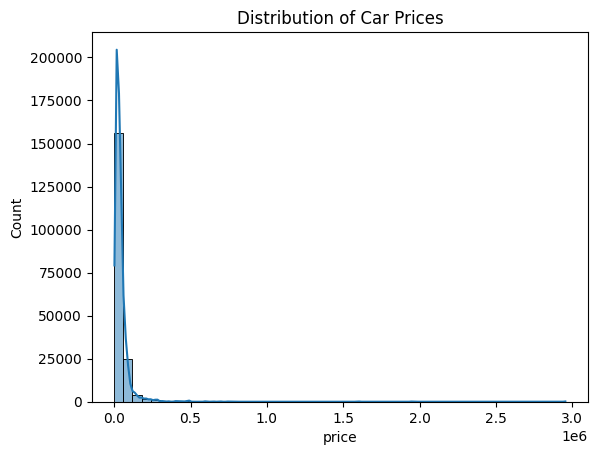

In [192]:
# Plot Car Price Distribution
plt.figure()
sns.histplot(train_clean["price"], bins= 50, kde= True)
plt.title("Distribution of Car Prices")
plt.show()

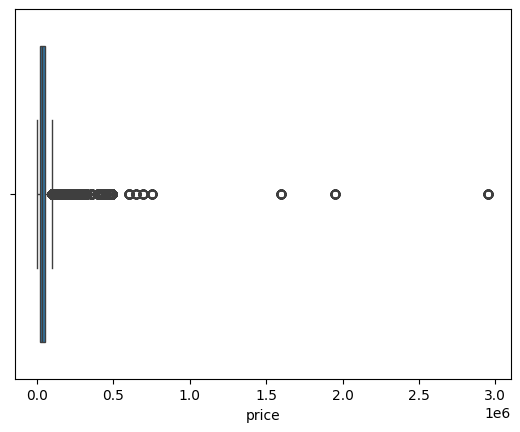

In [193]:
plt.figure()
sns.boxplot(x= train_clean["price"])
plt.show()

We can see that there a few outliers in the price column

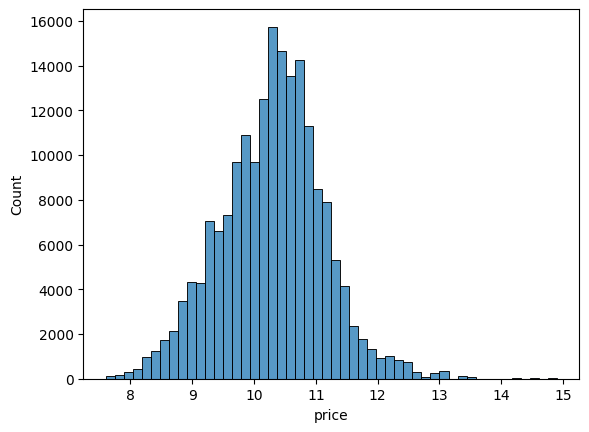

In [194]:
# Let's use log transform to confirm the outliers
plt.figure()
sns.histplot(np.log1p(train_clean["price"]), bins=50)
plt.show()

In [195]:
# Check for one of the outlier rows to understand the data, e.g, check for 54598 row
outlier_row= train_clean[train_clean["price"] == 54598]
outlier_row

id          brand  \
8431      8431          Acura   
11877    11877  Mercedes-Benz   
13145    13145           Land   
17402    17402     Volkswagen   
18502    18502           Audi   
20632    20632        Porsche   
24023    24023  Mercedes-Benz   
27458    27458         Toyota   
27732    27732          Lexus   
42370    42370  Mercedes-Benz   
44695    44695  Mercedes-Benz   
45132    45132  Mercedes-Benz   
49042    49042    Lamborghini   
53107    53107            BMW   
56832    56832            RAM   
67679    67679        Porsche   
68473    68473  Mercedes-Benz   
72681    72681           Audi   
75153    75153  Mercedes-Benz   
94531    94531        Porsche   
99234    99234          Acura   
101874  101874         Nissan   
108188  108188  Mercedes-Benz   
108628  108628  Mercedes-Benz   
110312  110312  Mercedes-Benz   
115820  115820          Lexus   
117178  117178          Tesla   
119343  119343  Mercedes-Benz   
128231  128231         Toyota   
135567  135567        Porsche   
155077  155077            BMW   
163848  163848           Audi   
167036  167036           Land   
171952  171952          Lexus   
176125  176125          Lexus   
186517  186517           Audi   
187230  187230  Mercedes-Benz   
188128  188128          Lexus   

                                                    model     milage  \
8431                                MDX w/Advance Package  10.314868   
11877                                       AMG G 63 Base  10.279764   
13145   Rover Range Rover 5.0L Supercharged Autobiogra...  10.530148   
17402                              Arteon 2.0T SEL R-Line   9.827362   
18502                               SQ5 3.0T Premium Plus  10.773315   
20632                                              Taycan   8.843759   
24023                                     GLC 300 GLC 300   9.011157   
27458                           Avalon Hybrid XLE Premium  10.314868   
27732                                     CT 200h Premium   8.807322   
42370                               AMG GLC 43 AMG GLC 43  10.573954   
44695                                     GLC 300 GLC 300  10.530148   
45132                                     GLC 300 GLC 300   8.707318   
49042                                           Urus Base   8.444407   
53107                                             M5 Base   9.297160   
56832                            ProMaster 2500 High Roof  10.006495   
67679                                           Macan GTS   8.418477   
68473                                 GLS 450 Base 4MATIC  10.634557   
72681                              Q5 S line Premium Plus   8.320448   
75153                                 GLS 550 Base 4MATIC   8.448057   
94531                                         911 Carrera   9.600421   
99234                                TLX w/A-Spec Package  10.586988   
101874                                          Armada SL  10.782720   
108188                                    GLC 300 GLC 300   9.455011   
108628                              AMG GLE 53 AMG GLE 53   9.224145   
110312                                    GLC 300 GLC 300   7.250636   
115820                                        GX 460 Base  10.619056   
117178                                 Model Y Long Range   8.448057   
119343                                GLS 550 Base 4MATIC   8.319474   
128231                                   Tacoma TRD Sport  10.327284   
135567                                        911 Turbo S   9.960151   
155077                                       X6 xDrive40i   8.629807   
163848                             Q5 S line Premium Plus   9.598049   
167036                        Rover Defender X-Dynamic SE   9.222368   
171952                          RX 350 F SPORT Appearance   8.707318   
176125                                        GX 460 Base  10.619056   
186517                             Q5 S line Premium Plus   9.622980   
187230                          AMG GLE 63 S Coupe 4MATIC  1

In [196]:
outlier_row= train_clean[train_clean["price"] == 60998]
outlier_row

id          brand                                 model  \
1792      1792          Lexus        RX 350 RX 350 F SPORT Handling   
3580      3580           Audi                                A8 4.0   
10532    10532  Mercedes-Benz                   GLS 450 Base 4MATIC   
23416    23416        Porsche                               Macan S   
24550    24550            BMW                         M760 i xDrive   
28181    28181          Tesla                    Model Y Long Range   
29307    29307           Land         Rover Range Rover P400 SE SWB   
29494    29494            BMW            ALPINA B7 ALPINA B7 xDrive   
31128    31128           Land       Rover Range Rover Autobiography   
34128    34128           Jeep            Wrangler Rubicon Hard Rock   
48503    48503           Land  Rover Range Rover P530 SE LWB 7 Seat   
49358    49358  Mercedes-Benz                 AMG G AMG G 63 4MATIC   
52351    52351  Mercedes-Benz                   GLS 450 Base 4MATIC   
58293    58293         Toyota                          Land Cruiser   
59670    59670            BMW                               M3 Base   
64685    64685           Land  Rover Range Rover Velar R-Dynamic SE   
70183    70183  Mercedes-Benz                 AMG GLE 53 AMG GLE 53   
71416    71416          Lexus              RX 450h F SPORT Handling   
74382    74382        Lincoln                      Nautilus Reserve   
76291    76291           Land           Rover Defender X-Dynamic SE   
96677    96677  Mercedes-Benz                       AMG E 53 4MATIC   
97827    97827         Nissan                             Armada SL   
111724  111724       Maserati                        Grecale Modena   
113924  113924         Jaguar                               XK Base   
114029  114029          Lexus              RX 450h F SPORT Handling   
114378  114378            BMW                               M5 Base   
122040  122040         Jaguar                                F-TYPE   
125965  125965          Lexus                             RC F Base   
133386  133386        Bentley                  Continental GT Speed   
136784  136784           Land           Rover Defender X-Dynamic SE   
137919  137919           Audi                      S5 3.0T Prestige   
145853  145853        Porsche                               Macan S   
146255  146255           Ford                          F-150 Raptor   
146501  146501  Mercedes-Benz                   GLS 450 Base 4MATIC   
147913  147913           Audi        RS 7 4.0T Performance Prestige   
155730  155730            BMW            ALPINA B7 ALPINA B7 xDrive   
168547  168547            Kia                   Sorento SX Prestige   
173886  173886           Audi                    RS Q8 4.0T quattro   
173935  173935         Toyota                        Tacoma TRD Pro   
182308  182308  Mercedes-Benz                     AMG GLS 63 4MATIC   
183957  183957           Land           Rover Defender X-Dynamic SE   
186424  186424          Acura                       RDX PMC Edition   

           milage fuel_type                                        engine  \
1792     9.974831  Gasoline                                3.5 Liter DOHC   
3580     8.283999  Gasoline                               3.0 Liter Turbo   
10532    8.448057    Hybrid                               3.0 Liter Turbo   
23416    9.888475  Gasoline                               3.0 Liter Turbo   
24550    9.011157  Gasoline                          6.6 Liter Twin Turbo   
28181   10.141007  Gasoline                         Dual Motor - Standard   
29307    8.444407    Hybrid                               3.0 Liter Turbo   
29494    8.448057  Gasoline                          4.4 Liter Twin Turbo   
31128    9.723284    Hybrid                                     4.4 Liter   
34128   10.363409  Gasoline                                3.6 Liter DOHC   
48503    9.962464  Gasoline                          4.4 Liter Twin Turbo   
49358   10.030296  Gasoline       

No need to remove the outliers since they are small and they account for true values of the car feature

In [197]:
train_clean["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       'not supported'], dtype=object)

### Fuel Type Plots

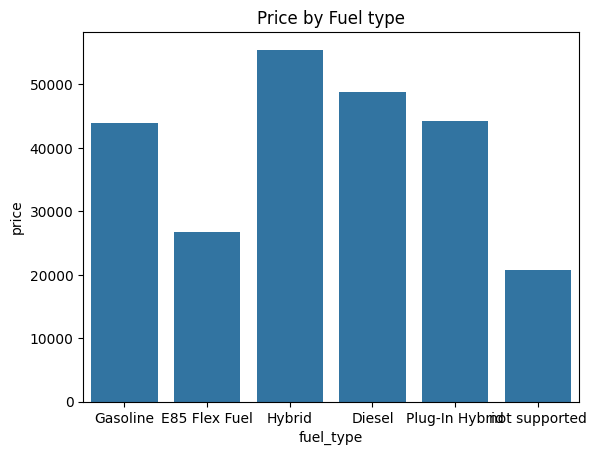

In [198]:
# Plot for Fuel_type vs Price
plt.figure()
sns.barplot(x= "fuel_type", y= "price", data= train_clean, errorbar=None)
plt.title("Price by Fuel type")
plt.show()

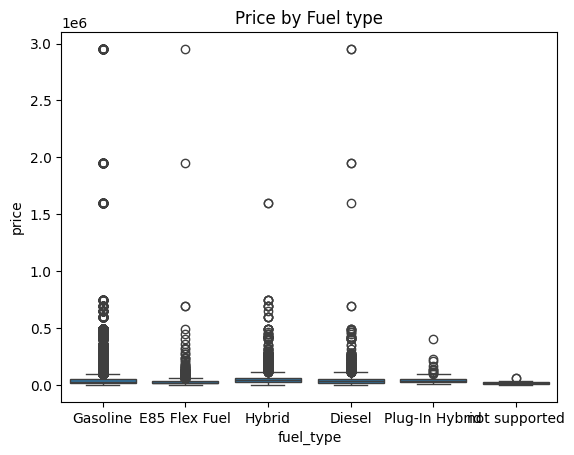

In [199]:
# Plot for Fuel_type vs Price
plt.figure()
sns.boxplot(x= "fuel_type", y= "price", data= train_clean)
plt.title("Price by Fuel type")
plt.show()

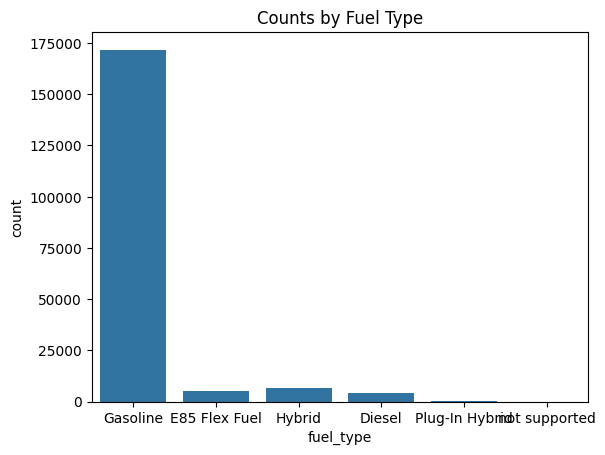

In [200]:
# Fuel Type
plt.figure()
sns.countplot(x="fuel_type", data=train_clean)
plt.title("Counts by Fuel Type")
plt.show()

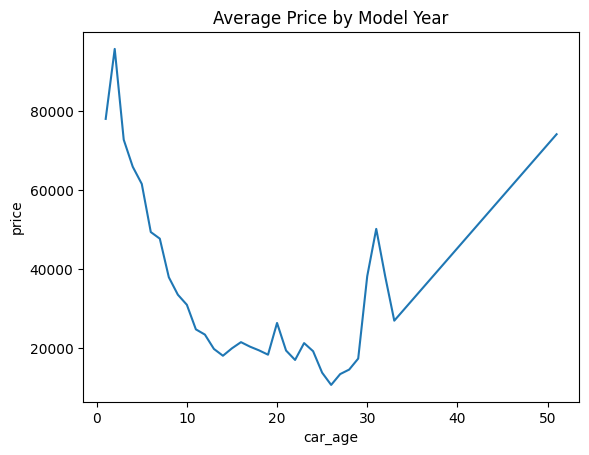

In [201]:
# Plot Model_year vs Price
plt.figure()
sns.lineplot(x="car_age", y="price", data=train_clean, estimator="mean", errorbar=None)
plt.title("Average Price by Model Year")
plt.show()

### Brand Plots

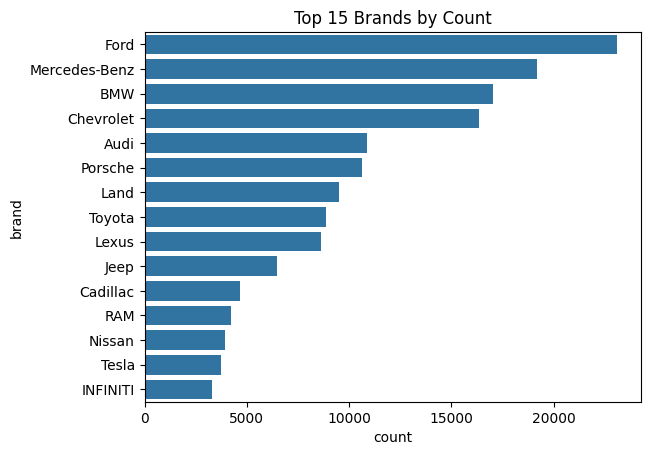

In [202]:
# Brand
plt.figure()
top_brands = train_clean["brand"].value_counts().nlargest(15).index
sns.countplot(y="brand", data=train_clean[train_clean["brand"].isin(top_brands)],
              order=top_brands)
plt.title("Top 15 Brands by Count")
plt.show()


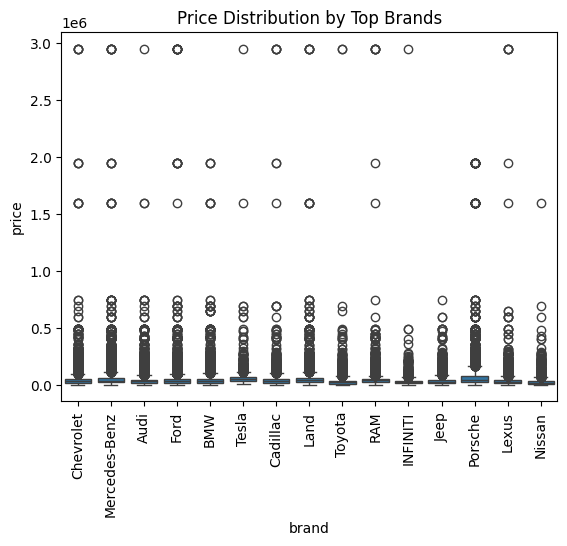

In [203]:
plt.figure()
sns.boxplot(x="brand", y="price", data=train_clean[train_clean["brand"].isin(top_brands)])
plt.xticks(rotation=90)
plt.title("Price Distribution by Top Brands")
plt.show()

### Mileage

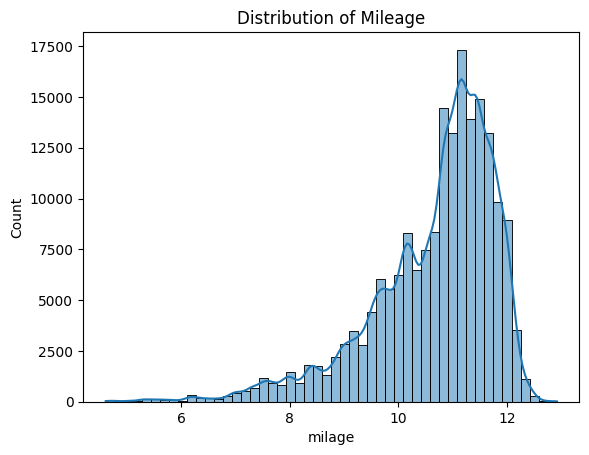

In [204]:
# Mileage
plt.figure()
sns.histplot(train_clean["milage"], bins=50, kde=True)
plt.title("Distribution of Mileage")
plt.show()



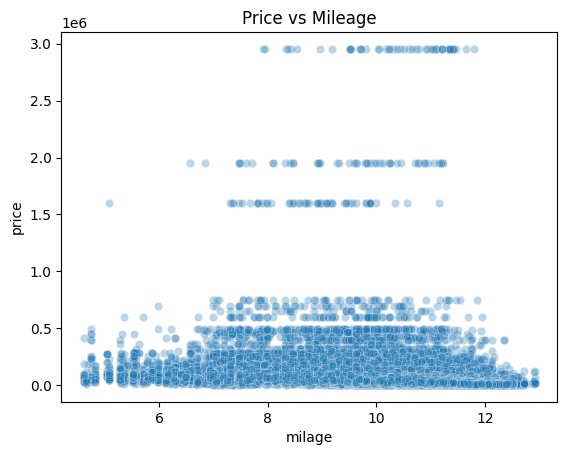

In [205]:
plt.figure()
sns.scatterplot(x="milage", y="price", data=train_clean, alpha=0.3)
plt.title("Price vs Mileage")
plt.show()

### Transmission

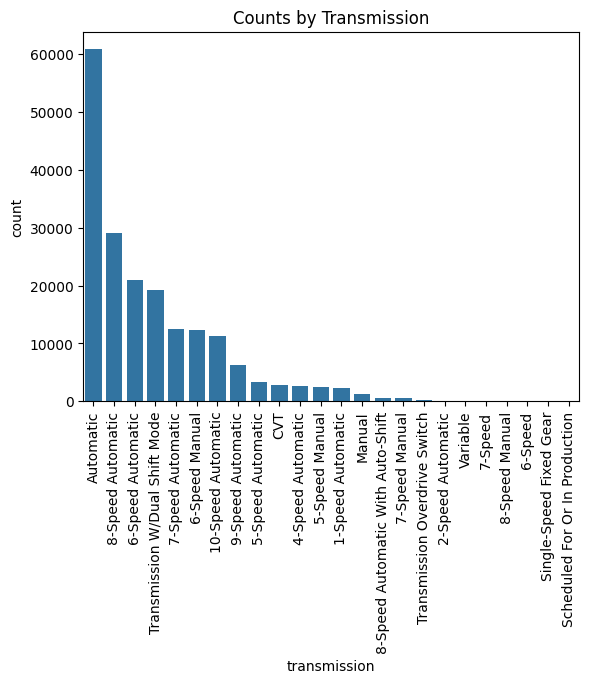

In [206]:
plt.figure()
sns.countplot(x="transmission", data=train_clean, order=train_clean["transmission"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Counts by Transmission")
plt.show()

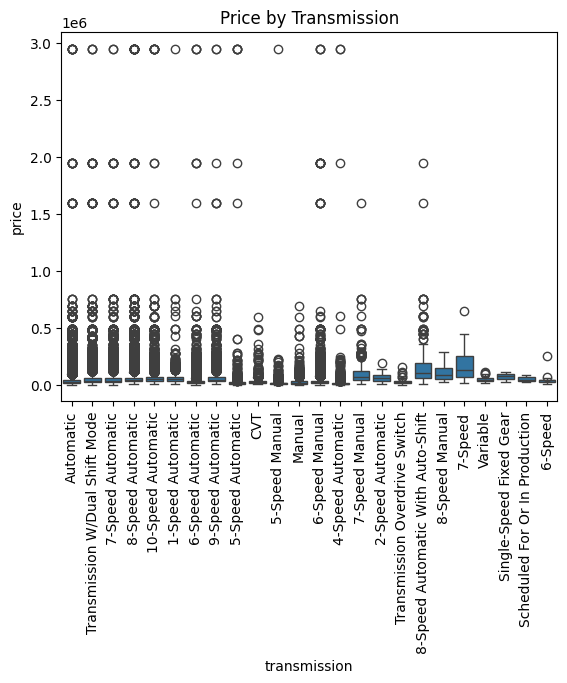

In [207]:

plt.figure()
sns.boxplot(x="transmission", y="price", data=train_clean)
plt.xticks(rotation=90)
plt.title("Price by Transmission")
plt.show()


### Exterior & Interior Colour Plot

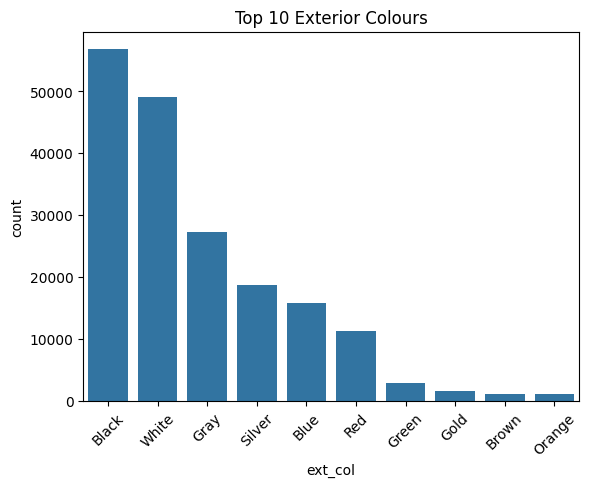

In [208]:
plt.figure()
top_colors = train_clean["ext_col"].value_counts().nlargest(10).index
sns.countplot(x="ext_col", data=train_clean[train_clean["ext_col"].isin(top_colors)],
              order=top_colors)
plt.xticks(rotation=45)
plt.title("Top 10 Exterior Colours")
plt.show()

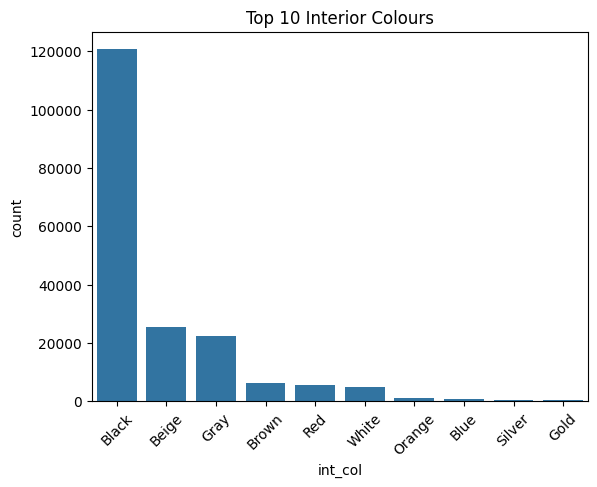

In [209]:
# Interior Color
plt.figure()
top_int_colors = train_clean["int_col"].value_counts().nlargest(10).index
sns.countplot(x="int_col", data=train_clean[train_clean["int_col"].isin(top_int_colors)],
              order=top_int_colors)
plt.xticks(rotation=45)
plt.title("Top 10 Interior Colours")
plt.show()

### Accident Plot

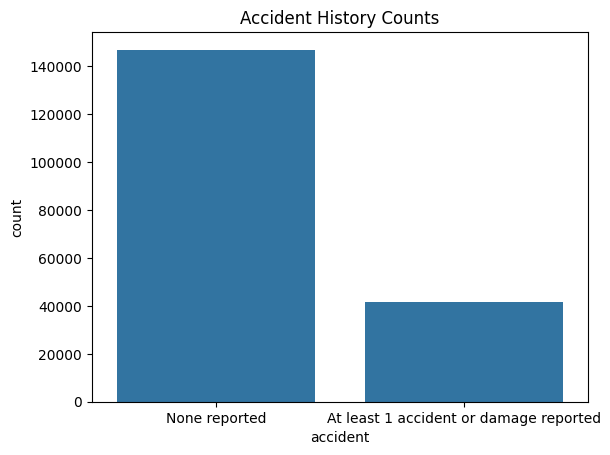

In [210]:
plt.figure()
sns.countplot(x="accident", data=train_clean)
plt.title("Accident History Counts")
plt.show()



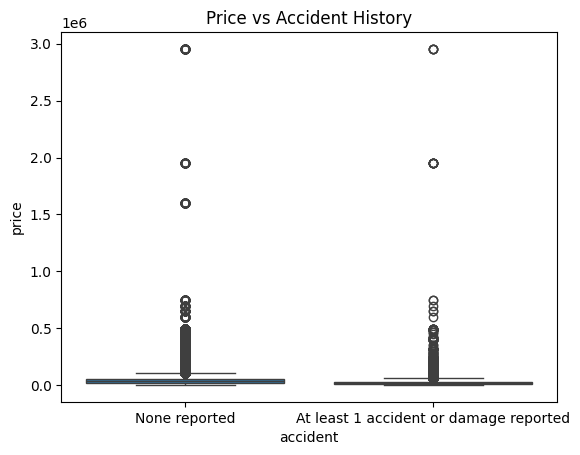

In [211]:
plt.figure()
sns.boxplot(x="accident", y="price", data=train_clean)
plt.title("Price vs Accident History")
plt.show()

### Correlation Heatmap or Plots

In [212]:
numeric_cols = ["price", "milage", "car_age"]

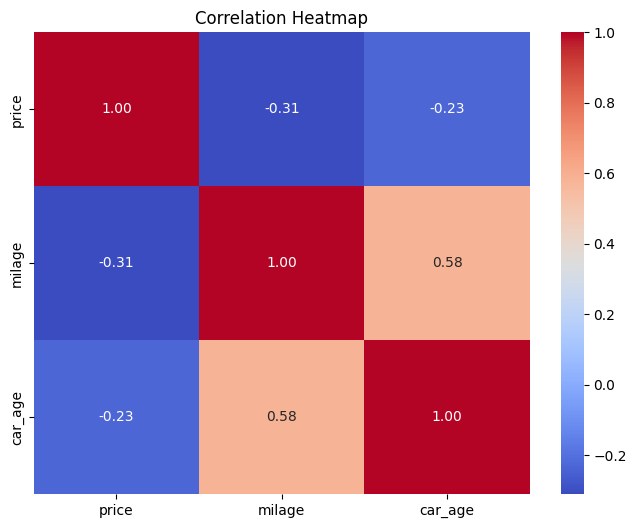

In [213]:
plt.figure(figsize=(8,6))
sns.heatmap(train_clean[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

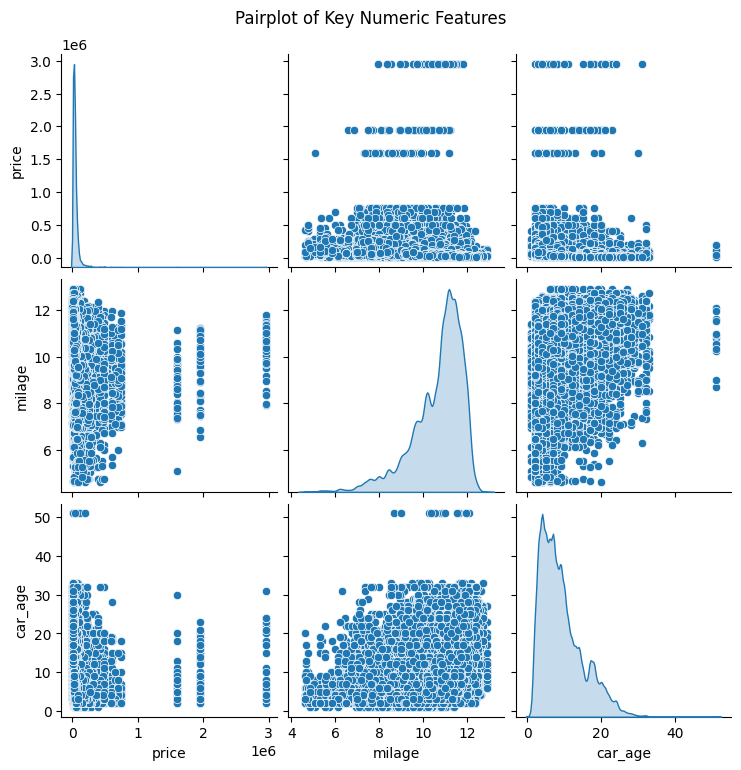

In [214]:
# Pairplot (subset of numeric)
sns.pairplot(train_clean[numeric_cols], diag_kind="kde")
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.show()

/tmp/ipykernel_10/3256051045.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="fuel_type", y="price", hue="transmission",


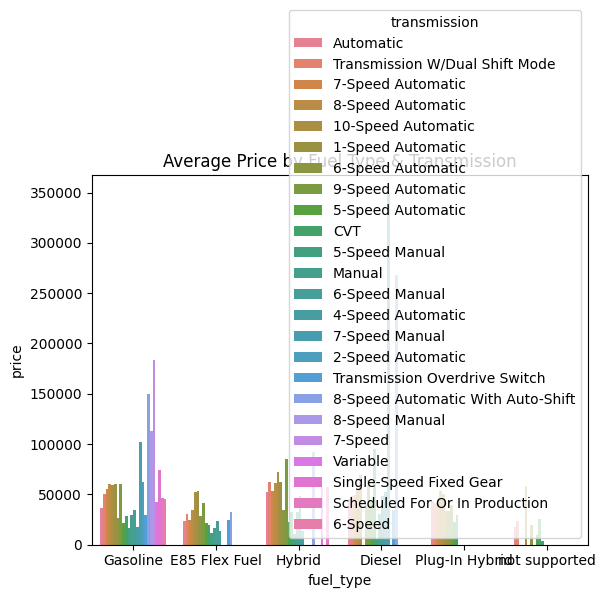

In [215]:
plt.figure()
sns.barplot(x="fuel_type", y="price", hue="transmission", 
            data=train_clean, estimator="mean", ci=None)
plt.title("Average Price by Fuel Type & Transmission")
plt.show()

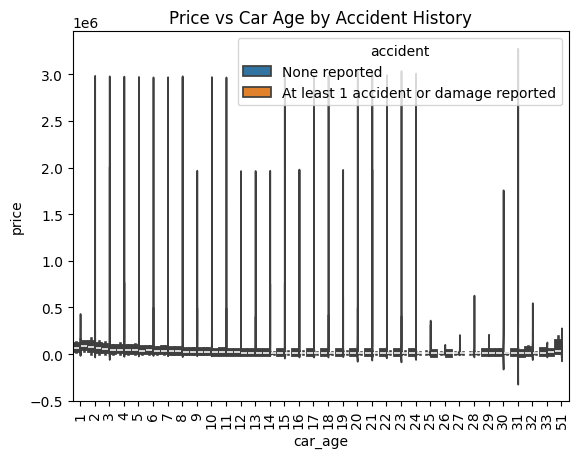

In [216]:
plt.figure()
sns.violinplot(x="car_age", y="price", hue="accident", 
               data=train_clean, split=True)
plt.xticks(rotation=90)
plt.title("Price vs Car Age by Accident History")
plt.show()

## Prepare Data for Model Training 

In [217]:
import pandas as pd
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #or any model of your choice
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [218]:
# Import the data again
train= pd.read_csv("/kaggle/working/train_clean.csv")
train.head()

id          brand              model     milage      fuel_type  \
0   0           MINI      Cooper S Base  12.269052       Gasoline   
1   1        Lincoln              LS V8  11.872354       Gasoline   
2   2      Chevrolet  Silverado 2500 LT  11.825778  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate   9.878221       Gasoline   
4   4  Mercedes-Benz        Metris Base   8.907748       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                       Automatic  Yellow    Gray   
1                       Automatic  Silver   Beige   
2                       Automatic    Blue    Gray   
3  Transmission W/Dual Shift Mode   Black   Black   
4               7-Speed Automatic   Black   Beige   

                                 accident  price  car_age  
0                           None reported   4200       18  
1  At least 1 accident or damage reported   4999       23  
2                           None reported  13900       23  
3                           None reported  45000        8  
4                           None reported  97500        4

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     188533 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 17.3+ MB


In [219]:
# Encode categorical data using Label Encoder
def label_encode(df):
    categorical_col= ["brand", "model", "fuel_type", "engine", "transmission", "ext_col", "int_col", "accident"] 
    le= LabelEncoder()
    
    for col in categorical_col:
        df[col]= le.fit_transform(df[col])
        print(f"Successfully endcoded: {col}")
    return df


In [220]:
train = label_encode(train)


Successfully endcoded: brand
Successfully endcoded: model
Successfully endcoded: fuel_type
Successfully endcoded: engine
Successfully endcoded: transmission
Successfully endcoded: ext_col
Successfully endcoded: int_col
Successfully endcoded: accident


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            188533 non-null  int64
 1   brand         188533 non-null  int64
 2   model         188533 non-null  int64
 3   model_year    188533 non-null  int64
 4   milage        188533 non-null  int64
 5   fuel_type     188533 non-null  int64
 6   engine        188533 non-null  int64
 7   transmission  188533 non-null  int64
 8   ext_col       188533 non-null  int64
 9   int_col       188533 non-null  int64
 10  accident      188533 non-null  int64
 11  price         188533 non-null  int64
dtypes: int64(12)
memory usage: 17.3 MB


In [221]:
# Split to X and y
X= train.drop("price", axis=1)
y = train["price"]
X.head()

id  brand  model     milage  fuel_type  engine  transmission  ext_col  \
0   0     31    495  12.269052          2     116            16       13   
1   1     28    930  11.872354          2     366            16       11   
2   2      9   1575  11.825778          1     640            16        2   
3   3     16    758   9.878221          2     863            22        1   
4   4     36   1077   8.907748          2     259            10        1   

   int_col  accident  car_age  
0        5         1       18  
1        0         0       23  
2        5         1       23  
3        1         1        8  
4        0         1        4

In [104]:
X.shape

(188533, 11)

In [105]:
y.head()

0     4200
1     4999
2    13900
3    45000
4    97500
Name: price, dtype: int64

In [223]:
# Split X and y to 80:20 ratio for training and validation
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size =0.2, random_state= 42)

In [224]:
X_train.shape, y_train.shape

((150826, 11), (150826,))

In [108]:
X_val.shape, y_val.shape

((37707, 11), (37707,))

## Model Training

First train only with default hyperparameters

In [225]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [227]:
import numpy as np 
y_val_pred = model.predict(X_val)

val_rmse = mean_squared_error(y_val, y_val_pred)
val_rmse= np.sqrt(val_rmse)

print("Validation RMSE:", val_rmse)

Validation RMSE: 72485.62737626185


Now, use Grid search method to know the best hyperparameters for training

In [228]:
def train_with_cv(estimator, param_grid, X, y, cv_splits=5, scoring=None):
    """
    Perform K-Fold Cross Validation with hyperparameter tuning. Adjust params as you please

    Parameters:
    estimator : sklearn estimator
        The model to train (e.g., RandomForestRegressor(), LogisticRegression(), etc.)
    param_grid : dict
        Hyperparameter search space, e.g., {'n_estimators': [100, 200], 'max_depth': [5, 10]}
    X : Features
    y : Target variable
    cv_splits : int
        Number of folds for cross-validation
    scoring : str or callable
        Scoring metric (default: neg_root_mean_squared_error for regression)
    """
    # default scoring = RMSE for regression
    if scoring is None:
        scoring = make_scorer(mean_squared_error, squared=False)

    kfold = KFold(n_splits=cv_splits, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X, y)

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.cv_results_

In [229]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

best_model, best_params, cv_results = train_with_cv(model, param_grid, X_train, y_train)

print("Best Params:", best_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [230]:
y_val_pred = best_model.predict(X_val)

val_rmse = mean_squared_error(y_val, y_val_pred)
val_rmse= np.sqrt(val_rmse)

print("Validation RMSE:", val_rmse)

Validation RMSE: 69038.17446463383


In [153]:
# train_clean["milage"].unique()

array([213000, 143250, 136731, ...,   4721,   2922, 134603])

In [155]:
# train_clean['milage_log'] = np.log1p(train_clean['milage'])

# train_clean['milage_log'].unique()

array([12.26905214, 11.87235362, 11.82577808, ...,  8.45998772,
        7.98036577, 11.81009241])

In [231]:
final_model = RandomForestRegressor(**best_params,random_state=42)

final_model.fit(
    np.vstack([X_train, X_val]), 
    np.hstack([y_train, y_val])
)

RandomForestRegressor(max_depth=5, random_state=42)

## Catboost Model

In [127]:
# Run once for installation
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 80.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.3/407.3 kB 29.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [128]:
param_grid_catboost = {
    'iterations': [100, 200, 500],        # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],   # Learning rate
    'depth': [6, 7, 8, 10],                # Depth of trees
    # 'l2_leaf_reg': [1, 3, 5],              # L2 regularization term
    # 'border_count': [32, 50, 100],         # Number of splits for categorical features
    # 'bagging_temperature': [0.1, 0.5, 1],  # Controls the variance in the model
}

In [129]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(random_state=42)
best_model, best_params, cv_results = train_with_cv(cat_model, param_grid_catboost, X_train, y_train)

print(f"Best Catboost Params: {best_params}")


Fitting 6 folds for each of 36 candidates, totalling 216 fits


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 77832.2286047	total: 1.03s	remaining: 3m 25s
1:	learn: 77434.9808460	total: 1.1s	remaining: 1m 49s
2:	learn: 77064.3355529	total: 1.95s	remaining: 2m 7s
3:	learn: 76730.7337099	total: 3.4s	remaining: 2m 46s
4:	learn: 76413.3066799	total: 3.42s	remaining: 2m 13s
5:	learn: 76139.9276787	total: 3.44s	remaining: 1m 51s
6:	learn: 75880.0039710	total: 3.46s	remaining: 1m 35s
7:	learn: 75634.3810150	total: 3.5s	remaining: 1m 24s
8:	learn: 75421.9182281	total: 3.52s	remaining: 1m 14s
9:	learn: 75213.0836251	total: 5.18s	remaining: 1m 38s
10:	learn: 75035.0694662	total: 8.12s	remaining: 2m 19s
11:	learn: 74861.9607892	total: 8.14s	remaining: 2m 7s
12:	learn: 74693.4592395	total: 8.16s	remaining: 1m 57s
13:	learn: 74550.0564976	total: 8.2s	remaining: 1m 48s
14:	learn: 74427.0995183	total: 9.52s	remaining: 1m 57s
15:	learn: 74305.1093867	total: 10.6s	remaining: 2m 1s
16:	learn: 74184.8066538	total: 11.8s	remaining: 2m 6s
17:	learn: 74081.6827136	total: 11.8s	remaining: 1m 59s
18:	learn:

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 79266.1659413	total: 132ms	remaining: 1m 5s
1:	learn: 78572.5090698	total: 170ms	remaining: 42.4s
2:	learn: 77996.8971717	total: 196ms	remaining: 32.5s
3:	learn: 77535.7517489	total: 219ms	remaining: 27.1s
4:	learn: 77128.0978737	total: 252ms	remaining: 25s
5:	learn: 76763.6165294	total: 292ms	remaining: 24s
6:	learn: 76468.6995716	total: 327ms	remaining: 23.1s
7:	learn: 76229.1808051	total: 367ms	remaining: 22.6s
8:	learn: 76044.9773716	total: 402ms	remaining: 21.9s
9:	learn: 75852.9570474	total: 435ms	remaining: 21.3s
10:	learn: 75698.8959969	total: 473ms	remaining: 21s
11:	learn: 75577.8383195	total: 512ms	remaining: 20.8s
12:	learn: 75468.0807420	total: 553ms	remaining: 20.7s
13:	learn: 75372.2139015	total: 592ms	remaining: 20.6s
14:	learn: 75272.3223966	total: 630ms	remaining: 20.4s
15:	learn: 75194.4812308	total: 668ms	remaining: 20.2s
16:	learn: 75128.1289904	total: 846ms	remaining: 24s
17:	learn: 75070.5076610	total: 3.82s	remaining: 1m 42s
18:	learn: 75016.4551234	to

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 79266.1659413	total: 1.46s	remaining: 4m 49s
1:	learn: 78572.5090698	total: 1.98s	remaining: 3m 15s
2:	learn: 77996.8971717	total: 3.27s	remaining: 3m 34s
3:	learn: 77535.7517489	total: 3.98s	remaining: 3m 14s
4:	learn: 77128.0978737	total: 4.02s	remaining: 2m 36s
5:	learn: 76763.6165294	total: 4.05s	remaining: 2m 11s
6:	learn: 76468.6995716	total: 4.09s	remaining: 1m 52s
7:	learn: 76229.1808051	total: 4.2s	remaining: 1m 40s
8:	learn: 76044.9773716	total: 5.31s	remaining: 1m 52s
9:	learn: 75852.9570474	total: 5.46s	remaining: 1m 43s
10:	learn: 75698.8959969	total: 6.13s	remaining: 1m 45s
11:	learn: 75577.8383195	total: 6.47s	remaining: 1m 41s
12:	learn: 75468.0807420	total: 11s	remaining: 2m 37s
13:	learn: 75372.2139015	total: 12.9s	remaining: 2m 51s
14:	learn: 75272.3223966	total: 13s	remaining: 2m 40s
15:	learn: 75194.4812308	total: 13.4s	remaining: 2m 34s
16:	learn: 75128.1289904	total: 13.4s	remaining: 2m 24s
17:	learn: 75070.5076610	total: 13.6s	remaining: 2m 17s
18:	lea

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 79402.8470697	total: 704ms	remaining: 2m 20s
1:	learn: 78689.2670755	total: 1.24s	remaining: 2m 2s
2:	learn: 78105.5076290	total: 2.09s	remaining: 2m 17s
3:	learn: 77609.1283362	total: 2.14s	remaining: 1m 44s
4:	learn: 77201.5393218	total: 2.18s	remaining: 1m 25s
5:	learn: 76826.9016722	total: 2.21s	remaining: 1m 11s
6:	learn: 76545.2124193	total: 2.23s	remaining: 1m 1s
7:	learn: 76309.0396218	total: 2.26s	remaining: 54.3s
8:	learn: 76122.1948683	total: 4.85s	remaining: 1m 42s
9:	learn: 75925.9563976	total: 7.48s	remaining: 2m 22s
10:	learn: 75782.0265580	total: 7.51s	remaining: 2m 9s
11:	learn: 75657.6765804	total: 7.53s	remaining: 1m 57s
12:	learn: 75545.2797742	total: 7.58s	remaining: 1m 49s
13:	learn: 75449.2025122	total: 7.89s	remaining: 1m 44s
14:	learn: 75358.8257535	total: 7.91s	remaining: 1m 37s
15:	learn: 75274.9809325	total: 7.93s	remaining: 1m 31s
16:	learn: 75213.5470111	total: 7.95s	remaining: 1m 25s
17:	learn: 75160.6242605	total: 8.03s	remaining: 1m 21s
18:	le

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80163.6633839	total: 1.5s	remaining: 4m 57s
1:	learn: 80075.5810820	total: 3.65s	remaining: 6m 1s
2:	learn: 79990.8025409	total: 7.18s	remaining: 7m 51s
3:	learn: 79908.9740319	total: 9.3s	remaining: 7m 35s
4:	learn: 79826.4489106	total: 10.4s	remaining: 6m 46s
5:	learn: 79745.6261470	total: 11.4s	remaining: 6m 9s
6:	learn: 79668.1810235	total: 11.8s	remaining: 5m 26s
7:	learn: 79589.7376516	total: 12.2s	remaining: 4m 53s
8:	learn: 79514.0458193	total: 12.9s	remaining: 4m 33s
9:	learn: 79436.7085413	total: 12.9s	remaining: 4m 5s
10:	learn: 79361.7196487	total: 13.9s	remaining: 3m 59s
11:	learn: 79290.3581807	total: 14.3s	remaining: 3m 43s
12:	learn: 79218.6204831	total: 15.3s	remaining: 3m 40s
13:	learn: 79147.2409664	total: 15.9s	remaining: 3m 31s
14:	learn: 79077.8712369	total: 17.4s	remaining: 3m 34s
15:	learn: 79010.8195401	total: 17.5s	remaining: 3m 21s
16:	learn: 78943.6098772	total: 17.5s	remaining: 3m 8s
17:	learn: 78878.6735902	total: 17.6s	remaining: 2m 57s
18:	lear

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80018.7247208	total: 723ms	remaining: 6m
1:	learn: 79933.1223485	total: 740ms	remaining: 3m 4s
2:	learn: 79849.7057593	total: 753ms	remaining: 2m 4s
3:	learn: 79769.2680645	total: 773ms	remaining: 1m 35s
4:	learn: 79686.2283703	total: 789ms	remaining: 1m 18s
5:	learn: 79607.1834390	total: 3.72s	remaining: 5m 6s
6:	learn: 79527.7868219	total: 4.89s	remaining: 5m 44s
7:	learn: 79450.9388202	total: 4.91s	remaining: 5m 1s
8:	learn: 79377.6537480	total: 4.96s	remaining: 4m 30s
9:	learn: 79302.2109982	total: 5s	remaining: 4m 4s
10:	learn: 79230.1814128	total: 5.03s	remaining: 3m 43s
11:	learn: 79160.2729507	total: 5.14s	remaining: 3m 29s
12:	learn: 79090.0099991	total: 5.18s	remaining: 3m 14s
13:	learn: 79019.1373933	total: 5.56s	remaining: 3m 13s
14:	learn: 78950.8779787	total: 7.87s	remaining: 4m 14s
15:	learn: 78885.9430134	total: 9.19s	remaining: 4m 38s
16:	learn: 78819.8369041	total: 9.23s	remaining: 4m 22s
17:	learn: 78754.7596503	total: 9.27s	remaining: 4m 8s
18:	learn: 7869

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 77427.7348636	total: 2.51s	remaining: 8m 20s
1:	learn: 76729.4916698	total: 7.89s	remaining: 13m 1s
2:	learn: 76138.8454885	total: 13.9s	remaining: 15m 16s
3:	learn: 75660.1217069	total: 17.5s	remaining: 14m 16s
4:	learn: 75254.2995335	total: 19.9s	remaining: 12m 55s
5:	learn: 74882.4792301	total: 21.8s	remaining: 11m 45s
6:	learn: 74576.7263948	total: 22.3s	remaining: 10m 16s
7:	learn: 74346.9269162	total: 23.2s	remaining: 9m 16s
8:	learn: 74140.9291952	total: 23.2s	remaining: 8m 12s
9:	learn: 73942.4693941	total: 24.2s	remaining: 7m 38s
10:	learn: 73793.4468247	total: 24.8s	remaining: 7m 6s
11:	learn: 73652.7835623	total: 25.4s	remaining: 6m 37s
12:	learn: 73535.4910647	total: 26.1s	remaining: 6m 15s
13:	learn: 73428.4689599	total: 26.1s	remaining: 5m 47s
14:	learn: 73337.7780370	total: 26.2s	remaining: 5m 22s
15:	learn: 73260.5710466	total: 26.7s	remaining: 5m 6s
16:	learn: 73182.2647557	total: 26.8s	remaining: 4m 48s
17:	learn: 73121.4826213	total: 28.2s	remaining: 4m 45s

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 78131.5002166	total: 941ms	remaining: 7m 49s
1:	learn: 78044.3016004	total: 1.34s	remaining: 5m 33s
2:	learn: 77959.2263775	total: 2.48s	remaining: 6m 50s
3:	learn: 77877.4650602	total: 4s	remaining: 8m 15s
4:	learn: 77794.9472737	total: 4.05s	remaining: 6m 40s
5:	learn: 77713.6950215	total: 4.07s	remaining: 5m 34s
6:	learn: 77636.1221254	total: 4.08s	remaining: 4m 47s
7:	learn: 77558.2955471	total: 4.69s	remaining: 4m 48s
8:	learn: 77482.5963855	total: 4.77s	remaining: 4m 20s
9:	learn: 77406.1060486	total: 4.8s	remaining: 3m 55s
10:	learn: 77329.9037392	total: 5.26s	remaining: 3m 53s
11:	learn: 77256.8050468	total: 5.39s	remaining: 3m 39s
12:	learn: 77185.0068958	total: 8.29s	remaining: 5m 10s
13:	learn: 77113.9386049	total: 10.4s	remaining: 6m
14:	learn: 77044.3935709	total: 10.4s	remaining: 5m 36s
15:	learn: 76976.2297888	total: 11.3s	remaining: 5m 40s
16:	learn: 76909.9145528	total: 11.5s	remaining: 5m 25s
17:	learn: 76843.1821687	total: 12.4s	remaining: 5m 31s
18:	learn:

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 78131.5002166	total: 853ms	remaining: 2m 49s
1:	learn: 78044.3016004	total: 1.3s	remaining: 2m 8s
2:	learn: 77959.2263775	total: 1.69s	remaining: 1m 51s
3:	learn: 77877.4650602	total: 2.4s	remaining: 1m 57s
4:	learn: 77794.9472737	total: 3.36s	remaining: 2m 10s
5:	learn: 77713.6950215	total: 4.51s	remaining: 2m 25s
6:	learn: 77636.1221254	total: 7.98s	remaining: 3m 39s
7:	learn: 77558.2955471	total: 11s	remaining: 4m 24s
8:	learn: 77482.5963855	total: 13.7s	remaining: 4m 51s
9:	learn: 77406.1060486	total: 19.4s	remaining: 6m 7s
10:	learn: 77329.9037392	total: 22.9s	remaining: 6m 33s
11:	learn: 77256.8050468	total: 23.8s	remaining: 6m 12s
12:	learn: 77185.0068958	total: 23.8s	remaining: 5m 42s
13:	learn: 77113.9386049	total: 25.6s	remaining: 5m 39s
14:	learn: 77044.3935709	total: 28.7s	remaining: 5m 54s
15:	learn: 76976.2297888	total: 33.6s	remaining: 6m 26s
16:	learn: 76909.9145528	total: 33.6s	remaining: 6m 1s
17:	learn: 76843.1821687	total: 34s	remaining: 5m 44s
18:	learn: 

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 79676.3043780	total: 509ms	remaining: 1m 41s
1:	learn: 79286.7528128	total: 1.25s	remaining: 2m 3s
2:	learn: 78931.4825112	total: 2.47s	remaining: 2m 42s
3:	learn: 78612.5854533	total: 3.4s	remaining: 2m 46s
4:	learn: 78312.5152194	total: 3.62s	remaining: 2m 21s
5:	learn: 78037.9255049	total: 3.78s	remaining: 2m 2s
6:	learn: 77784.8593454	total: 4.5s	remaining: 2m 4s
7:	learn: 77556.7788766	total: 6.72s	remaining: 2m 41s
8:	learn: 77344.0185641	total: 7.14s	remaining: 2m 31s
9:	learn: 77141.0438538	total: 7.18s	remaining: 2m 16s
10:	learn: 76963.5527031	total: 7.58s	remaining: 2m 10s
11:	learn: 76805.2328755	total: 8.31s	remaining: 2m 10s
12:	learn: 76663.2604754	total: 9.05s	remaining: 2m 10s
13:	learn: 76517.2936779	total: 9.22s	remaining: 2m 2s
14:	learn: 76387.3774249	total: 11.5s	remaining: 2m 21s
15:	learn: 76270.3892560	total: 15.5s	remaining: 2m 58s
16:	learn: 76162.2106752	total: 18.5s	remaining: 3m 19s
17:	learn: 76067.9831878	total: 20s	remaining: 3m 21s
18:	learn:

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 79676.3043780	total: 1.1s	remaining: 9m 7s
1:	learn: 79286.7528128	total: 2.07s	remaining: 8m 36s
2:	learn: 78931.4825112	total: 2.42s	remaining: 6m 40s
3:	learn: 78612.5854533	total: 3.17s	remaining: 6m 32s
4:	learn: 78312.5152194	total: 3.21s	remaining: 5m 17s
5:	learn: 78037.9255049	total: 4.46s	remaining: 6m 7s
6:	learn: 77784.8593454	total: 4.86s	remaining: 5m 41s
7:	learn: 77556.7788766	total: 6.65s	remaining: 6m 48s
8:	learn: 77344.0185641	total: 8.49s	remaining: 7m 43s
9:	learn: 77141.0438538	total: 8.93s	remaining: 7m 17s
10:	learn: 76963.5527031	total: 8.95s	remaining: 6m 37s
11:	learn: 76805.2328755	total: 9.3s	remaining: 6m 18s
12:	learn: 76663.2604754	total: 9.83s	remaining: 6m 8s
13:	learn: 76517.2936779	total: 10.7s	remaining: 6m 11s
14:	learn: 76387.3774249	total: 11.3s	remaining: 6m 5s
15:	learn: 76270.3892560	total: 11.4s	remaining: 5m 43s
16:	learn: 76162.2106752	total: 11.7s	remaining: 5m 32s
17:	learn: 76067.9831878	total: 12.2s	remaining: 5m 25s
18:	lear

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80130.5641546	total: 3.27s	remaining: 5m 24s
1:	learn: 79436.7827934	total: 6.26s	remaining: 5m 6s
2:	learn: 78849.0523355	total: 8.88s	remaining: 4m 47s
3:	learn: 78351.6430172	total: 9.77s	remaining: 3m 54s
4:	learn: 77917.9203002	total: 9.8s	remaining: 3m 6s
5:	learn: 77589.3912696	total: 9.92s	remaining: 2m 35s
6:	learn: 77303.1114680	total: 12.2s	remaining: 2m 41s
7:	learn: 77046.5626329	total: 14.3s	remaining: 2m 43s
8:	learn: 76831.5882957	total: 17.6s	remaining: 2m 57s
9:	learn: 76651.8694382	total: 18.7s	remaining: 2m 48s
10:	learn: 76510.8521957	total: 19.7s	remaining: 2m 39s
11:	learn: 76371.3890892	total: 20.8s	remaining: 2m 32s
12:	learn: 76240.9030528	total: 23.1s	remaining: 2m 34s
13:	learn: 76136.5576736	total: 23.9s	remaining: 2m 26s
14:	learn: 76062.4939921	total: 23.9s	remaining: 2m 15s
15:	learn: 75970.7016328	total: 24.3s	remaining: 2m 7s
16:	learn: 75896.3811532	total: 24.6s	remaining: 1m 59s
17:	learn: 75828.1145844	total: 25s	remaining: 1m 53s
18:	lear

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80300.4208762	total: 1.06s	remaining: 3m 30s
1:	learn: 79596.4166238	total: 1.85s	remaining: 3m 3s
2:	learn: 79001.1344649	total: 2.25s	remaining: 2m 27s
3:	learn: 78491.9060855	total: 2.81s	remaining: 2m 17s
4:	learn: 78066.2027808	total: 4.2s	remaining: 2m 43s
5:	learn: 77715.4854254	total: 7.7s	remaining: 4m 9s
6:	learn: 77423.1238136	total: 10.2s	remaining: 4m 40s
7:	learn: 77149.0011431	total: 11.5s	remaining: 4m 35s
8:	learn: 76937.0457579	total: 11.5s	remaining: 4m 4s
9:	learn: 76755.5774325	total: 14.2s	remaining: 4m 29s
10:	learn: 76618.6519500	total: 15s	remaining: 4m 17s
11:	learn: 76476.1199224	total: 15.7s	remaining: 4m 5s
12:	learn: 76324.0210694	total: 19.4s	remaining: 4m 39s
13:	learn: 76214.4599749	total: 28.2s	remaining: 6m 14s
14:	learn: 76137.0987153	total: 34.8s	remaining: 7m 9s
15:	learn: 76023.4280851	total: 35.8s	remaining: 6m 51s
16:	learn: 75943.2678740	total: 37s	remaining: 6m 38s
17:	learn: 75874.0127961	total: 37.7s	remaining: 6m 21s
18:	learn: 75

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 79243.9051722	total: 2.84s	remaining: 9m 25s
1:	learn: 78546.9913057	total: 4.21s	remaining: 6m 56s
2:	learn: 77970.5083361	total: 10.7s	remaining: 11m 44s
3:	learn: 77480.0618294	total: 13.9s	remaining: 11m 20s
4:	learn: 77053.3234391	total: 18.7s	remaining: 12m 7s
5:	learn: 76701.4792440	total: 19.3s	remaining: 10m 23s
6:	learn: 76404.0473602	total: 20.4s	remaining: 9m 22s
7:	learn: 76136.4947429	total: 21s	remaining: 8m 24s
8:	learn: 75894.7389623	total: 23.8s	remaining: 8m 24s
9:	learn: 75713.0531299	total: 28s	remaining: 8m 52s
10:	learn: 75563.3810729	total: 31.2s	remaining: 8m 55s
11:	learn: 75435.2737615	total: 31.2s	remaining: 8m 8s
12:	learn: 75282.6119743	total: 31.9s	remaining: 7m 38s
13:	learn: 75165.9495371	total: 33.7s	remaining: 7m 27s
14:	learn: 75087.5905343	total: 37.3s	remaining: 7m 39s
15:	learn: 74995.9172708	total: 37.9s	remaining: 7m 16s
16:	learn: 74924.7510874	total: 38.4s	remaining: 6m 53s
17:	learn: 74856.9678990	total: 38.5s	remaining: 6m 29s
18:	

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 81090.4863135	total: 2.33s	remaining: 3m 50s
1:	learn: 81003.3511604	total: 4.14s	remaining: 3m 23s
2:	learn: 80916.7761809	total: 4.23s	remaining: 2m 16s
3:	learn: 80830.8547312	total: 4.25s	remaining: 1m 42s
4:	learn: 80747.9711698	total: 4.28s	remaining: 1m 21s
5:	learn: 80666.0991819	total: 4.3s	remaining: 1m 7s
6:	learn: 80584.8886378	total: 4.33s	remaining: 57.6s
7:	learn: 80501.7493756	total: 5.61s	remaining: 1m 4s
8:	learn: 80422.7927643	total: 6.62s	remaining: 1m 6s
9:	learn: 80344.3122922	total: 7.48s	remaining: 1m 7s
10:	learn: 80271.2128306	total: 11.3s	remaining: 1m 31s
11:	learn: 80195.0222185	total: 13.6s	remaining: 1m 39s
12:	learn: 80119.3934824	total: 16.4s	remaining: 1m 49s
13:	learn: 80047.4543907	total: 19.9s	remaining: 2m 2s
14:	learn: 79977.7218921	total: 23.3s	remaining: 2m 12s
15:	learn: 79908.6331321	total: 23.4s	remaining: 2m 2s
16:	learn: 79840.7456650	total: 25.4s	remaining: 2m 3s
17:	learn: 79773.0691961	total: 26.1s	remaining: 1m 59s
18:	learn: 

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80130.5641546	total: 282ms	remaining: 56.1s
1:	learn: 79436.7827934	total: 2.05s	remaining: 3m 23s
2:	learn: 78849.0523355	total: 2.13s	remaining: 2m 19s
3:	learn: 78351.6430172	total: 2.97s	remaining: 2m 25s
4:	learn: 77917.9203002	total: 3.01s	remaining: 1m 57s
5:	learn: 77589.3912696	total: 3.08s	remaining: 1m 39s
6:	learn: 77303.1114680	total: 3.16s	remaining: 1m 27s
7:	learn: 77046.5626329	total: 3.2s	remaining: 1m 16s
8:	learn: 76831.5882957	total: 4.04s	remaining: 1m 25s
9:	learn: 76651.8694382	total: 4.99s	remaining: 1m 34s
10:	learn: 76510.8521957	total: 5.14s	remaining: 1m 28s
11:	learn: 76371.3890892	total: 7.5s	remaining: 1m 57s
12:	learn: 76240.9030528	total: 11.8s	remaining: 2m 49s
13:	learn: 76136.5576736	total: 15.3s	remaining: 3m 22s
14:	learn: 76062.4939921	total: 15.3s	remaining: 3m 8s
15:	learn: 75970.7016328	total: 15.4s	remaining: 2m 56s
16:	learn: 75896.3811532	total: 15.5s	remaining: 2m 47s
17:	learn: 75828.1145844	total: 15.7s	remaining: 2m 39s
18:	le

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80162.6756636	total: 112ms	remaining: 11.1s
1:	learn: 80075.1230459	total: 162ms	remaining: 7.95s
2:	learn: 79988.8518984	total: 404ms	remaining: 13.1s
3:	learn: 79903.7486547	total: 1.02s	remaining: 24.6s
4:	learn: 79821.2403050	total: 2.35s	remaining: 44.6s
5:	learn: 79739.8154274	total: 2.97s	remaining: 46.6s
6:	learn: 79659.8712629	total: 5.82s	remaining: 1m 17s
7:	learn: 79578.2393321	total: 9.62s	remaining: 1m 50s
8:	learn: 79499.5817535	total: 13.2s	remaining: 2m 13s
9:	learn: 79421.4179879	total: 16.1s	remaining: 2m 24s
10:	learn: 79345.3486578	total: 17.4s	remaining: 2m 21s
11:	learn: 79269.8194284	total: 17.5s	remaining: 2m 8s
12:	learn: 79194.9949137	total: 18.1s	remaining: 2m 1s
13:	learn: 79123.3755630	total: 18.4s	remaining: 1m 53s
14:	learn: 79055.0094811	total: 18.8s	remaining: 1m 46s
15:	learn: 78985.4226655	total: 18.9s	remaining: 1m 39s
16:	learn: 78917.0727230	total: 19.7s	remaining: 1m 36s
17:	learn: 78850.6325510	total: 20.7s	remaining: 1m 34s
18:	learn:

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 77842.5460076	total: 373ms	remaining: 37s
1:	learn: 77448.5159006	total: 709ms	remaining: 34.8s
2:	learn: 77085.5680820	total: 1.32s	remaining: 42.6s
3:	learn: 76766.6951628	total: 1.55s	remaining: 37.2s
4:	learn: 76465.1716226	total: 1.77s	remaining: 33.6s
5:	learn: 76185.0512345	total: 1.9s	remaining: 29.7s
6:	learn: 75936.2239321	total: 1.92s	remaining: 25.6s
7:	learn: 75705.7929828	total: 2.29s	remaining: 26.3s
8:	learn: 75490.8106688	total: 2.76s	remaining: 27.9s
9:	learn: 75287.9249927	total: 3.24s	remaining: 29.2s
10:	learn: 75108.9820361	total: 3.64s	remaining: 29.5s
11:	learn: 74951.5809052	total: 3.67s	remaining: 26.9s
12:	learn: 74806.9137990	total: 4.23s	remaining: 28.3s
13:	learn: 74656.2804882	total: 6.44s	remaining: 39.5s
14:	learn: 74533.5913881	total: 9.77s	remaining: 55.4s
15:	learn: 74416.8204490	total: 15.1s	remaining: 1m 19s
16:	learn: 74310.7409143	total: 17.1s	remaining: 1m 23s
17:	learn: 74205.3360334	total: 18.4s	remaining: 1m 23s
18:	learn: 74106.876

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 78129.1361140	total: 4.01s	remaining: 13m 18s
1:	learn: 78041.6491267	total: 5.88s	remaining: 9m 42s
2:	learn: 77955.3346534	total: 7.1s	remaining: 7m 46s
3:	learn: 77868.9196052	total: 12.2s	remaining: 9m 58s
4:	learn: 77784.9536588	total: 16.3s	remaining: 10m 36s
5:	learn: 77702.1953562	total: 17s	remaining: 9m 9s
6:	learn: 77622.2826205	total: 19.6s	remaining: 8m 59s
7:	learn: 77541.3648819	total: 21.3s	remaining: 8m 31s
8:	learn: 77463.2486781	total: 22s	remaining: 7m 46s
9:	learn: 77384.7342036	total: 23.1s	remaining: 7m 19s
10:	learn: 77311.2612844	total: 23.2s	remaining: 6m 38s
11:	learn: 77235.9508457	total: 23.2s	remaining: 6m 3s
12:	learn: 77161.2173419	total: 24s	remaining: 5m 45s
13:	learn: 77089.4359366	total: 24.5s	remaining: 5m 25s
14:	learn: 77021.5519216	total: 25.1s	remaining: 5m 9s
15:	learn: 76954.0735313	total: 26.3s	remaining: 5m 2s
16:	learn: 76885.4654925	total: 31.7s	remaining: 5m 40s
17:	learn: 76818.9770347	total: 40.4s	remaining: 6m 48s
18:	learn: 

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80162.6756636	total: 1.64s	remaining: 13m 35s
1:	learn: 80075.1230459	total: 2.62s	remaining: 10m 53s
2:	learn: 79988.8518984	total: 4.75s	remaining: 13m 7s
3:	learn: 79903.7486547	total: 11.3s	remaining: 23m 23s
4:	learn: 79821.2403050	total: 12.6s	remaining: 20m 49s
5:	learn: 79739.8154274	total: 16.1s	remaining: 22m 9s
6:	learn: 79659.8712629	total: 18.1s	remaining: 21m 16s
7:	learn: 79578.2393321	total: 21s	remaining: 21m 32s
8:	learn: 79499.5817535	total: 21.8s	remaining: 19m 48s
9:	learn: 79421.4179879	total: 29.5s	remaining: 24m 6s
10:	learn: 79345.3486578	total: 33.2s	remaining: 24m 36s
11:	learn: 79269.8194284	total: 33.3s	remaining: 22m 34s
12:	learn: 79194.9949137	total: 35.3s	remaining: 22m 2s
13:	learn: 79123.3755630	total: 37.6s	remaining: 21m 46s
14:	learn: 79055.0094811	total: 37.9s	remaining: 20m 25s
15:	learn: 78985.4226655	total: 38.7s	remaining: 19m 30s
16:	learn: 78917.0727230	total: 40.9s	remaining: 19m 22s
17:	learn: 78850.6325510	total: 41.3s	remaining

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 78131.5002166	total: 79.6ms	remaining: 7.88s
1:	learn: 78044.3016004	total: 92.7ms	remaining: 4.54s
2:	learn: 77959.2263775	total: 194ms	remaining: 6.26s
3:	learn: 77877.4650602	total: 268ms	remaining: 6.43s
4:	learn: 77794.9472737	total: 654ms	remaining: 12.4s
5:	learn: 77713.6950215	total: 1.02s	remaining: 16s
6:	learn: 77636.1221254	total: 1.46s	remaining: 19.4s
7:	learn: 77558.2955471	total: 1.84s	remaining: 21.1s
8:	learn: 77482.5963855	total: 2.75s	remaining: 27.9s
9:	learn: 77406.1060486	total: 3.91s	remaining: 35.2s
10:	learn: 77329.9037392	total: 5.3s	remaining: 42.9s
11:	learn: 77256.8050468	total: 6s	remaining: 44s
12:	learn: 77185.0068958	total: 7.25s	remaining: 48.5s
13:	learn: 77113.9386049	total: 11.2s	remaining: 1m 8s
14:	learn: 77044.3935709	total: 16s	remaining: 1m 30s
15:	learn: 76976.2297888	total: 18.7s	remaining: 1m 38s
16:	learn: 76909.9145528	total: 23.6s	remaining: 1m 55s
17:	learn: 76843.1821687	total: 23.8s	remaining: 1m 48s
18:	learn: 76777.5690736

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 78129.1361140	total: 1.15s	remaining: 9m 35s
1:	learn: 78041.6491267	total: 1.63s	remaining: 6m 44s
2:	learn: 77955.3346534	total: 1.65s	remaining: 4m 33s
3:	learn: 77868.9196052	total: 1.66s	remaining: 3m 26s
4:	learn: 77784.9536588	total: 1.68s	remaining: 2m 46s
5:	learn: 77702.1953562	total: 2.76s	remaining: 3m 47s
6:	learn: 77622.2826205	total: 3.34s	remaining: 3m 55s
7:	learn: 77541.3648819	total: 3.42s	remaining: 3m 30s
8:	learn: 77463.2486781	total: 4.45s	remaining: 4m 3s
9:	learn: 77384.7342036	total: 4.48s	remaining: 3m 39s
10:	learn: 77311.2612844	total: 4.92s	remaining: 3m 38s
11:	learn: 77235.9508457	total: 4.95s	remaining: 3m 21s
12:	learn: 77161.2173419	total: 8.87s	remaining: 5m 32s
13:	learn: 77089.4359366	total: 10.2s	remaining: 5m 55s
14:	learn: 77021.5519216	total: 14.4s	remaining: 7m 44s
15:	learn: 76954.0735313	total: 17s	remaining: 8m 34s
16:	learn: 76885.4654925	total: 20.4s	remaining: 9m 40s
17:	learn: 76818.9770347	total: 20.9s	remaining: 9m 19s
18:	l

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 79266.1659413	total: 737ms	remaining: 1m 12s
1:	learn: 78572.5090698	total: 980ms	remaining: 48s
2:	learn: 77996.8971717	total: 1.75s	remaining: 56.7s
3:	learn: 77535.7517489	total: 1.99s	remaining: 47.7s
4:	learn: 77128.0978737	total: 2.58s	remaining: 49s
5:	learn: 76763.6165294	total: 2.66s	remaining: 41.7s
6:	learn: 76468.6995716	total: 3.61s	remaining: 47.9s
7:	learn: 76229.1808051	total: 3.72s	remaining: 42.8s
8:	learn: 76044.9773716	total: 4s	remaining: 40.5s
9:	learn: 75852.9570474	total: 4.01s	remaining: 36.1s
10:	learn: 75698.8959969	total: 4.04s	remaining: 32.7s
11:	learn: 75577.8383195	total: 4.28s	remaining: 31.4s
12:	learn: 75468.0807420	total: 4.6s	remaining: 30.8s
13:	learn: 75372.2139015	total: 5.09s	remaining: 31.3s
14:	learn: 75272.3223966	total: 5.12s	remaining: 29s
15:	learn: 75194.4812308	total: 5.53s	remaining: 29s
16:	learn: 75128.1289904	total: 6.75s	remaining: 32.9s
17:	learn: 75070.5076610	total: 6.88s	remaining: 31.3s
18:	learn: 75016.4551234	total:

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 77832.2286047	total: 1.23s	remaining: 2m 1s
1:	learn: 77434.9808460	total: 2.76s	remaining: 2m 15s
2:	learn: 77064.3355529	total: 8.84s	remaining: 4m 45s
3:	learn: 76730.7337099	total: 9.32s	remaining: 3m 43s
4:	learn: 76413.3066799	total: 9.63s	remaining: 3m 2s
5:	learn: 76139.9276787	total: 10.3s	remaining: 2m 41s
6:	learn: 75880.0039710	total: 10.4s	remaining: 2m 17s
7:	learn: 75634.3810150	total: 12s	remaining: 2m 17s
8:	learn: 75421.9182281	total: 13.3s	remaining: 2m 14s
9:	learn: 75213.0836251	total: 17.9s	remaining: 2m 41s
10:	learn: 75035.0694662	total: 19s	remaining: 2m 33s
11:	learn: 74861.9607892	total: 21.7s	remaining: 2m 39s
12:	learn: 74693.4592395	total: 22s	remaining: 2m 27s
13:	learn: 74550.0564976	total: 24.3s	remaining: 2m 29s
14:	learn: 74427.0995183	total: 25.1s	remaining: 2m 22s
15:	learn: 74305.1093867	total: 26.3s	remaining: 2m 17s
16:	learn: 74184.8066538	total: 27.6s	remaining: 2m 14s
17:	learn: 74081.6827136	total: 33.5s	remaining: 2m 32s
18:	learn:

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80016.4159355	total: 2.33s	remaining: 19m 20s
1:	learn: 79930.3860618	total: 7.89s	remaining: 32m 45s
2:	learn: 79846.3774072	total: 10.1s	remaining: 27m 58s
3:	learn: 79762.2638535	total: 11.7s	remaining: 24m 7s
4:	learn: 79680.2243353	total: 12.3s	remaining: 20m 14s
5:	learn: 79598.9052612	total: 13.3s	remaining: 18m 14s
6:	learn: 79516.5663667	total: 16s	remaining: 18m 45s
7:	learn: 79439.4428043	total: 22.4s	remaining: 22m 58s
8:	learn: 79362.5093214	total: 24.5s	remaining: 22m 17s
9:	learn: 79284.8052463	total: 28.2s	remaining: 23m 2s
10:	learn: 79209.2335156	total: 31.9s	remaining: 23m 36s
11:	learn: 79133.6100186	total: 33.1s	remaining: 22m 25s
12:	learn: 79058.3542215	total: 34.9s	remaining: 21m 48s
13:	learn: 78987.8385200	total: 36.7s	remaining: 21m 13s
14:	learn: 78920.5378007	total: 40.3s	remaining: 21m 44s
15:	learn: 78854.3996473	total: 45.9s	remaining: 23m 8s
16:	learn: 78786.9883348	total: 46.9s	remaining: 22m 11s
17:	learn: 78721.3434451	total: 48.2s	remainin

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 79664.9421236	total: 4.24s	remaining: 6m 59s
1:	learn: 79271.7321693	total: 6.95s	remaining: 5m 40s
2:	learn: 78910.2011260	total: 8.04s	remaining: 4m 20s
3:	learn: 78582.7683126	total: 8.25s	remaining: 3m 18s
4:	learn: 78271.6586474	total: 8.28s	remaining: 2m 37s
5:	learn: 78001.7681127	total: 8.83s	remaining: 2m 18s
6:	learn: 77739.6018989	total: 9.75s	remaining: 2m 9s
7:	learn: 77499.7180931	total: 11.4s	remaining: 2m 10s
8:	learn: 77286.4979114	total: 11.6s	remaining: 1m 57s
9:	learn: 77083.1097386	total: 12.1s	remaining: 1m 48s
10:	learn: 76895.5235295	total: 14.4s	remaining: 1m 56s
11:	learn: 76724.9497225	total: 15.8s	remaining: 1m 56s
12:	learn: 76565.8956921	total: 17.1s	remaining: 1m 54s
13:	learn: 76431.4400880	total: 18s	remaining: 1m 50s
14:	learn: 76312.8739230	total: 18.7s	remaining: 1m 45s
15:	learn: 76186.6742805	total: 19.1s	remaining: 1m 40s
16:	learn: 76070.4207020	total: 20.8s	remaining: 1m 41s
17:	learn: 75975.5541658	total: 24.8s	remaining: 1m 52s
18:	l

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 81090.4863135	total: 71.4ms	remaining: 35.6s
1:	learn: 81003.3511604	total: 101ms	remaining: 25.1s
2:	learn: 80916.7761809	total: 2.27s	remaining: 6m 15s
3:	learn: 80830.8547312	total: 6.61s	remaining: 13m 39s
4:	learn: 80747.9711698	total: 13.2s	remaining: 21m 41s
5:	learn: 80666.0991819	total: 13.2s	remaining: 18m 4s
6:	learn: 80584.8886378	total: 13.2s	remaining: 15m 29s
7:	learn: 80501.7493756	total: 13.6s	remaining: 13m 55s
8:	learn: 80422.7927643	total: 20.1s	remaining: 18m 17s
9:	learn: 80344.3122922	total: 23.3s	remaining: 19m 1s
10:	learn: 80271.2128306	total: 25.8s	remaining: 19m 6s
11:	learn: 80195.0222185	total: 27.2s	remaining: 18m 24s
12:	learn: 80119.3934824	total: 27.4s	remaining: 17m 8s
13:	learn: 80047.4543907	total: 29.4s	remaining: 16m 59s
14:	learn: 79977.7218921	total: 29.6s	remaining: 15m 58s
15:	learn: 79908.6331321	total: 30.7s	remaining: 15m 28s
16:	learn: 79840.7456650	total: 32.5s	remaining: 15m 24s
17:	learn: 79773.0691961	total: 34.2s	remaining: 

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80162.6756636	total: 1.16s	remaining: 3m 50s
1:	learn: 80075.1230459	total: 5.1s	remaining: 8m 24s
2:	learn: 79988.8518984	total: 5.14s	remaining: 5m 37s
3:	learn: 79903.7486547	total: 5.23s	remaining: 4m 16s
4:	learn: 79821.2403050	total: 7.35s	remaining: 4m 46s
5:	learn: 79739.8154274	total: 12.2s	remaining: 6m 35s
6:	learn: 79659.8712629	total: 14.8s	remaining: 6m 48s
7:	learn: 79578.2393321	total: 15.9s	remaining: 6m 22s
8:	learn: 79499.5817535	total: 16.5s	remaining: 5m 51s
9:	learn: 79421.4179879	total: 16.6s	remaining: 5m 14s
10:	learn: 79345.3486578	total: 19.9s	remaining: 5m 42s
11:	learn: 79269.8194284	total: 24.2s	remaining: 6m 19s
12:	learn: 79194.9949137	total: 27.8s	remaining: 6m 39s
13:	learn: 79123.3755630	total: 30.3s	remaining: 6m 42s
14:	learn: 79055.0094811	total: 31.5s	remaining: 6m 28s
15:	learn: 78985.4226655	total: 31.8s	remaining: 6m 5s
16:	learn: 78917.0727230	total: 34s	remaining: 6m 5s
17:	learn: 78850.6325510	total: 37.1s	remaining: 6m 15s
18:	lea

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 78186.7243509	total: 1.02s	remaining: 1m 40s
1:	learn: 78098.9689738	total: 1.54s	remaining: 1m 15s
2:	learn: 78012.5185475	total: 6.3s	remaining: 3m 23s
3:	learn: 77929.8403953	total: 18.6s	remaining: 7m 25s
4:	learn: 77845.2116636	total: 25.3s	remaining: 8m
5:	learn: 77763.3638646	total: 30.5s	remaining: 7m 57s
6:	learn: 77683.5404670	total: 34s	remaining: 7m 31s
7:	learn: 77603.4960751	total: 35.8s	remaining: 6m 51s
8:	learn: 77526.6316443	total: 38.4s	remaining: 6m 27s
9:	learn: 77448.1966425	total: 41.1s	remaining: 6m 10s
10:	learn: 77373.9874575	total: 42.1s	remaining: 5m 40s
11:	learn: 77298.6012848	total: 47.9s	remaining: 5m 50s
12:	learn: 77223.3568730	total: 50s	remaining: 5m 34s
13:	learn: 77151.6572300	total: 51.1s	remaining: 5m 14s
14:	learn: 77084.0098704	total: 51.1s	remaining: 4m 49s
15:	learn: 77015.4853713	total: 53s	remaining: 4m 38s
16:	learn: 76947.2592526	total: 54.5s	remaining: 4m 25s
17:	learn: 76881.0101324	total: 56.2s	remaining: 4m 15s
18:	learn: 76

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 77770.4433772	total: 6.3s	remaining: 10m 24s
1:	learn: 77371.4361330	total: 6.35s	remaining: 5m 10s
2:	learn: 77001.2852841	total: 6.39s	remaining: 3m 26s
3:	learn: 76667.1738093	total: 6.42s	remaining: 2m 34s
4:	learn: 76354.3340818	total: 6.84s	remaining: 2m 10s
5:	learn: 76075.1329033	total: 13.7s	remaining: 3m 35s
6:	learn: 75815.6435798	total: 16.3s	remaining: 3m 36s
7:	learn: 75576.9298330	total: 16.3s	remaining: 3m 7s
8:	learn: 75360.5329851	total: 18.7s	remaining: 3m 9s
9:	learn: 75153.1351508	total: 21.6s	remaining: 3m 14s
10:	learn: 74963.5121731	total: 22.9s	remaining: 3m 5s
11:	learn: 74789.8582779	total: 26.5s	remaining: 3m 14s
12:	learn: 74619.4311229	total: 27.4s	remaining: 3m 3s
13:	learn: 74470.1654113	total: 27.8s	remaining: 2m 50s
14:	learn: 74340.7342814	total: 28.8s	remaining: 2m 43s
15:	learn: 74211.4853495	total: 32.2s	remaining: 2m 48s
16:	learn: 74093.8239958	total: 36.3s	remaining: 2m 57s
17:	learn: 73993.0766209	total: 37.4s	remaining: 2m 50s
18:	le

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

47:	learn: 74623.0455170	total: 50.7s	remaining: 7m 57s
48:	learn: 74584.4800132	total: 52.2s	remaining: 8m
49:	learn: 74553.2009331	total: 53s	remaining: 7m 56s
50:	learn: 74522.3096519	total: 54.2s	remaining: 7m 56s
51:	learn: 74505.5767219	total: 54.7s	remaining: 7m 50s
52:	learn: 74482.8029637	total: 54.8s	remaining: 7m 42s
53:	learn: 74453.1148351	total: 55.1s	remaining: 7m 34s
54:	learn: 74434.6123883	total: 55.7s	remaining: 7m 30s
55:	learn: 74413.0275677	total: 57.4s	remaining: 7m 35s
56:	learn: 74394.2490044	total: 57.6s	remaining: 7m 27s
57:	learn: 74377.6027170	total: 57.8s	remaining: 7m 20s
58:	learn: 74357.6990498	total: 58.1s	remaining: 7m 13s
59:	learn: 74339.7841433	total: 58.6s	remaining: 7m 9s
60:	learn: 74318.0443316	total: 1m	remaining: 7m 16s
61:	learn: 74305.3998325	total: 1m 1s	remaining: 7m 13s
62:	learn: 74291.2068127	total: 1m 3s	remaining: 7m 20s
63:	learn: 74271.8703246	total: 1m 6s	remaining: 7m 29s
64:	learn: 74246.8392852	total: 1m 6s	remaining: 7m 22s
65

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

48:	learn: 74773.7656327	total: 39.1s	remaining: 5m 59s
49:	learn: 74753.4476564	total: 40.8s	remaining: 6m 7s
50:	learn: 74728.9409238	total: 41s	remaining: 6m
51:	learn: 74706.5524669	total: 41.4s	remaining: 5m 56s
52:	learn: 74679.4670375	total: 44.1s	remaining: 6m 11s
53:	learn: 74648.2833748	total: 44.1s	remaining: 6m 4s
54:	learn: 74640.3824550	total: 44.2s	remaining: 5m 57s
55:	learn: 74604.5363102	total: 45.6s	remaining: 6m 1s
56:	learn: 74592.1779400	total: 45.7s	remaining: 5m 54s
57:	learn: 74587.5098483	total: 45.7s	remaining: 5m 48s
58:	learn: 74553.9594231	total: 45.7s	remaining: 5m 41s
59:	learn: 74541.1100684	total: 45.8s	remaining: 5m 35s
60:	learn: 74511.8296840	total: 48.8s	remaining: 5m 50s
61:	learn: 74486.2550334	total: 52.1s	remaining: 6m 8s
62:	learn: 74470.7704487	total: 54.4s	remaining: 6m 17s
63:	learn: 74450.2359442	total: 56.7s	remaining: 6m 26s
64:	learn: 74433.5846573	total: 57.4s	remaining: 6m 24s
65:	learn: 74411.3163201	total: 57.8s	remaining: 6m 19s
66

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

0:	learn: 80731.0352679	total: 9.23s	remaining: 15m 14s
1:	learn: 80333.7548504	total: 16.3s	remaining: 13m 17s
2:	learn: 79966.8913258	total: 18.3s	remaining: 9m 53s
3:	learn: 79635.2424663	total: 19.8s	remaining: 7m 55s
4:	learn: 79332.5054720	total: 22s	remaining: 6m 57s
5:	learn: 79058.1507874	total: 28.2s	remaining: 7m 21s
6:	learn: 78800.4571532	total: 33.2s	remaining: 7m 21s
7:	learn: 78542.2232298	total: 34.4s	remaining: 6m 35s
8:	learn: 78324.9851706	total: 34.7s	remaining: 5m 50s
9:	learn: 78117.9888189	total: 37.9s	remaining: 5m 40s
10:	learn: 77933.9713305	total: 38.5s	remaining: 5m 11s
11:	learn: 77763.0589356	total: 42.3s	remaining: 5m 10s
12:	learn: 77591.8131514	total: 43.9s	remaining: 4m 53s
13:	learn: 77455.2260680	total: 45s	remaining: 4m 36s
14:	learn: 77326.4201304	total: 45.8s	remaining: 4m 19s
15:	learn: 77199.1977591	total: 46.2s	remaining: 4m 2s
16:	learn: 77083.0189567	total: 46.2s	remaining: 3m 45s
17:	learn: 76973.4677187	total: 46.9s	remaining: 3m 33s
18:	l

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

145:	learn: 70556.4874216	total: 3m 14s	remaining: 7m 51s
146:	learn: 70534.1029117	total: 3m 14s	remaining: 7m 47s
147:	learn: 70523.4283232	total: 3m 14s	remaining: 7m 42s
148:	learn: 70508.2964157	total: 3m 14s	remaining: 7m 39s
149:	learn: 70486.3908381	total: 3m 15s	remaining: 7m 35s
150:	learn: 70478.1695180	total: 3m 15s	remaining: 7m 31s
151:	learn: 70456.8642056	total: 3m 15s	remaining: 7m 27s
152:	learn: 70449.0461996	total: 3m 15s	remaining: 7m 23s
153:	learn: 70420.7024637	total: 3m 15s	remaining: 7m 18s
154:	learn: 70406.8007346	total: 3m 15s	remaining: 7m 14s
155:	learn: 70399.4596904	total: 3m 15s	remaining: 7m 10s
156:	learn: 70385.9653156	total: 3m 15s	remaining: 7m 7s
157:	learn: 70368.7246241	total: 3m 15s	remaining: 7m 3s
158:	learn: 70361.9475842	total: 3m 15s	remaining: 6m 59s
159:	learn: 70352.1619779	total: 3m 15s	remaining: 6m 56s
160:	learn: 70341.6281923	total: 3m 15s	remaining: 6m 52s
161:	learn: 70331.6892960	total: 3m 15s	remaining: 6m 48s
162:	learn: 7031

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

145:	learn: 72191.3085365	total: 2m 29s	remaining: 55.2s
146:	learn: 72184.3977056	total: 2m 29s	remaining: 53.9s
147:	learn: 72168.4831624	total: 2m 31s	remaining: 53.3s
148:	learn: 72150.9007513	total: 2m 34s	remaining: 52.7s
149:	learn: 72147.1231164	total: 2m 36s	remaining: 52s
150:	learn: 72120.8648669	total: 2m 38s	remaining: 51.4s
151:	learn: 72117.3816090	total: 2m 39s	remaining: 50.2s
152:	learn: 72069.3097356	total: 2m 43s	remaining: 50.2s
153:	learn: 72048.5209072	total: 2m 47s	remaining: 50.1s
154:	learn: 72036.4952709	total: 2m 52s	remaining: 50.1s
155:	learn: 72033.6987586	total: 2m 52s	remaining: 48.7s
156:	learn: 72026.4736273	total: 2m 53s	remaining: 47.5s
157:	learn: 72016.5556203	total: 2m 53s	remaining: 46.1s
158:	learn: 71956.0459942	total: 2m 55s	remaining: 45.2s
159:	learn: 71942.4931920	total: 2m 57s	remaining: 44.3s
160:	learn: 71929.6456243	total: 3m 1s	remaining: 44.1s
161:	learn: 71907.1121791	total: 3m 4s	remaining: 43.3s
162:	learn: 71893.3077673	total: 3m

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

47:	learn: 74539.6262044	total: 1m 29s	remaining: 14m 4s
48:	learn: 74504.1025642	total: 1m 31s	remaining: 14m 1s
49:	learn: 74483.1601740	total: 1m 32s	remaining: 13m 49s
50:	learn: 74448.3384072	total: 1m 32s	remaining: 13m 31s
51:	learn: 74427.5971157	total: 1m 32s	remaining: 13m 14s
52:	learn: 74409.0372279	total: 1m 32s	remaining: 13m 3s
53:	learn: 74384.0864173	total: 1m 32s	remaining: 12m 47s
54:	learn: 74362.9341961	total: 1m 33s	remaining: 12m 40s
55:	learn: 74345.6176251	total: 1m 34s	remaining: 12m 31s
56:	learn: 74326.6498404	total: 1m 34s	remaining: 12m 16s
57:	learn: 74291.6354947	total: 1m 34s	remaining: 12m 2s
58:	learn: 74278.1050330	total: 1m 34s	remaining: 11m 49s
59:	learn: 74245.7284686	total: 1m 34s	remaining: 11m 36s
60:	learn: 74231.6497214	total: 1m 35s	remaining: 11m 24s
61:	learn: 74211.7787913	total: 1m 35s	remaining: 11m 14s
62:	learn: 74187.8613873	total: 1m 35s	remaining: 11m 2s
63:	learn: 74172.5797648	total: 1m 35s	remaining: 10m 53s
64:	learn: 74155.19

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

145:	learn: 75339.3317482	total: 2m 40s	remaining: 6m 28s
146:	learn: 75330.4160429	total: 2m 40s	remaining: 6m 24s
147:	learn: 75319.4760525	total: 2m 40s	remaining: 6m 21s
148:	learn: 75310.4190599	total: 2m 41s	remaining: 6m 20s
149:	learn: 75300.4919957	total: 2m 42s	remaining: 6m 19s
150:	learn: 75291.5852961	total: 2m 43s	remaining: 6m 17s
151:	learn: 75282.8982475	total: 2m 43s	remaining: 6m 14s
152:	learn: 75274.7998894	total: 2m 44s	remaining: 6m 12s
153:	learn: 75267.1357878	total: 2m 45s	remaining: 6m 12s
154:	learn: 75259.3525920	total: 2m 46s	remaining: 6m 11s
155:	learn: 75249.7377628	total: 2m 46s	remaining: 6m 7s
156:	learn: 75243.1088718	total: 2m 48s	remaining: 6m 8s
157:	learn: 75234.3266308	total: 2m 48s	remaining: 6m 5s
158:	learn: 75227.9291056	total: 2m 49s	remaining: 6m 4s
159:	learn: 75220.6031924	total: 2m 50s	remaining: 6m 2s
160:	learn: 75212.7378860	total: 2m 50s	remaining: 5m 58s
161:	learn: 75204.5708903	total: 2m 50s	remaining: 5m 56s
162:	learn: 75196.8

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

144:	learn: 71685.1056988	total: 2m 51s	remaining: 7m
145:	learn: 71670.6258620	total: 2m 52s	remaining: 6m 58s
146:	learn: 71668.2342504	total: 2m 53s	remaining: 6m 56s
147:	learn: 71657.8038849	total: 2m 56s	remaining: 6m 59s
148:	learn: 71655.5545062	total: 2m 56s	remaining: 6m 55s
149:	learn: 71653.2921196	total: 2m 56s	remaining: 6m 51s
150:	learn: 71646.3938338	total: 2m 56s	remaining: 6m 47s
151:	learn: 71640.7099836	total: 2m 57s	remaining: 6m 46s
152:	learn: 71631.7434758	total: 2m 57s	remaining: 6m 43s
153:	learn: 71621.9912590	total: 2m 57s	remaining: 6m 39s
154:	learn: 71612.2218556	total: 2m 58s	remaining: 6m 36s
155:	learn: 71605.4019739	total: 3m	remaining: 6m 37s
156:	learn: 71599.6075032	total: 3m 1s	remaining: 6m 35s
157:	learn: 71589.9766866	total: 3m 1s	remaining: 6m 33s
158:	learn: 71583.6189896	total: 3m 10s	remaining: 6m 47s
159:	learn: 71577.1652080	total: 3m 12s	remaining: 6m 49s
160:	learn: 71568.0740213	total: 3m 12s	remaining: 6m 45s
161:	learn: 71565.396713

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

143:	learn: 71487.4049248	total: 3m 32s	remaining: 8m 46s
144:	learn: 71484.8016547	total: 3m 33s	remaining: 8m 42s
145:	learn: 71479.6569214	total: 3m 33s	remaining: 8m 37s
146:	learn: 71477.4846178	total: 3m 33s	remaining: 8m 33s
147:	learn: 71475.1025648	total: 3m 34s	remaining: 8m 29s
148:	learn: 71463.5916145	total: 3m 34s	remaining: 8m 26s
149:	learn: 71452.5068101	total: 3m 34s	remaining: 8m 21s
150:	learn: 71440.3237039	total: 3m 34s	remaining: 8m 16s
151:	learn: 71435.3243854	total: 3m 34s	remaining: 8m 11s
152:	learn: 71426.9466798	total: 3m 35s	remaining: 8m 9s
153:	learn: 71419.4107606	total: 3m 35s	remaining: 8m 4s
154:	learn: 71410.0957450	total: 3m 35s	remaining: 8m
155:	learn: 71404.2647101	total: 3m 36s	remaining: 7m 57s
156:	learn: 71393.8107170	total: 3m 36s	remaining: 7m 53s
157:	learn: 71384.9538411	total: 3m 37s	remaining: 7m 49s
158:	learn: 71367.9669225	total: 3m 37s	remaining: 7m 45s
159:	learn: 71362.6464633	total: 3m 37s	remaining: 7m 41s
160:	learn: 71352.59

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

144:	learn: 74589.3617797	total: 2m 36s	remaining: 6m 24s
145:	learn: 74577.0777338	total: 2m 40s	remaining: 6m 28s
146:	learn: 74574.0565900	total: 2m 42s	remaining: 6m 30s
147:	learn: 74567.4929067	total: 2m 45s	remaining: 6m 34s
148:	learn: 74564.5396161	total: 2m 51s	remaining: 6m 43s
149:	learn: 74562.2409421	total: 2m 55s	remaining: 6m 50s
150:	learn: 74551.2306052	total: 2m 57s	remaining: 6m 51s
151:	learn: 74544.8731643	total: 3m 3s	remaining: 6m 59s
152:	learn: 74539.3393686	total: 3m 4s	remaining: 6m 58s
153:	learn: 74534.0258849	total: 3m 4s	remaining: 6m 55s
154:	learn: 74532.0734581	total: 3m 7s	remaining: 6m 57s
155:	learn: 74529.3973628	total: 3m 12s	remaining: 7m 3s
156:	learn: 74518.6833500	total: 3m 14s	remaining: 7m 5s
157:	learn: 74516.8160586	total: 3m 14s	remaining: 7m 2s
158:	learn: 74509.2643364	total: 3m 16s	remaining: 7m 1s
159:	learn: 74494.4171979	total: 3m 21s	remaining: 7m 8s
160:	learn: 74490.9451993	total: 3m 24s	remaining: 7m 10s
161:	learn: 74482.59000

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

143:	learn: 76271.4654301	total: 3m 6s	remaining: 7m 41s
144:	learn: 76261.3883956	total: 3m 6s	remaining: 7m 37s
145:	learn: 76252.0543067	total: 3m 8s	remaining: 7m 36s
146:	learn: 76243.3223599	total: 3m 13s	remaining: 7m 44s
147:	learn: 76232.6394270	total: 3m 13s	remaining: 7m 39s
148:	learn: 76224.6396228	total: 3m 15s	remaining: 7m 40s
149:	learn: 76215.0033872	total: 3m 16s	remaining: 7m 38s
150:	learn: 76207.8201344	total: 3m 17s	remaining: 7m 37s
151:	learn: 76200.8218883	total: 3m 17s	remaining: 7m 32s
152:	learn: 76191.8976302	total: 3m 17s	remaining: 7m 28s
153:	learn: 76183.6711560	total: 3m 17s	remaining: 7m 24s
154:	learn: 76172.8865401	total: 3m 18s	remaining: 7m 22s
155:	learn: 76165.4642389	total: 3m 19s	remaining: 7m 19s
156:	learn: 76157.9441548	total: 3m 19s	remaining: 7m 15s
157:	learn: 76149.9687396	total: 3m 19s	remaining: 7m 11s
158:	learn: 76141.7926229	total: 3m 21s	remaining: 7m 12s
159:	learn: 76133.5483122	total: 3m 22s	remaining: 7m 9s
160:	learn: 76126.

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

49.8766891	total: 3m 37s	remaining: 7m 38s
161:	learn: 73238.3487617	total: 3m 37s	remaining: 7m 34s
162:	learn: 73217.3994821	total: 3m 38s	remaining: 7m 31s
163:	learn: 73196.2609558	total: 3m 39s	remaining: 7m 30s
164:	learn: 73183.1556864	total: 3m 40s	remaining: 7m 28s
165:	learn: 73158.4236781	total: 3m 41s	remaining: 7m 25s
166:	learn: 73137.3992829	total: 3m 41s	remaining: 7m 22s
167:	learn: 73104.0073624	total: 3m 42s	remaining: 7m 19s
168:	learn: 73062.3581108	total: 3m 43s	remaining: 7m 17s
169:	learn: 73042.4510128	total: 3m 44s	remaining: 7m 15s
170:	learn: 73027.4483851	total: 3m 44s	remaining: 7m 12s
171:	learn: 73026.0955609	total: 3m 45s	remaining: 7m 9s
172:	learn: 73024.7176120	total: 3m 46s	remaining: 7m 8s
173:	learn: 72997.9995845	total: 3m 56s	remaining: 7m 22s
174:	learn: 72984.9885158	total: 4m 1s	remaining: 7m 27s
175:	learn: 72983.2234619	total: 4m 2s	remaining: 7m 25s
176:	learn: 72975.2163301	total: 4m 5s	remaining: 7m 28s
177:	learn: 72963.3783678	total: 4

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

145:	learn: 73439.5175337	total: 3m 7s	remaining: 1m 9s
146:	learn: 73426.0136450	total: 3m 9s	remaining: 1m 8s
147:	learn: 73424.2907835	total: 3m 11s	remaining: 1m 7s
148:	learn: 73401.0873918	total: 3m 13s	remaining: 1m 6s
149:	learn: 73386.6832497	total: 3m 13s	remaining: 1m 4s
150:	learn: 73363.2317514	total: 3m 14s	remaining: 1m 3s
151:	learn: 73349.3805845	total: 3m 16s	remaining: 1m 2s
152:	learn: 73326.7894617	total: 3m 17s	remaining: 1m
153:	learn: 73317.8596389	total: 3m 19s	remaining: 59.5s
154:	learn: 73316.2233640	total: 3m 20s	remaining: 58.3s
155:	learn: 73314.6500384	total: 3m 21s	remaining: 56.8s
156:	learn: 73305.2816120	total: 3m 21s	remaining: 55.1s
157:	learn: 73283.4150627	total: 3m 22s	remaining: 53.8s
158:	learn: 73256.1064049	total: 3m 23s	remaining: 52.4s
159:	learn: 73254.6384401	total: 3m 25s	remaining: 51.3s
160:	learn: 73249.8766891	total: 3m 26s	remaining: 50s
161:	learn: 73238.3487617	total: 3m 29s	remaining: 49.1s
162:	learn: 73217.3994821	total: 3m 34

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

143:	learn: 75425.8913821	total: 3m 23s	remaining: 8m 21s
144:	learn: 75415.6458624	total: 3m 25s	remaining: 8m 24s
145:	learn: 75406.3735943	total: 3m 26s	remaining: 8m 20s
146:	learn: 75397.8778890	total: 3m 26s	remaining: 8m 15s
147:	learn: 75387.0978061	total: 3m 27s	remaining: 8m 13s
148:	learn: 75379.0088218	total: 3m 29s	remaining: 8m 13s
149:	learn: 75369.2176402	total: 3m 29s	remaining: 8m 9s
150:	learn: 75361.9025418	total: 3m 30s	remaining: 8m 6s
151:	learn: 75354.0900640	total: 3m 31s	remaining: 8m 4s
152:	learn: 75345.9278783	total: 3m 32s	remaining: 8m 2s
153:	learn: 75337.9258942	total: 3m 32s	remaining: 7m 57s
154:	learn: 75330.1526073	total: 3m 32s	remaining: 7m 53s
155:	learn: 75321.9045860	total: 3m 33s	remaining: 7m 50s
156:	learn: 75314.9000203	total: 3m 34s	remaining: 7m 47s
157:	learn: 75307.0765315	total: 3m 35s	remaining: 7m 46s
158:	learn: 75297.8234921	total: 3m 36s	remaining: 7m 43s
159:	learn: 75290.4066889	total: 3m 37s	remaining: 7m 41s
160:	learn: 75282.

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

145:	learn: 73667.0399089	total: 2m 36s	remaining: 6m 20s
146:	learn: 73658.4885045	total: 2m 37s	remaining: 6m 17s
147:	learn: 73653.6622228	total: 2m 37s	remaining: 6m 15s
148:	learn: 73643.4393197	total: 2m 39s	remaining: 6m 15s
149:	learn: 73637.6565828	total: 2m 46s	remaining: 6m 28s
150:	learn: 73629.7002103	total: 2m 57s	remaining: 6m 50s
151:	learn: 73618.4068032	total: 2m 57s	remaining: 6m 47s
152:	learn: 73610.8029221	total: 3m	remaining: 6m 49s
153:	learn: 73600.8926761	total: 3m 2s	remaining: 6m 49s
154:	learn: 73590.1028278	total: 3m 3s	remaining: 6m 49s
155:	learn: 73577.6285213	total: 3m 6s	remaining: 6m 50s
156:	learn: 73568.1149374	total: 3m 6s	remaining: 6m 47s
157:	learn: 73551.1493049	total: 3m 6s	remaining: 6m 43s
158:	learn: 73544.4653882	total: 3m 6s	remaining: 6m 39s
159:	learn: 73533.7020558	total: 3m 6s	remaining: 6m 37s
160:	learn: 73519.4683342	total: 3m 7s	remaining: 6m 33s
161:	learn: 73510.2747036	total: 3m 7s	remaining: 6m 30s
162:	learn: 73499.5246426	t

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

145:	learn: 75406.3735943	total: 2m 37s	remaining: 58.2s
146:	learn: 75397.8778890	total: 2m 40s	remaining: 57.7s
147:	learn: 75387.0978061	total: 2m 40s	remaining: 56.2s
148:	learn: 75379.0088218	total: 2m 40s	remaining: 54.8s
149:	learn: 75369.2176402	total: 2m 41s	remaining: 53.9s
150:	learn: 75361.9025418	total: 2m 42s	remaining: 52.7s
151:	learn: 75354.0900640	total: 2m 43s	remaining: 51.7s
152:	learn: 75345.9278783	total: 2m 45s	remaining: 50.7s
153:	learn: 75337.9258942	total: 2m 45s	remaining: 49.3s
154:	learn: 75330.1526073	total: 2m 46s	remaining: 48.5s
155:	learn: 75321.9045860	total: 2m 50s	remaining: 48.1s
156:	learn: 75314.9000203	total: 2m 53s	remaining: 47.4s
157:	learn: 75307.0765315	total: 2m 54s	remaining: 46.4s
158:	learn: 75297.8234921	total: 2m 54s	remaining: 45.1s
159:	learn: 75290.4066889	total: 2m 55s	remaining: 44s
160:	learn: 75282.4961516	total: 2m 55s	remaining: 42.6s
161:	learn: 75274.9885654	total: 2m 56s	remaining: 41.5s
162:	learn: 75266.9217168	total: 

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

190:	learn: 72658.6619814	total: 3m 15s	remaining: 5m 15s
191:	learn: 72653.3128353	total: 3m 15s	remaining: 5m 13s
192:	learn: 72642.6027333	total: 3m 19s	remaining: 5m 16s
193:	learn: 72627.4323892	total: 3m 22s	remaining: 5m 19s
194:	learn: 72621.5206421	total: 3m 22s	remaining: 5m 17s
195:	learn: 72616.4585513	total: 3m 22s	remaining: 5m 14s
196:	learn: 72610.7538572	total: 3m 23s	remaining: 5m 12s
197:	learn: 72601.3547556	total: 3m 23s	remaining: 5m 10s
198:	learn: 72576.3471459	total: 3m 23s	remaining: 5m 7s
199:	learn: 72571.2783646	total: 3m 24s	remaining: 5m 6s
200:	learn: 72562.6366128	total: 3m 24s	remaining: 5m 4s
201:	learn: 72546.7095216	total: 3m 25s	remaining: 5m 3s
202:	learn: 72542.1688926	total: 3m 26s	remaining: 5m 1s
203:	learn: 72531.3697865	total: 3m 28s	remaining: 5m 2s
204:	learn: 72517.5764043	total: 3m 29s	remaining: 5m 1s
205:	learn: 72504.4994777	total: 3m 30s	remaining: 5m
206:	learn: 72495.5629921	total: 3m 33s	remaining: 5m 2s
207:	learn: 72483.7087458	

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

285:	learn: 72605.8186239	total: 5m 15s	remaining: 3m 56s
286:	learn: 72602.1974676	total: 5m 15s	remaining: 3m 54s
287:	learn: 72599.0190970	total: 5m 15s	remaining: 3m 52s
288:	learn: 72596.0721291	total: 5m 15s	remaining: 3m 50s
289:	learn: 72593.9628186	total: 5m 15s	remaining: 3m 48s
290:	learn: 72591.0466923	total: 5m 15s	remaining: 3m 46s
291:	learn: 72588.7050684	total: 5m 15s	remaining: 3m 45s
292:	learn: 72585.1364646	total: 5m 16s	remaining: 3m 43s
293:	learn: 72581.1152784	total: 5m 17s	remaining: 3m 42s
294:	learn: 72578.8714080	total: 5m 18s	remaining: 3m 41s
295:	learn: 72574.6448673	total: 5m 18s	remaining: 3m 39s
296:	learn: 72570.5680726	total: 5m 19s	remaining: 3m 38s
297:	learn: 72566.5408405	total: 5m 19s	remaining: 3m 36s
298:	learn: 72563.9307696	total: 5m 19s	remaining: 3m 34s
299:	learn: 72560.4119838	total: 5m 20s	remaining: 3m 33s
300:	learn: 72553.6150927	total: 5m 20s	remaining: 3m 31s
301:	learn: 72549.5664921	total: 5m 22s	remaining: 3m 31s
302:	learn: 72

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

46:	learn: 78194.8759709	total: 1m 9s	remaining: 3m 45s
47:	learn: 78153.4627832	total: 1m 11s	remaining: 3m 45s
48:	learn: 78110.1799655	total: 1m 13s	remaining: 3m 47s
49:	learn: 78069.5539471	total: 1m 13s	remaining: 3m 41s
50:	learn: 78030.1143045	total: 1m 15s	remaining: 3m 40s
51:	learn: 77988.3954282	total: 1m 16s	remaining: 3m 38s
52:	learn: 77952.0227795	total: 1m 17s	remaining: 3m 34s
53:	learn: 77911.8184501	total: 1m 18s	remaining: 3m 31s
54:	learn: 77873.9741084	total: 1m 20s	remaining: 3m 32s
55:	learn: 77838.0007051	total: 1m 22s	remaining: 3m 32s
56:	learn: 77801.6323716	total: 1m 26s	remaining: 3m 35s
57:	learn: 77766.0706879	total: 1m 28s	remaining: 3m 36s
58:	learn: 77728.8494985	total: 1m 30s	remaining: 3m 35s
59:	learn: 77694.4304906	total: 1m 31s	remaining: 3m 32s
60:	learn: 77661.0297162	total: 1m 35s	remaining: 3m 37s
61:	learn: 77629.1209150	total: 1m 36s	remaining: 3m 35s
62:	learn: 77597.2964928	total: 1m 38s	remaining: 3m 33s
63:	learn: 77563.1071018	total: 

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

287:	learn: 72361.9899649	total: 6m 48s	remaining: 5m
288:	learn: 72357.2572598	total: 6m 48s	remaining: 4m 58s
289:	learn: 72346.1434568	total: 6m 48s	remaining: 4m 55s
290:	learn: 72341.5604259	total: 6m 48s	remaining: 4m 53s
291:	learn: 72334.5858943	total: 6m 50s	remaining: 4m 52s
292:	learn: 72333.0620532	total: 6m 51s	remaining: 4m 50s
293:	learn: 72317.0409836	total: 6m 53s	remaining: 4m 49s
294:	learn: 72312.5882854	total: 6m 54s	remaining: 4m 47s
295:	learn: 72308.2052004	total: 6m 54s	remaining: 4m 45s
296:	learn: 72303.9645361	total: 6m 55s	remaining: 4m 43s
297:	learn: 72299.8375414	total: 6m 55s	remaining: 4m 41s
298:	learn: 72287.7122886	total: 6m 55s	remaining: 4m 39s
299:	learn: 72281.3009368	total: 6m 55s	remaining: 4m 36s
300:	learn: 72269.6962586	total: 6m 55s	remaining: 4m 34s
301:	learn: 72260.2412922	total: 6m 56s	remaining: 4m 32s
302:	learn: 72255.1514562	total: 6m 59s	remaining: 4m 32s
303:	learn: 72248.8184526	total: 7m	remaining: 4m 31s
304:	learn: 72242.6426

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

284:	learn: 75631.1821887	total: 6m 32s	remaining: 4m 56s
285:	learn: 75627.4415283	total: 6m 33s	remaining: 4m 54s
286:	learn: 75624.8515456	total: 6m 35s	remaining: 4m 53s
287:	learn: 75622.1284185	total: 6m 35s	remaining: 4m 51s
288:	learn: 75619.1587018	total: 6m 37s	remaining: 4m 50s
289:	learn: 75615.5219896	total: 6m 38s	remaining: 4m 48s
290:	learn: 75612.7842537	total: 6m 39s	remaining: 4m 46s
291:	learn: 75610.0477836	total: 6m 39s	remaining: 4m 44s
292:	learn: 75605.7992415	total: 6m 39s	remaining: 4m 42s
293:	learn: 75600.7454231	total: 6m 39s	remaining: 4m 40s
294:	learn: 75598.6465066	total: 6m 39s	remaining: 4m 37s
295:	learn: 75595.3703567	total: 6m 40s	remaining: 4m 35s
296:	learn: 75590.5551437	total: 6m 40s	remaining: 4m 33s
297:	learn: 75587.5222043	total: 6m 40s	remaining: 4m 31s
298:	learn: 75582.7921084	total: 6m 41s	remaining: 4m 30s
299:	learn: 75579.0081158	total: 6m 42s	remaining: 4m 28s
300:	learn: 75576.2214917	total: 6m 42s	remaining: 4m 26s
301:	learn: 75

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

46:	learn: 75306.6127073	total: 2m 5s	remaining: 6m 46s
47:	learn: 75264.9620768	total: 2m 6s	remaining: 6m 40s
48:	learn: 75223.5594832	total: 2m 8s	remaining: 6m 34s
49:	learn: 75182.0897248	total: 2m 8s	remaining: 6m 24s
50:	learn: 75144.3868054	total: 2m 8s	remaining: 6m 14s
51:	learn: 75105.2434527	total: 2m 8s	remaining: 6m 4s
52:	learn: 75068.6415730	total: 2m 8s	remaining: 5m 56s
53:	learn: 75030.3070545	total: 2m 8s	remaining: 5m 48s
54:	learn: 74991.8027039	total: 2m 9s	remaining: 5m 40s
55:	learn: 74955.7231548	total: 2m 9s	remaining: 5m 33s
56:	learn: 74920.4867200	total: 2m 9s	remaining: 5m 25s
57:	learn: 74885.2120725	total: 2m 10s	remaining: 5m 18s
58:	learn: 74849.3643610	total: 2m 11s	remaining: 5m 15s
59:	learn: 74815.0376808	total: 2m 12s	remaining: 5m 9s
60:	learn: 74782.8250396	total: 2m 14s	remaining: 5m 7s
61:	learn: 74750.6886186	total: 2m 16s	remaining: 5m 2s
62:	learn: 74719.0206603	total: 2m 16s	remaining: 4m 56s
63:	learn: 74684.2928471	total: 2m 17s	remaini

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

286:	learn: 74570.8837148	total: 5m 46s	remaining: 4m 17s
287:	learn: 74565.0898164	total: 5m 47s	remaining: 4m 15s
288:	learn: 74561.7982163	total: 5m 48s	remaining: 4m 14s
289:	learn: 74557.4256306	total: 5m 48s	remaining: 4m 12s
290:	learn: 74554.5651248	total: 5m 49s	remaining: 4m 11s
291:	learn: 74552.1952499	total: 5m 50s	remaining: 4m 9s
292:	learn: 74546.0690227	total: 5m 51s	remaining: 4m 8s
293:	learn: 74541.0298545	total: 5m 52s	remaining: 4m 6s
294:	learn: 74538.8641838	total: 5m 53s	remaining: 4m 5s
295:	learn: 74534.5685357	total: 5m 54s	remaining: 4m 4s
296:	learn: 74532.3576651	total: 5m 59s	remaining: 4m 5s
297:	learn: 74529.3539831	total: 6m	remaining: 4m 4s
298:	learn: 74525.7100065	total: 6m 6s	remaining: 4m 6s
299:	learn: 74521.4141005	total: 6m 9s	remaining: 4m 6s
300:	learn: 74518.3328885	total: 6m 9s	remaining: 4m 4s
301:	learn: 74516.0090034	total: 6m 9s	remaining: 4m 2s
302:	learn: 74512.0004793	total: 6m 12s	remaining: 4m 1s
303:	learn: 74507.6077774	total: 6

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

285:	learn: 74652.6431086	total: 6m 28s	remaining: 4m 50s
286:	learn: 74649.1265656	total: 6m 29s	remaining: 4m 48s
287:	learn: 74646.2723356	total: 6m 29s	remaining: 4m 46s
288:	learn: 74643.6876482	total: 6m 31s	remaining: 4m 45s
289:	learn: 74641.6149152	total: 6m 35s	remaining: 4m 46s
290:	learn: 74639.0935726	total: 6m 37s	remaining: 4m 45s
291:	learn: 74636.8438845	total: 6m 38s	remaining: 4m 43s
292:	learn: 74629.3528076	total: 6m 40s	remaining: 4m 43s
293:	learn: 74625.2288489	total: 6m 42s	remaining: 4m 42s
294:	learn: 74623.0936571	total: 6m 46s	remaining: 4m 42s
295:	learn: 74619.7962091	total: 6m 47s	remaining: 4m 41s
296:	learn: 74617.9598395	total: 6m 48s	remaining: 4m 38s
297:	learn: 74612.8623916	total: 6m 48s	remaining: 4m 36s
298:	learn: 74607.9909640	total: 6m 48s	remaining: 4m 34s
299:	learn: 74603.1446652	total: 6m 48s	remaining: 4m 32s
300:	learn: 74597.7314430	total: 6m 49s	remaining: 4m 30s
301:	learn: 74595.6383686	total: 6m 51s	remaining: 4m 29s
302:	learn: 74

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

142:	learn: 76215.7714866	total: 4m 32s	remaining: 11m 21s
143:	learn: 76204.2878080	total: 4m 34s	remaining: 11m 17s
144:	learn: 76194.0314052	total: 4m 34s	remaining: 11m 11s
145:	learn: 76184.9545832	total: 4m 34s	remaining: 11m 6s
146:	learn: 76174.5200063	total: 4m 37s	remaining: 11m 6s
147:	learn: 76165.8213956	total: 4m 39s	remaining: 11m 5s
148:	learn: 76156.4327037	total: 4m 42s	remaining: 11m 4s
149:	learn: 76146.4348287	total: 4m 42s	remaining: 10m 58s
150:	learn: 76136.3214679	total: 4m 42s	remaining: 10m 52s
151:	learn: 76127.8945751	total: 4m 42s	remaining: 10m 46s
152:	learn: 76117.5826007	total: 4m 42s	remaining: 10m 40s
153:	learn: 76109.1920292	total: 4m 43s	remaining: 10m 36s
154:	learn: 76102.0584352	total: 4m 46s	remaining: 10m 36s
155:	learn: 76091.7334351	total: 4m 49s	remaining: 10m 38s
156:	learn: 76083.4808579	total: 4m 51s	remaining: 10m 37s
157:	learn: 76074.4089482	total: 4m 54s	remaining: 10m 36s
158:	learn: 76063.8994394	total: 4m 55s	remaining: 10m 33s
1

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

287:	learn: 68135.5348043	total: 6m 16s	remaining: 4m 36s
288:	learn: 68113.8577597	total: 6m 16s	remaining: 4m 34s
289:	learn: 68105.6224739	total: 6m 16s	remaining: 4m 32s
290:	learn: 68092.7334386	total: 6m 16s	remaining: 4m 30s
291:	learn: 68067.4518518	total: 6m 16s	remaining: 4m 28s
292:	learn: 68061.9138942	total: 6m 16s	remaining: 4m 26s
293:	learn: 68059.5771640	total: 6m 16s	remaining: 4m 24s
294:	learn: 68033.4919081	total: 6m 16s	remaining: 4m 21s
295:	learn: 68023.9431359	total: 6m 18s	remaining: 4m 20s
296:	learn: 68012.0703937	total: 6m 21s	remaining: 4m 20s
297:	learn: 67994.6113174	total: 6m 22s	remaining: 4m 19s
298:	learn: 67987.4225413	total: 6m 24s	remaining: 4m 18s
299:	learn: 67977.0824755	total: 6m 25s	remaining: 4m 16s
300:	learn: 67959.5862894	total: 6m 26s	remaining: 4m 15s
301:	learn: 67955.0655623	total: 6m 27s	remaining: 4m 13s
302:	learn: 67939.0151120	total: 6m 28s	remaining: 4m 12s
303:	learn: 67932.6022022	total: 6m 29s	remaining: 4m 10s
304:	learn: 67

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

189:	learn: 70482.4107725	total: 4m 50s	remaining: 7m 54s
190:	learn: 70459.4987879	total: 4m 53s	remaining: 7m 55s
191:	learn: 70447.6491329	total: 4m 56s	remaining: 7m 54s
192:	learn: 70426.8502161	total: 4m 56s	remaining: 7m 52s
193:	learn: 70411.2884683	total: 4m 58s	remaining: 7m 50s
194:	learn: 70402.6852037	total: 4m 58s	remaining: 7m 46s
195:	learn: 70389.0062221	total: 4m 58s	remaining: 7m 42s
196:	learn: 70365.9808217	total: 4m 58s	remaining: 7m 38s
197:	learn: 70350.6659690	total: 4m 58s	remaining: 7m 34s
198:	learn: 70336.8240259	total: 4m 58s	remaining: 7m 31s
199:	learn: 70314.8920807	total: 5m 3s	remaining: 7m 34s
200:	learn: 70305.1792088	total: 5m 3s	remaining: 7m 32s
201:	learn: 70293.9601692	total: 5m 4s	remaining: 7m 28s
202:	learn: 70265.0001968	total: 5m 4s	remaining: 7m 24s
203:	learn: 70240.8603698	total: 5m 5s	remaining: 7m 23s
204:	learn: 70202.8511968	total: 5m 6s	remaining: 7m 20s
205:	learn: 70173.7826491	total: 5m 9s	remaining: 7m 21s
206:	learn: 70129.473

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

189:	learn: 68765.8620537	total: 4m 12s	remaining: 6m 52s
190:	learn: 68733.4899441	total: 4m 12s	remaining: 6m 48s
191:	learn: 68708.9051810	total: 4m 15s	remaining: 6m 49s
192:	learn: 68683.2894943	total: 4m 18s	remaining: 6m 51s
193:	learn: 68659.0782684	total: 4m 27s	remaining: 7m 1s
194:	learn: 68650.2555408	total: 4m 33s	remaining: 7m 8s
195:	learn: 68635.5312851	total: 4m 38s	remaining: 7m 11s
196:	learn: 68599.0387934	total: 4m 39s	remaining: 7m 9s
197:	learn: 68579.1296880	total: 4m 40s	remaining: 7m 7s
198:	learn: 68557.7356426	total: 4m 40s	remaining: 7m 3s
199:	learn: 68538.6487590	total: 4m 40s	remaining: 7m
200:	learn: 68537.5723015	total: 4m 40s	remaining: 6m 57s
201:	learn: 68536.5034403	total: 4m 40s	remaining: 6m 53s
202:	learn: 68528.6757000	total: 4m 42s	remaining: 6m 52s
203:	learn: 68512.1433545	total: 4m 42s	remaining: 6m 49s
204:	learn: 68492.7776216	total: 4m 42s	remaining: 6m 46s
205:	learn: 68468.6824497	total: 4m 42s	remaining: 6m 43s
206:	learn: 68466.19921

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

188:	learn: 70544.3079030	total: 4m 31s	remaining: 7m 26s
189:	learn: 70530.4379600	total: 4m 31s	remaining: 7m 22s
190:	learn: 70522.7914091	total: 4m 31s	remaining: 7m 19s
191:	learn: 70508.8113599	total: 4m 31s	remaining: 7m 15s
192:	learn: 70495.8476175	total: 4m 31s	remaining: 7m 11s
193:	learn: 70439.1297525	total: 4m 36s	remaining: 7m 15s
194:	learn: 70431.6314197	total: 4m 36s	remaining: 7m 13s
195:	learn: 70407.2314914	total: 4m 37s	remaining: 7m 11s
196:	learn: 70381.9629456	total: 4m 39s	remaining: 7m 10s
197:	learn: 70368.2440540	total: 4m 43s	remaining: 7m 11s
198:	learn: 70361.0483428	total: 4m 43s	remaining: 7m 8s
199:	learn: 70354.2763049	total: 4m 45s	remaining: 7m 8s
200:	learn: 70349.1287806	total: 4m 46s	remaining: 7m 6s
201:	learn: 70344.2297045	total: 4m 46s	remaining: 7m 3s
202:	learn: 70339.5864517	total: 4m 47s	remaining: 7m 1s
203:	learn: 70327.8488109	total: 4m 48s	remaining: 6m 59s
204:	learn: 70303.7913890	total: 4m 51s	remaining: 6m 58s
205:	learn: 70292.0

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

287:	learn: 72437.9484502	total: 6m 26s	remaining: 4m 44s
288:	learn: 72433.8816136	total: 6m 28s	remaining: 4m 43s
289:	learn: 72415.9614871	total: 6m 28s	remaining: 4m 41s
290:	learn: 72408.0413018	total: 6m 30s	remaining: 4m 40s
291:	learn: 72398.7860967	total: 6m 30s	remaining: 4m 38s
292:	learn: 72388.2609641	total: 6m 30s	remaining: 4m 35s
293:	learn: 72384.4940609	total: 6m 30s	remaining: 4m 33s
294:	learn: 72374.6069302	total: 6m 31s	remaining: 4m 31s
295:	learn: 72368.1720962	total: 6m 32s	remaining: 4m 30s
296:	learn: 72357.1602293	total: 6m 32s	remaining: 4m 28s
297:	learn: 72349.1659476	total: 6m 33s	remaining: 4m 26s
298:	learn: 72340.5027010	total: 6m 33s	remaining: 4m 24s
299:	learn: 72333.2672097	total: 6m 35s	remaining: 4m 23s
300:	learn: 72310.5585661	total: 6m 36s	remaining: 4m 22s
301:	learn: 72305.5055347	total: 6m 37s	remaining: 4m 20s
302:	learn: 72300.7321151	total: 6m 37s	remaining: 4m 18s
303:	learn: 72278.7035808	total: 6m 37s	remaining: 4m 16s
304:	learn: 72

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

90:	learn: 74401.3518666	total: 2m 13s	remaining: 10m 1s
91:	learn: 74378.4453453	total: 2m 13s	remaining: 9m 53s
92:	learn: 74355.9839557	total: 2m 14s	remaining: 9m 48s
93:	learn: 74331.0633933	total: 2m 15s	remaining: 9m 44s
94:	learn: 74315.0079554	total: 2m 16s	remaining: 9m 41s
95:	learn: 74298.1317086	total: 2m 16s	remaining: 9m 34s
96:	learn: 74287.3641237	total: 2m 19s	remaining: 9m 40s
97:	learn: 74276.5145383	total: 2m 24s	remaining: 9m 53s
98:	learn: 74258.3542617	total: 2m 27s	remaining: 9m 58s
99:	learn: 74245.7637307	total: 2m 29s	remaining: 9m 57s
100:	learn: 74238.3940665	total: 2m 30s	remaining: 9m 56s
101:	learn: 74224.7497566	total: 2m 31s	remaining: 9m 50s
102:	learn: 74205.3858276	total: 2m 33s	remaining: 9m 52s
103:	learn: 74194.1561485	total: 2m 34s	remaining: 9m 48s
104:	learn: 74181.1944937	total: 2m 34s	remaining: 9m 42s
105:	learn: 74178.6488529	total: 2m 35s	remaining: 9m 36s
106:	learn: 74171.3267311	total: 2m 35s	remaining: 9m 29s
107:	learn: 74160.218936

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

144:	learn: 71620.3596175	total: 3m 11s	remaining: 1m 12s
145:	learn: 71604.6899799	total: 3m 12s	remaining: 1m 11s
146:	learn: 71588.1574845	total: 3m 17s	remaining: 1m 11s
147:	learn: 71579.4622597	total: 3m 18s	remaining: 1m 9s
148:	learn: 71503.0876719	total: 3m 19s	remaining: 1m 8s
149:	learn: 71478.8036389	total: 3m 20s	remaining: 1m 6s
150:	learn: 71469.0818973	total: 3m 22s	remaining: 1m 5s
151:	learn: 71453.3920229	total: 3m 22s	remaining: 1m 3s
152:	learn: 71397.7726452	total: 3m 22s	remaining: 1m 2s
153:	learn: 71384.4998360	total: 3m 25s	remaining: 1m 1s
154:	learn: 71370.4947928	total: 3m 28s	remaining: 1m
155:	learn: 71349.8623002	total: 3m 34s	remaining: 1m
156:	learn: 71340.6069210	total: 3m 38s	remaining: 60s
157:	learn: 71323.4684220	total: 3m 45s	remaining: 59.8s
158:	learn: 71296.8019018	total: 3m 46s	remaining: 58.4s
159:	learn: 71261.2255736	total: 3m 48s	remaining: 57s
160:	learn: 71245.4124320	total: 3m 48s	remaining: 55.2s
161:	learn: 71228.2140229	total: 3m 48

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

90:	learn: 73039.5264835	total: 2m 9s	remaining: 2m 34s
91:	learn: 73014.9884080	total: 2m 10s	remaining: 2m 32s
92:	learn: 72999.8412002	total: 2m 10s	remaining: 2m 30s
93:	learn: 72972.8771334	total: 2m 11s	remaining: 2m 28s
94:	learn: 72931.4235736	total: 2m 15s	remaining: 2m 30s
95:	learn: 72909.2010519	total: 2m 16s	remaining: 2m 27s
96:	learn: 72874.6334517	total: 2m 16s	remaining: 2m 24s
97:	learn: 72853.8307956	total: 2m 16s	remaining: 2m 22s
98:	learn: 72823.1809143	total: 2m 18s	remaining: 2m 21s
99:	learn: 72801.4694787	total: 2m 20s	remaining: 2m 20s
100:	learn: 72781.5323142	total: 2m 22s	remaining: 2m 19s
101:	learn: 72762.3170108	total: 2m 24s	remaining: 2m 19s
102:	learn: 72741.5889943	total: 2m 24s	remaining: 2m 16s
103:	learn: 72657.4926545	total: 2m 26s	remaining: 2m 15s
104:	learn: 72639.1591481	total: 2m 31s	remaining: 2m 17s
105:	learn: 72637.0649197	total: 2m 39s	remaining: 2m 21s
106:	learn: 72617.8139465	total: 2m 40s	remaining: 2m 19s
107:	learn: 72585.4811847

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

89:	learn: 76809.2370920	total: 3m 1s	remaining: 13m 47s
90:	learn: 76786.8471853	total: 3m 7s	remaining: 14m 2s
91:	learn: 76767.8221974	total: 3m 8s	remaining: 13m 54s
92:	learn: 76747.5970800	total: 3m 9s	remaining: 13m 50s
93:	learn: 76726.4008286	total: 3m 9s	remaining: 13m 40s
94:	learn: 76705.6232078	total: 3m 11s	remaining: 13m 35s
95:	learn: 76687.2072021	total: 3m 12s	remaining: 13m 31s
96:	learn: 76666.2556050	total: 3m 13s	remaining: 13m 24s
97:	learn: 76646.8288811	total: 3m 14s	remaining: 13m 16s
98:	learn: 76627.1629144	total: 3m 14s	remaining: 13m 8s
99:	learn: 76608.6230107	total: 3m 20s	remaining: 13m 20s
100:	learn: 76590.2892492	total: 3m 23s	remaining: 13m 24s
101:	learn: 76571.9686228	total: 3m 23s	remaining: 13m 15s
102:	learn: 76554.8956246	total: 3m 24s	remaining: 13m 8s
103:	learn: 76533.6992339	total: 3m 26s	remaining: 13m 4s
104:	learn: 76516.0855329	total: 3m 29s	remaining: 13m 6s
105:	learn: 76496.5033705	total: 3m 34s	remaining: 13m 17s
106:	learn: 76480.

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

191:	learn: 71757.6070299	total: 5m 31s	remaining: 8m 51s
192:	learn: 71745.6893232	total: 5m 34s	remaining: 8m 52s
193:	learn: 71742.5527471	total: 5m 36s	remaining: 8m 50s
194:	learn: 71724.0659081	total: 5m 41s	remaining: 8m 53s
195:	learn: 71695.5991013	total: 5m 43s	remaining: 8m 52s
196:	learn: 71678.7419369	total: 5m 45s	remaining: 8m 52s
197:	learn: 71667.4671840	total: 5m 49s	remaining: 8m 53s
198:	learn: 71651.3751081	total: 5m 50s	remaining: 8m 50s
199:	learn: 71646.4450839	total: 5m 50s	remaining: 8m 46s
200:	learn: 71624.3482979	total: 5m 51s	remaining: 8m 42s
201:	learn: 71617.4442230	total: 5m 51s	remaining: 8m 38s
202:	learn: 71604.5291449	total: 5m 51s	remaining: 8m 34s
203:	learn: 71595.1203227	total: 5m 51s	remaining: 8m 30s
204:	learn: 71591.8097578	total: 5m 51s	remaining: 8m 25s
205:	learn: 71584.5120561	total: 5m 51s	remaining: 8m 21s
206:	learn: 71575.4911212	total: 5m 51s	remaining: 8m 18s
207:	learn: 71519.8824871	total: 5m 51s	remaining: 8m 14s
208:	learn: 71

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

284:	learn: 72440.5220453	total: 7m 42s	remaining: 5m 48s
285:	learn: 72436.8519036	total: 7m 43s	remaining: 5m 46s
286:	learn: 72432.7594295	total: 7m 43s	remaining: 5m 43s
287:	learn: 72428.4791887	total: 7m 43s	remaining: 5m 40s
288:	learn: 72425.9217577	total: 7m 43s	remaining: 5m 38s
289:	learn: 72422.4881640	total: 7m 43s	remaining: 5m 35s
290:	learn: 72418.0563434	total: 7m 45s	remaining: 5m 34s
291:	learn: 72412.7865500	total: 7m 55s	remaining: 5m 39s
292:	learn: 72409.6978091	total: 8m	remaining: 5m 39s
293:	learn: 72405.2471808	total: 8m	remaining: 5m 36s
294:	learn: 72401.8210269	total: 8m 2s	remaining: 5m 35s
295:	learn: 72398.1835636	total: 8m 8s	remaining: 5m 36s
296:	learn: 72393.6887054	total: 8m 10s	remaining: 5m 35s
297:	learn: 72390.9935275	total: 8m 13s	remaining: 5m 34s
298:	learn: 72388.0298444	total: 8m 14s	remaining: 5m 32s
299:	learn: 72386.0654816	total: 8m 14s	remaining: 5m 29s
300:	learn: 72380.3186257	total: 8m 14s	remaining: 5m 27s
301:	learn: 72376.368731

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

89:	learn: 72080.9498068	total: 2m 31s	remaining: 11m 28s
90:	learn: 72053.0425769	total: 2m 32s	remaining: 11m 26s
91:	learn: 72039.4635440	total: 2m 34s	remaining: 11m 24s
92:	learn: 72012.7730643	total: 2m 39s	remaining: 11m 37s
93:	learn: 72001.8122155	total: 2m 41s	remaining: 11m 38s
94:	learn: 71990.3492313	total: 2m 48s	remaining: 11m 57s
95:	learn: 71980.4707147	total: 2m 51s	remaining: 12m 1s
96:	learn: 71960.5848702	total: 2m 52s	remaining: 11m 57s
97:	learn: 71931.2280477	total: 2m 54s	remaining: 11m 54s
98:	learn: 71919.0124096	total: 2m 55s	remaining: 11m 52s
99:	learn: 71876.4845796	total: 2m 56s	remaining: 11m 46s
100:	learn: 71848.8320298	total: 2m 58s	remaining: 11m 45s
101:	learn: 71835.7752881	total: 2m 59s	remaining: 11m 40s
102:	learn: 71821.6115191	total: 3m 4s	remaining: 11m 51s
103:	learn: 71809.6082226	total: 3m 6s	remaining: 11m 51s
104:	learn: 71787.8983205	total: 3m 7s	remaining: 11m 43s
105:	learn: 71776.8685096	total: 3m 8s	remaining: 11m 38s
106:	learn: 7

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

144:	learn: 73089.7548350	total: 4m	remaining: 1m 31s
145:	learn: 73081.8902815	total: 4m 4s	remaining: 1m 30s
146:	learn: 73074.5108634	total: 4m 5s	remaining: 1m 28s
147:	learn: 73054.4129175	total: 4m 6s	remaining: 1m 26s
148:	learn: 73040.1008069	total: 4m 7s	remaining: 1m 24s
149:	learn: 73027.6144243	total: 4m 14s	remaining: 1m 24s
150:	learn: 72991.3044568	total: 4m 16s	remaining: 1m 23s
151:	learn: 72984.2681759	total: 4m 19s	remaining: 1m 21s
152:	learn: 72974.8206211	total: 4m 22s	remaining: 1m 20s
153:	learn: 72960.2000391	total: 4m 22s	remaining: 1m 18s
154:	learn: 72950.7348236	total: 4m 22s	remaining: 1m 16s
155:	learn: 72935.4409022	total: 4m 22s	remaining: 1m 14s
156:	learn: 72924.9653034	total: 4m 23s	remaining: 1m 12s
157:	learn: 72910.6473978	total: 4m 26s	remaining: 1m 10s
158:	learn: 72897.4240625	total: 4m 33s	remaining: 1m 10s
159:	learn: 72875.6757574	total: 4m 37s	remaining: 1m 9s
160:	learn: 72867.1295582	total: 4m 37s	remaining: 1m 7s
161:	learn: 72860.264914

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

144:	learn: 73298.0129230	total: 3m 45s	remaining: 1m 25s
145:	learn: 73288.3147122	total: 3m 59s	remaining: 1m 28s
146:	learn: 73277.9305706	total: 4m 3s	remaining: 1m 27s
147:	learn: 73269.7447818	total: 4m 3s	remaining: 1m 25s
148:	learn: 73261.2411051	total: 4m 3s	remaining: 1m 23s
149:	learn: 73250.0602223	total: 4m 3s	remaining: 1m 21s
150:	learn: 73239.5109290	total: 4m 3s	remaining: 1m 19s
151:	learn: 73231.5954671	total: 4m 3s	remaining: 1m 16s
152:	learn: 73224.0520999	total: 4m 3s	remaining: 1m 14s
153:	learn: 73213.9310679	total: 4m 3s	remaining: 1m 12s
154:	learn: 73205.9881668	total: 4m 3s	remaining: 1m 10s
155:	learn: 73195.2683731	total: 4m 3s	remaining: 1m 8s
156:	learn: 73187.2495052	total: 4m 4s	remaining: 1m 7s
157:	learn: 73179.8374597	total: 4m 7s	remaining: 1m 5s
158:	learn: 73170.8835273	total: 4m 9s	remaining: 1m 4s
159:	learn: 73162.8242850	total: 4m 13s	remaining: 1m 3s
160:	learn: 73155.6101838	total: 4m 15s	remaining: 1m 1s
161:	learn: 73145.9877153	total: 

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

89:	learn: 73431.3362888	total: 2m 21s	remaining: 10m 44s
90:	learn: 73425.2495461	total: 2m 23s	remaining: 10m 47s
91:	learn: 73397.2902475	total: 2m 29s	remaining: 11m 4s
92:	learn: 73374.3696041	total: 2m 34s	remaining: 11m 17s
93:	learn: 73354.6201934	total: 2m 36s	remaining: 11m 14s
94:	learn: 73338.9573623	total: 2m 38s	remaining: 11m 15s
95:	learn: 73322.5321690	total: 2m 41s	remaining: 11m 17s
96:	learn: 73309.4609313	total: 2m 46s	remaining: 11m 30s
97:	learn: 73300.9293862	total: 2m 46s	remaining: 11m 23s
98:	learn: 73287.7226680	total: 2m 46s	remaining: 11m 15s
99:	learn: 73276.8981955	total: 2m 49s	remaining: 11m 17s
100:	learn: 73255.7963853	total: 2m 50s	remaining: 11m 12s
101:	learn: 73247.0480985	total: 2m 50s	remaining: 11m 6s
102:	learn: 73235.4020593	total: 2m 50s	remaining: 10m 58s
103:	learn: 73223.1946413	total: 2m 52s	remaining: 10m 55s
104:	learn: 73208.4435168	total: 2m 52s	remaining: 10m 48s
105:	learn: 73197.0623966	total: 2m 52s	remaining: 10m 41s
106:	learn

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

48:	learn: 78110.1799655	total: 1m 22s	remaining: 1m 25s
49:	learn: 78069.5539471	total: 1m 22s	remaining: 1m 22s
50:	learn: 78030.1143045	total: 1m 22s	remaining: 1m 19s
51:	learn: 77988.3954282	total: 1m 23s	remaining: 1m 17s
52:	learn: 77952.0227795	total: 1m 25s	remaining: 1m 15s
53:	learn: 77911.8184501	total: 1m 27s	remaining: 1m 14s
54:	learn: 77873.9741084	total: 1m 30s	remaining: 1m 14s
55:	learn: 77838.0007051	total: 1m 34s	remaining: 1m 14s
56:	learn: 77801.6323716	total: 1m 41s	remaining: 1m 16s
57:	learn: 77766.0706879	total: 1m 42s	remaining: 1m 14s
58:	learn: 77728.8494985	total: 1m 43s	remaining: 1m 11s
59:	learn: 77694.4304906	total: 1m 45s	remaining: 1m 10s
60:	learn: 77661.0297162	total: 1m 45s	remaining: 1m 7s
61:	learn: 77629.1209150	total: 1m 46s	remaining: 1m 5s
62:	learn: 77597.2964928	total: 1m 49s	remaining: 1m 4s
63:	learn: 77563.1071018	total: 1m 50s	remaining: 1m 2s
64:	learn: 77533.6458631	total: 1m 52s	remaining: 1m
65:	learn: 77500.6311061	total: 1m 59s	

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

284:	learn: 72359.0022268	total: 7m 42s	remaining: 5m 48s
285:	learn: 72354.5072811	total: 7m 43s	remaining: 5m 47s
286:	learn: 72351.4505770	total: 7m 46s	remaining: 5m 46s
287:	learn: 72348.3619503	total: 7m 46s	remaining: 5m 43s
288:	learn: 72345.1908567	total: 7m 46s	remaining: 5m 40s
289:	learn: 72340.1829056	total: 7m 46s	remaining: 5m 37s
290:	learn: 72335.4381012	total: 7m 46s	remaining: 5m 35s
291:	learn: 72330.4395827	total: 7m 50s	remaining: 5m 35s
292:	learn: 72325.3179440	total: 7m 53s	remaining: 5m 34s
293:	learn: 72320.3617791	total: 7m 54s	remaining: 5m 32s
294:	learn: 72317.3342895	total: 7m 56s	remaining: 5m 31s
295:	learn: 72313.2855128	total: 8m 1s	remaining: 5m 31s
296:	learn: 72309.9953491	total: 8m 4s	remaining: 5m 30s
297:	learn: 72303.3753481	total: 8m 7s	remaining: 5m 30s
298:	learn: 72299.5600456	total: 8m 9s	remaining: 5m 29s
299:	learn: 72294.8694556	total: 8m 10s	remaining: 5m 26s
300:	learn: 72286.9739564	total: 8m 10s	remaining: 5m 24s
301:	learn: 72281.

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

90:	learn: 73341.0860428	total: 2m 34s	remaining: 3m 4s
91:	learn: 73316.4892655	total: 2m 35s	remaining: 3m 2s
92:	learn: 73312.8708637	total: 2m 36s	remaining: 2m 59s
93:	learn: 73293.7875286	total: 2m 38s	remaining: 2m 58s
94:	learn: 73265.1701646	total: 2m 40s	remaining: 2m 57s
95:	learn: 73232.2123584	total: 2m 41s	remaining: 2m 55s
96:	learn: 73179.6798649	total: 2m 44s	remaining: 2m 54s
97:	learn: 73126.3174588	total: 2m 46s	remaining: 2m 53s
98:	learn: 73092.9540289	total: 2m 49s	remaining: 2m 53s
99:	learn: 73071.1684192	total: 2m 50s	remaining: 2m 50s
100:	learn: 73032.1077743	total: 2m 50s	remaining: 2m 47s
101:	learn: 72997.2281916	total: 2m 51s	remaining: 2m 45s
102:	learn: 72958.5537064	total: 2m 52s	remaining: 2m 42s
103:	learn: 72936.7813988	total: 2m 53s	remaining: 2m 40s
104:	learn: 72908.5534014	total: 2m 55s	remaining: 2m 39s
105:	learn: 72879.2969065	total: 2m 58s	remaining: 2m 37s
106:	learn: 72851.1982443	total: 2m 59s	remaining: 2m 36s
107:	learn: 72828.1164648	

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

144:	learn: 74146.9426489	total: 4m 13s	remaining: 1m 36s
145:	learn: 74143.1673394	total: 4m 15s	remaining: 1m 34s
146:	learn: 74141.3642982	total: 4m 15s	remaining: 1m 31s
147:	learn: 74136.9301026	total: 4m 15s	remaining: 1m 29s
148:	learn: 74130.6344757	total: 4m 18s	remaining: 1m 28s
149:	learn: 74119.2792613	total: 4m 20s	remaining: 1m 26s
150:	learn: 74111.9800356	total: 4m 20s	remaining: 1m 24s
151:	learn: 74104.5705302	total: 4m 20s	remaining: 1m 22s
152:	learn: 74086.9439535	total: 4m 20s	remaining: 1m 20s
153:	learn: 74075.7180443	total: 4m 21s	remaining: 1m 17s
154:	learn: 74066.3281570	total: 4m 21s	remaining: 1m 15s
155:	learn: 74060.3144904	total: 4m 21s	remaining: 1m 13s
156:	learn: 74056.4568881	total: 4m 21s	remaining: 1m 11s
157:	learn: 74050.2268159	total: 4m 21s	remaining: 1m 9s
158:	learn: 74036.3809354	total: 4m 21s	remaining: 1m 7s
159:	learn: 74027.4974590	total: 4m 21s	remaining: 1m 5s
160:	learn: 74018.7733062	total: 4m 21s	remaining: 1m 3s
161:	learn: 74010.

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

283:	learn: 74378.3028656	total: 7m 57s	remaining: 6m 3s
284:	learn: 74373.7153900	total: 8m 1s	remaining: 6m 3s
285:	learn: 74368.7807771	total: 8m 2s	remaining: 6m 1s
286:	learn: 74362.3518931	total: 8m 4s	remaining: 5m 59s
287:	learn: 74358.0921318	total: 8m 6s	remaining: 5m 58s
288:	learn: 74354.4817053	total: 8m 13s	remaining: 5m 59s
289:	learn: 74351.6483863	total: 8m 17s	remaining: 5m 59s
290:	learn: 74347.1073497	total: 8m 17s	remaining: 5m 57s
291:	learn: 74344.3467579	total: 8m 18s	remaining: 5m 55s
292:	learn: 74340.8849648	total: 8m 18s	remaining: 5m 52s
293:	learn: 74333.2328709	total: 8m 19s	remaining: 5m 49s
294:	learn: 74328.5272601	total: 8m 19s	remaining: 5m 46s
295:	learn: 74324.9212926	total: 8m 19s	remaining: 5m 44s
296:	learn: 74317.5016832	total: 8m 19s	remaining: 5m 41s
297:	learn: 74314.2326060	total: 8m 19s	remaining: 5m 38s
298:	learn: 74310.5258611	total: 8m 19s	remaining: 5m 35s
299:	learn: 74306.8410155	total: 8m 19s	remaining: 5m 32s
300:	learn: 74300.599

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

48:	learn: 75223.5594832	total: 1m 25s	remaining: 1m 29s
49:	learn: 75182.0897248	total: 1m 28s	remaining: 1m 28s
50:	learn: 75144.3868054	total: 1m 31s	remaining: 1m 27s
51:	learn: 75105.2434527	total: 1m 32s	remaining: 1m 25s
52:	learn: 75068.6415730	total: 1m 36s	remaining: 1m 25s
53:	learn: 75030.3070545	total: 1m 37s	remaining: 1m 23s
54:	learn: 74991.8027039	total: 1m 37s	remaining: 1m 19s
55:	learn: 74955.7231548	total: 1m 37s	remaining: 1m 16s
56:	learn: 74920.4867200	total: 1m 37s	remaining: 1m 13s
57:	learn: 74885.2120725	total: 1m 40s	remaining: 1m 12s
58:	learn: 74849.3643610	total: 1m 42s	remaining: 1m 11s
59:	learn: 74815.0376808	total: 1m 47s	remaining: 1m 11s
60:	learn: 74782.8250396	total: 1m 54s	remaining: 1m 13s
61:	learn: 74750.6886186	total: 1m 59s	remaining: 1m 13s
62:	learn: 74719.0206603	total: 2m 1s	remaining: 1m 11s
63:	learn: 74684.2928471	total: 2m 2s	remaining: 1m 9s
64:	learn: 74651.8452524	total: 2m 3s	remaining: 1m 6s
65:	learn: 74618.2727905	total: 2m 4

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

47:	learn: 78037.4907221	total: 1m 6s	remaining: 1m 12s
48:	learn: 77998.6334723	total: 1m 6s	remaining: 1m 9s
49:	learn: 77960.1749847	total: 1m 8s	remaining: 1m 8s
50:	learn: 77923.5531443	total: 1m 8s	remaining: 1m 6s
51:	learn: 77885.0245970	total: 1m 9s	remaining: 1m 3s
52:	learn: 77847.4064725	total: 1m 9s	remaining: 1m 1s
53:	learn: 77811.1483954	total: 1m 13s	remaining: 1m 2s
54:	learn: 77776.3235292	total: 1m 17s	remaining: 1m 3s
55:	learn: 77741.0669140	total: 1m 17s	remaining: 1m 1s
56:	learn: 77706.7892772	total: 1m 25s	remaining: 1m 4s
57:	learn: 77671.7976278	total: 1m 30s	remaining: 1m 5s
58:	learn: 77638.1271590	total: 1m 34s	remaining: 1m 5s
59:	learn: 77602.0080062	total: 1m 39s	remaining: 1m 6s
60:	learn: 77568.8931427	total: 1m 41s	remaining: 1m 5s
61:	learn: 77537.0753576	total: 1m 43s	remaining: 1m 3s
62:	learn: 77505.9581601	total: 1m 48s	remaining: 1m 3s
63:	learn: 77474.9509030	total: 1m 50s	remaining: 1m 2s
64:	learn: 77443.0204667	total: 1m 52s	remaining: 1m


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

92:	learn: 73432.5129544	total: 2m 22s	remaining: 10m 21s
93:	learn: 73410.3971414	total: 2m 25s	remaining: 10m 29s
94:	learn: 73395.9214738	total: 2m 28s	remaining: 10m 30s
95:	learn: 73377.8292936	total: 2m 32s	remaining: 10m 40s
96:	learn: 73367.3598887	total: 2m 34s	remaining: 10m 40s
97:	learn: 73356.8831974	total: 2m 34s	remaining: 10m 35s
98:	learn: 73341.1741760	total: 2m 35s	remaining: 10m 28s
99:	learn: 73331.5352640	total: 2m 36s	remaining: 10m 23s
100:	learn: 73313.4694366	total: 2m 36s	remaining: 10m 17s
101:	learn: 73297.2273995	total: 2m 43s	remaining: 10m 36s
102:	learn: 73278.2497731	total: 2m 48s	remaining: 10m 49s
103:	learn: 73256.9138105	total: 2m 51s	remaining: 10m 51s
104:	learn: 73241.8845476	total: 2m 51s	remaining: 10m 45s
105:	learn: 73221.4890596	total: 2m 56s	remaining: 10m 55s
106:	learn: 73211.5293560	total: 2m 57s	remaining: 10m 52s
107:	learn: 73201.3129192	total: 2m 59s	remaining: 10m 50s
108:	learn: 73172.4935939	total: 3m	remaining: 10m 46s
109:	lear

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

91:	learn: 72039.4635440	total: 2m 12s	remaining: 2m 35s
92:	learn: 72012.7730643	total: 2m 12s	remaining: 2m 32s
93:	learn: 72001.8122155	total: 2m 13s	remaining: 2m 30s
94:	learn: 71990.3492313	total: 2m 15s	remaining: 2m 29s
95:	learn: 71980.4707147	total: 2m 15s	remaining: 2m 26s
96:	learn: 71960.5848702	total: 2m 15s	remaining: 2m 23s
97:	learn: 71931.2280477	total: 2m 15s	remaining: 2m 21s
98:	learn: 71919.0124096	total: 2m 15s	remaining: 2m 18s
99:	learn: 71876.4845796	total: 2m 15s	remaining: 2m 15s
100:	learn: 71848.8320298	total: 2m 15s	remaining: 2m 13s
101:	learn: 71835.7752881	total: 2m 15s	remaining: 2m 10s
102:	learn: 71821.6115191	total: 2m 15s	remaining: 2m 7s
103:	learn: 71809.6082226	total: 2m 15s	remaining: 2m 5s
104:	learn: 71787.8983205	total: 2m 15s	remaining: 2m 2s
105:	learn: 71776.8685096	total: 2m 15s	remaining: 2m
106:	learn: 71741.7360054	total: 2m 16s	remaining: 1m 58s
107:	learn: 71708.1496475	total: 2m 18s	remaining: 1m 58s
108:	learn: 71680.8750223	tota

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

144:	learn: 76108.3604159	total: 4m	remaining: 1m 31s
145:	learn: 76099.2381597	total: 4m 3s	remaining: 1m 30s
146:	learn: 76089.1198626	total: 4m 7s	remaining: 1m 29s
147:	learn: 76079.2144931	total: 4m 9s	remaining: 1m 27s
148:	learn: 76069.3836843	total: 4m 13s	remaining: 1m 26s
149:	learn: 76059.9561001	total: 4m 14s	remaining: 1m 24s
150:	learn: 76051.4844260	total: 4m 15s	remaining: 1m 22s
151:	learn: 76041.2224739	total: 4m 15s	remaining: 1m 20s
152:	learn: 76031.7687774	total: 4m 16s	remaining: 1m 18s
153:	learn: 76022.9567926	total: 4m 16s	remaining: 1m 16s
154:	learn: 76016.5036839	total: 4m 16s	remaining: 1m 14s
155:	learn: 76006.2119540	total: 4m 18s	remaining: 1m 12s
156:	learn: 75997.5748152	total: 4m 18s	remaining: 1m 10s
157:	learn: 75989.5516495	total: 4m 19s	remaining: 1m 8s
158:	learn: 75982.0351208	total: 4m 19s	remaining: 1m 6s
159:	learn: 75972.3287939	total: 4m 19s	remaining: 1m 4s
160:	learn: 75963.9234596	total: 4m 20s	remaining: 1m 3s
161:	learn: 75954.1969470

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

89:	learn: 69971.1982703	total: 2m 14s	remaining: 10m 11s
90:	learn: 69944.1568485	total: 2m 16s	remaining: 10m 12s
91:	learn: 69934.9202096	total: 2m 19s	remaining: 10m 20s
92:	learn: 69863.4549092	total: 2m 24s	remaining: 10m 32s
93:	learn: 69837.8364991	total: 2m 24s	remaining: 10m 25s
94:	learn: 69823.3447460	total: 2m 27s	remaining: 10m 30s
95:	learn: 69797.8359640	total: 2m 28s	remaining: 10m 23s
96:	learn: 69785.6419993	total: 2m 29s	remaining: 10m 21s
97:	learn: 69760.2260425	total: 2m 35s	remaining: 10m 36s
98:	learn: 69744.3856920	total: 2m 42s	remaining: 10m 56s
99:	learn: 69717.8967010	total: 2m 46s	remaining: 11m 5s
100:	learn: 69691.6552877	total: 2m 47s	remaining: 11m
101:	learn: 69669.4858683	total: 2m 49s	remaining: 11m 1s
102:	learn: 69637.4695127	total: 2m 54s	remaining: 11m 12s
103:	learn: 69624.2677211	total: 3m	remaining: 11m 28s
104:	learn: 69602.2681524	total: 3m 4s	remaining: 11m 33s
105:	learn: 69568.3920949	total: 3m 4s	remaining: 11m 26s
106:	learn: 69544.04

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

47:	learn: 74296.7066870	total: 1m 16s	remaining: 1m 22s
48:	learn: 74274.7792161	total: 1m 20s	remaining: 1m 23s
49:	learn: 74256.6428171	total: 1m 20s	remaining: 1m 20s
50:	learn: 74234.6142515	total: 1m 25s	remaining: 1m 22s
51:	learn: 74209.7521522	total: 1m 33s	remaining: 1m 26s
52:	learn: 74183.7299816	total: 1m 38s	remaining: 1m 26s
53:	learn: 74163.0830251	total: 1m 38s	remaining: 1m 23s
54:	learn: 74144.0177686	total: 1m 39s	remaining: 1m 21s
55:	learn: 74119.7524514	total: 1m 43s	remaining: 1m 21s
56:	learn: 74087.9651537	total: 1m 48s	remaining: 1m 21s
57:	learn: 74067.4836762	total: 1m 51s	remaining: 1m 20s
58:	learn: 74049.5819330	total: 1m 54s	remaining: 1m 19s
59:	learn: 74033.0047799	total: 1m 57s	remaining: 1m 18s
60:	learn: 74007.7631373	total: 2m	remaining: 1m 17s
61:	learn: 73990.1970086	total: 2m 6s	remaining: 1m 17s
62:	learn: 73945.1299425	total: 2m 7s	remaining: 1m 14s
63:	learn: 73926.6620930	total: 2m 8s	remaining: 1m 12s
64:	learn: 73908.8324170	total: 2m 11s

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

91:	learn: 73014.9884080	total: 3m 26s	remaining: 15m 14s
92:	learn: 72999.8412002	total: 3m 27s	remaining: 15m 8s
93:	learn: 72972.8771334	total: 3m 29s	remaining: 15m 3s
94:	learn: 72931.4235736	total: 3m 30s	remaining: 14m 56s
95:	learn: 72909.2010519	total: 3m 31s	remaining: 14m 51s
96:	learn: 72874.6334517	total: 3m 35s	remaining: 14m 54s
97:	learn: 72853.8307956	total: 3m 36s	remaining: 14m 48s
98:	learn: 72823.1809143	total: 3m 36s	remaining: 14m 38s
99:	learn: 72801.4694787	total: 3m 39s	remaining: 14m 36s
100:	learn: 72781.5323142	total: 3m 42s	remaining: 14m 39s
101:	learn: 72762.3170108	total: 3m 45s	remaining: 14m 41s
102:	learn: 72741.5889943	total: 3m 51s	remaining: 14m 52s
103:	learn: 72657.4926545	total: 3m 53s	remaining: 14m 47s
104:	learn: 72639.1591481	total: 3m 53s	remaining: 14m 37s
105:	learn: 72637.0649197	total: 3m 54s	remaining: 14m 31s
106:	learn: 72617.8139465	total: 3m 56s	remaining: 14m 28s
107:	learn: 72585.4811847	total: 4m 1s	remaining: 14m 37s
108:	lear

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

331:	learn: 72216.3524345	total: 7m 26s	remaining: 3m 46s
332:	learn: 72210.4289097	total: 7m 29s	remaining: 3m 45s
333:	learn: 72204.9715814	total: 7m 30s	remaining: 3m 44s
334:	learn: 72196.6337422	total: 7m 30s	remaining: 3m 42s
335:	learn: 72191.6646853	total: 7m 30s	remaining: 3m 40s
336:	learn: 72187.6443361	total: 7m 30s	remaining: 3m 38s
337:	learn: 72183.2071919	total: 7m 30s	remaining: 3m 36s
338:	learn: 72172.2652563	total: 7m 31s	remaining: 3m 34s
339:	learn: 72168.5751180	total: 7m 31s	remaining: 3m 32s
340:	learn: 72164.9756490	total: 7m 31s	remaining: 3m 30s
341:	learn: 72150.7874560	total: 7m 31s	remaining: 3m 28s
342:	learn: 72145.6438867	total: 7m 31s	remaining: 3m 26s
343:	learn: 72133.7948198	total: 7m 31s	remaining: 3m 24s
344:	learn: 72119.2636642	total: 7m 31s	remaining: 3m 22s
345:	learn: 72105.8301396	total: 7m 32s	remaining: 3m 21s
346:	learn: 72095.2280827	total: 7m 33s	remaining: 3m 20s
347:	learn: 72090.7654945	total: 7m 37s	remaining: 3m 19s
348:	learn: 72

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

47:	learn: 74230.2775194	total: 1m 27s	remaining: 1m 34s
48:	learn: 74208.0815169	total: 1m 29s	remaining: 1m 32s
49:	learn: 74186.4433623	total: 1m 30s	remaining: 1m 30s
50:	learn: 74148.9407534	total: 1m 31s	remaining: 1m 27s
51:	learn: 74123.3235467	total: 1m 33s	remaining: 1m 26s
52:	learn: 74108.0204459	total: 1m 36s	remaining: 1m 25s
53:	learn: 74083.6948856	total: 1m 36s	remaining: 1m 22s
54:	learn: 74062.8368556	total: 1m 37s	remaining: 1m 19s
55:	learn: 74010.1554552	total: 1m 37s	remaining: 1m 16s
56:	learn: 73980.5333147	total: 1m 37s	remaining: 1m 13s
57:	learn: 73950.2513262	total: 1m 38s	remaining: 1m 11s
58:	learn: 73922.9704545	total: 1m 42s	remaining: 1m 11s
59:	learn: 73895.4265330	total: 1m 44s	remaining: 1m 9s
60:	learn: 73878.0032548	total: 1m 47s	remaining: 1m 9s
61:	learn: 73850.3365533	total: 1m 51s	remaining: 1m 8s
62:	learn: 73839.0955214	total: 1m 53s	remaining: 1m 6s
63:	learn: 73807.8581892	total: 1m 56s	remaining: 1m 5s
64:	learn: 73790.5901855	total: 1m 5

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

331:	learn: 71102.5406592	total: 7m 59s	remaining: 4m 2s
332:	learn: 71099.7980403	total: 7m 59s	remaining: 4m
333:	learn: 71087.8315165	total: 7m 59s	remaining: 3m 58s
334:	learn: 71081.4441356	total: 8m 1s	remaining: 3m 57s
335:	learn: 71078.7510058	total: 8m 1s	remaining: 3m 55s
336:	learn: 71073.8544407	total: 8m 1s	remaining: 3m 52s
337:	learn: 71071.1616804	total: 8m 1s	remaining: 3m 50s
338:	learn: 71059.7910881	total: 8m 4s	remaining: 3m 50s
339:	learn: 71053.2137746	total: 8m 6s	remaining: 3m 48s
340:	learn: 71047.3518665	total: 8m 8s	remaining: 3m 47s
341:	learn: 71044.7266686	total: 8m 9s	remaining: 3m 46s
342:	learn: 71036.5857694	total: 8m 10s	remaining: 3m 44s
343:	learn: 71027.7932893	total: 8m 11s	remaining: 3m 43s
344:	learn: 71023.3069279	total: 8m 12s	remaining: 3m 41s
345:	learn: 71013.3446637	total: 8m 13s	remaining: 3m 39s
346:	learn: 71009.5717811	total: 8m 14s	remaining: 3m 37s
347:	learn: 71005.0598591	total: 8m 16s	remaining: 3m 36s
348:	learn: 71003.2741542	t

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

48:	learn: 75266.2496952	total: 2m 4s	remaining: 2m 9s
49:	learn: 75243.1542362	total: 2m 4s	remaining: 2m 4s
50:	learn: 75221.2389066	total: 2m 5s	remaining: 2m
51:	learn: 75194.2655572	total: 2m 5s	remaining: 1m 55s
52:	learn: 75170.6088641	total: 2m 5s	remaining: 1m 51s
53:	learn: 75153.8867106	total: 2m 5s	remaining: 1m 47s
54:	learn: 75106.7506170	total: 2m 7s	remaining: 1m 44s
55:	learn: 75074.5034976	total: 2m 10s	remaining: 1m 42s
56:	learn: 75055.7461280	total: 2m 12s	remaining: 1m 39s
57:	learn: 75025.7761679	total: 2m 14s	remaining: 1m 37s
58:	learn: 75003.4429012	total: 2m 15s	remaining: 1m 34s
59:	learn: 74974.9650180	total: 2m 18s	remaining: 1m 32s
60:	learn: 74961.6799455	total: 2m 19s	remaining: 1m 29s
61:	learn: 74949.6984940	total: 2m 24s	remaining: 1m 28s
62:	learn: 74931.3893970	total: 2m 24s	remaining: 1m 24s
63:	learn: 74908.6657409	total: 2m 26s	remaining: 1m 22s
64:	learn: 74896.2334549	total: 2m 27s	remaining: 1m 19s
65:	learn: 74881.8973216	total: 2m 28s	remai

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

333:	learn: 72387.2591015	total: 7m 53s	remaining: 3m 55s
334:	learn: 72366.4101048	total: 7m 56s	remaining: 3m 54s
335:	learn: 72365.8182811	total: 7m 57s	remaining: 3m 52s
336:	learn: 72356.6112369	total: 7m 58s	remaining: 3m 51s
337:	learn: 72347.3590127	total: 7m 59s	remaining: 3m 49s
338:	learn: 72340.3068335	total: 8m	remaining: 3m 48s
339:	learn: 72339.7249219	total: 8m 2s	remaining: 3m 47s
340:	learn: 72325.8916251	total: 8m 6s	remaining: 3m 46s
341:	learn: 72314.3462578	total: 8m 8s	remaining: 3m 45s
342:	learn: 72306.1215135	total: 8m 8s	remaining: 3m 43s
343:	learn: 72297.3113496	total: 8m 8s	remaining: 3m 41s
344:	learn: 72285.2150610	total: 8m 8s	remaining: 3m 39s
345:	learn: 72279.1206693	total: 8m 8s	remaining: 3m 37s
346:	learn: 72278.5543969	total: 8m 8s	remaining: 3m 35s
347:	learn: 72273.3705505	total: 8m 9s	remaining: 3m 33s
348:	learn: 72250.2330988	total: 8m 9s	remaining: 3m 31s
349:	learn: 72239.3073280	total: 8m 11s	remaining: 3m 30s
350:	learn: 72229.8928152	to

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

331:	learn: 67641.6917862	total: 7m 37s	remaining: 3m 51s
332:	learn: 67625.1499537	total: 7m 40s	remaining: 3m 51s
333:	learn: 67622.0821127	total: 7m 41s	remaining: 3m 49s
334:	learn: 67611.5201381	total: 7m 42s	remaining: 3m 47s
335:	learn: 67588.9085292	total: 7m 43s	remaining: 3m 46s
336:	learn: 67536.1563086	total: 7m 44s	remaining: 3m 44s
337:	learn: 67505.0173710	total: 7m 44s	remaining: 3m 42s
338:	learn: 67498.3799307	total: 7m 46s	remaining: 3m 41s
339:	learn: 67495.7094065	total: 7m 47s	remaining: 3m 40s
340:	learn: 67466.1403837	total: 7m 47s	remaining: 3m 38s
341:	learn: 67444.2420780	total: 7m 48s	remaining: 3m 36s
342:	learn: 67422.5659521	total: 7m 48s	remaining: 3m 34s
343:	learn: 67420.0820601	total: 7m 48s	remaining: 3m 32s
344:	learn: 67408.5789076	total: 7m 49s	remaining: 3m 30s
345:	learn: 67406.1810841	total: 7m 49s	remaining: 3m 28s
346:	learn: 67389.5045090	total: 7m 51s	remaining: 3m 28s
347:	learn: 67361.4539619	total: 7m 52s	remaining: 3m 26s
348:	learn: 67

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

330:	learn: 66493.7358166	total: 7m 57s	remaining: 4m 3s
331:	learn: 66465.4051701	total: 7m 58s	remaining: 4m 2s
332:	learn: 66453.4340073	total: 7m 58s	remaining: 4m
333:	learn: 66444.3317629	total: 7m 58s	remaining: 3m 57s
334:	learn: 66436.9792839	total: 7m 58s	remaining: 3m 55s
335:	learn: 66430.7168106	total: 7m 58s	remaining: 3m 53s
336:	learn: 66421.4807022	total: 7m 58s	remaining: 3m 51s
337:	learn: 66414.1820050	total: 7m 59s	remaining: 3m 50s
338:	learn: 66410.0153314	total: 7m 59s	remaining: 3m 47s
339:	learn: 66399.3858518	total: 7m 59s	remaining: 3m 45s
340:	learn: 66392.6652949	total: 8m	remaining: 3m 43s
341:	learn: 66383.8394392	total: 8m 1s	remaining: 3m 42s
342:	learn: 66380.6682405	total: 8m 3s	remaining: 3m 41s
343:	learn: 66362.9631571	total: 8m 6s	remaining: 3m 40s
344:	learn: 66345.9265181	total: 8m 9s	remaining: 3m 39s
345:	learn: 66339.8794701	total: 8m 10s	remaining: 3m 38s
346:	learn: 66331.9953418	total: 8m 11s	remaining: 3m 36s
347:	learn: 66322.9127057	to

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

330:	learn: 67925.4451515	total: 8m 5s	remaining: 4m 7s
331:	learn: 67916.3842162	total: 8m 5s	remaining: 4m 5s
332:	learn: 67896.1372885	total: 8m 5s	remaining: 4m 3s
333:	learn: 67890.5631492	total: 8m 5s	remaining: 4m 1s
334:	learn: 67879.3538844	total: 8m 8s	remaining: 4m
335:	learn: 67868.7236743	total: 8m 11s	remaining: 3m 59s
336:	learn: 67861.6868415	total: 8m 14s	remaining: 3m 59s
337:	learn: 67842.3978527	total: 8m 17s	remaining: 3m 58s
338:	learn: 67836.9092363	total: 8m 19s	remaining: 3m 57s
339:	learn: 67824.7988997	total: 8m 20s	remaining: 3m 55s
340:	learn: 67814.7721187	total: 8m 21s	remaining: 3m 53s
341:	learn: 67793.4148094	total: 8m 22s	remaining: 3m 52s
342:	learn: 67788.2765572	total: 8m 26s	remaining: 3m 51s
343:	learn: 67776.6422565	total: 8m 26s	remaining: 3m 49s
344:	learn: 67760.5391216	total: 8m 31s	remaining: 3m 49s
345:	learn: 67750.2115415	total: 8m 37s	remaining: 3m 50s
346:	learn: 67746.8158706	total: 8m 38s	remaining: 3m 48s
347:	learn: 67728.4952982	t

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

90:	learn: 73462.5041063	total: 3m 33s	remaining: 4m 15s
91:	learn: 73443.4567455	total: 3m 34s	remaining: 4m 11s
92:	learn: 73432.5129544	total: 3m 34s	remaining: 4m 6s
93:	learn: 73410.3971414	total: 3m 38s	remaining: 4m 6s
94:	learn: 73395.9214738	total: 3m 43s	remaining: 4m 6s
95:	learn: 73377.8292936	total: 3m 43s	remaining: 4m 2s
96:	learn: 73367.3598887	total: 3m 45s	remaining: 3m 58s
97:	learn: 73356.8831974	total: 3m 46s	remaining: 3m 56s
98:	learn: 73341.1741760	total: 3m 48s	remaining: 3m 52s
99:	learn: 73331.5352640	total: 3m 48s	remaining: 3m 48s
100:	learn: 73313.4694366	total: 3m 49s	remaining: 3m 44s
101:	learn: 73297.2273995	total: 3m 49s	remaining: 3m 40s
102:	learn: 73278.2497731	total: 3m 50s	remaining: 3m 36s
103:	learn: 73256.9138105	total: 3m 52s	remaining: 3m 34s
104:	learn: 73241.8845476	total: 3m 52s	remaining: 3m 30s
105:	learn: 73221.4890596	total: 3m 53s	remaining: 3m 26s
106:	learn: 73211.5293560	total: 3m 53s	remaining: 3m 22s
107:	learn: 73201.3129192	to

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

230:	learn: 71571.4213570	total: 6m 24s	remaining: 7m 28s
231:	learn: 71563.4665311	total: 6m 25s	remaining: 7m 25s
232:	learn: 71541.6691571	total: 6m 26s	remaining: 7m 22s
233:	learn: 71519.6069415	total: 6m 26s	remaining: 7m 19s
234:	learn: 71510.2681426	total: 6m 28s	remaining: 7m 18s
235:	learn: 71503.3469364	total: 6m 29s	remaining: 7m 15s
236:	learn: 71488.1318804	total: 6m 31s	remaining: 7m 14s
237:	learn: 71474.6811995	total: 6m 31s	remaining: 7m 11s
238:	learn: 71462.2879019	total: 6m 32s	remaining: 7m 8s
239:	learn: 71455.1142852	total: 6m 32s	remaining: 7m 5s
240:	learn: 71440.6700799	total: 6m 33s	remaining: 7m 2s
241:	learn: 71425.4822674	total: 6m 34s	remaining: 7m
242:	learn: 71421.0460926	total: 6m 34s	remaining: 6m 57s
243:	learn: 71387.8566147	total: 6m 35s	remaining: 6m 55s
244:	learn: 71366.3109146	total: 6m 35s	remaining: 6m 52s
245:	learn: 71350.6285099	total: 6m 36s	remaining: 6m 49s
246:	learn: 71340.5205776	total: 6m 36s	remaining: 6m 46s
247:	learn: 71335.467

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

331:	learn: 69118.6781423	total: 8m 48s	remaining: 4m 27s
332:	learn: 69116.0685013	total: 8m 49s	remaining: 4m 25s
333:	learn: 69111.9116962	total: 8m 50s	remaining: 4m 23s
334:	learn: 69107.8217242	total: 8m 50s	remaining: 4m 21s
335:	learn: 69102.5085773	total: 8m 50s	remaining: 4m 19s
336:	learn: 69098.5253944	total: 8m 52s	remaining: 4m 17s
337:	learn: 69094.6669167	total: 8m 56s	remaining: 4m 17s
338:	learn: 69079.6613219	total: 9m 1s	remaining: 4m 17s
339:	learn: 69069.2159547	total: 9m 3s	remaining: 4m 15s
340:	learn: 69063.7704169	total: 9m 7s	remaining: 4m 15s
341:	learn: 69052.3736506	total: 9m 11s	remaining: 4m 14s
342:	learn: 69043.2626917	total: 9m 11s	remaining: 4m 12s
343:	learn: 69039.4977485	total: 9m 11s	remaining: 4m 10s
344:	learn: 69035.8280354	total: 9m 14s	remaining: 4m 9s
345:	learn: 69032.2502885	total: 9m 14s	remaining: 4m 6s
346:	learn: 69031.4366402	total: 9m 16s	remaining: 4m 5s
347:	learn: 69016.1101890	total: 9m 17s	remaining: 4m 3s
348:	learn: 69009.537

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

232:	learn: 72609.4471714	total: 5m 42s	remaining: 6m 32s
233:	learn: 72593.5743995	total: 5m 42s	remaining: 6m 29s
234:	learn: 72572.7592960	total: 5m 45s	remaining: 6m 29s
235:	learn: 72559.1165287	total: 5m 49s	remaining: 6m 30s
236:	learn: 72551.4044592	total: 5m 54s	remaining: 6m 33s
237:	learn: 72535.2171716	total: 5m 58s	remaining: 6m 34s
238:	learn: 72518.4205286	total: 6m 1s	remaining: 6m 34s
239:	learn: 72499.8322028	total: 6m 5s	remaining: 6m 35s
240:	learn: 72488.7351325	total: 6m 5s	remaining: 6m 32s
241:	learn: 72470.5990390	total: 6m 8s	remaining: 6m 32s
242:	learn: 72461.1954348	total: 6m 9s	remaining: 6m 30s
243:	learn: 72451.6177352	total: 6m 10s	remaining: 6m 28s
244:	learn: 72446.2236664	total: 6m 10s	remaining: 6m 25s
245:	learn: 72438.9477386	total: 6m 10s	remaining: 6m 22s
246:	learn: 72435.1530402	total: 6m 11s	remaining: 6m 20s
247:	learn: 72431.1349513	total: 6m 11s	remaining: 6m 17s
248:	learn: 72415.7283218	total: 6m 11s	remaining: 6m 14s
249:	learn: 72409.9

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

233:	learn: 71403.9691678	total: 6m 44s	remaining: 7m 39s
234:	learn: 71393.5125912	total: 6m 46s	remaining: 7m 38s
235:	learn: 71360.8579928	total: 6m 50s	remaining: 7m 39s
236:	learn: 71340.9365067	total: 6m 50s	remaining: 7m 35s
237:	learn: 71328.3172639	total: 6m 54s	remaining: 7m 36s
238:	learn: 71319.9439127	total: 6m 57s	remaining: 7m 36s
239:	learn: 71307.3573835	total: 6m 59s	remaining: 7m 34s
240:	learn: 71295.0254432	total: 7m 2s	remaining: 7m 33s
241:	learn: 71275.9460354	total: 7m 2s	remaining: 7m 30s
242:	learn: 71260.7001751	total: 7m 2s	remaining: 7m 26s
243:	learn: 71256.1860345	total: 7m 2s	remaining: 7m 23s
244:	learn: 71242.9282970	total: 7m 2s	remaining: 7m 19s
245:	learn: 71231.0656318	total: 7m 2s	remaining: 7m 16s
246:	learn: 71205.4305205	total: 7m 2s	remaining: 7m 12s
247:	learn: 71191.4685490	total: 7m 2s	remaining: 7m 9s
248:	learn: 71180.0531032	total: 7m 2s	remaining: 7m 5s
249:	learn: 71174.9707563	total: 7m 2s	remaining: 7m 2s
250:	learn: 71146.1453773	t

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

230:	learn: 66973.8117536	total: 6m 7s	remaining: 7m 7s
231:	learn: 66954.1469199	total: 6m 7s	remaining: 7m 4s
232:	learn: 66942.4382204	total: 6m 7s	remaining: 7m
233:	learn: 66936.9427274	total: 6m 9s	remaining: 6m 59s
234:	learn: 66911.6580241	total: 6m 9s	remaining: 6m 56s
235:	learn: 66899.3526638	total: 6m 11s	remaining: 6m 55s
236:	learn: 66864.2056337	total: 6m 12s	remaining: 6m 53s
237:	learn: 66822.7751887	total: 6m 12s	remaining: 6m 50s
238:	learn: 66763.7625085	total: 6m 15s	remaining: 6m 50s
239:	learn: 66714.2168054	total: 6m 16s	remaining: 6m 47s
240:	learn: 66702.7638966	total: 6m 18s	remaining: 6m 46s
241:	learn: 66686.8180634	total: 6m 18s	remaining: 6m 43s
242:	learn: 66676.4462219	total: 6m 20s	remaining: 6m 42s
243:	learn: 66634.1347863	total: 6m 25s	remaining: 6m 44s
244:	learn: 66621.9109620	total: 6m 26s	remaining: 6m 41s
245:	learn: 66612.0539017	total: 6m 29s	remaining: 6m 41s
246:	learn: 66592.1110160	total: 6m 33s	remaining: 6m 43s
247:	learn: 66582.7375448

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

229:	learn: 72462.8671980	total: 7m 46s	remaining: 9m 7s
230:	learn: 72458.4793024	total: 7m 48s	remaining: 9m 5s
231:	learn: 72453.5787221	total: 7m 49s	remaining: 9m 2s
232:	learn: 72446.7275547	total: 7m 50s	remaining: 8m 59s
233:	learn: 72439.8095292	total: 7m 52s	remaining: 8m 56s
234:	learn: 72431.9355986	total: 7m 53s	remaining: 8m 53s
235:	learn: 72425.9770234	total: 7m 53s	remaining: 8m 49s
236:	learn: 72421.6276185	total: 7m 54s	remaining: 8m 46s
237:	learn: 72415.7890454	total: 7m 58s	remaining: 8m 46s
238:	learn: 72410.5925682	total: 7m 58s	remaining: 8m 42s
239:	learn: 72406.8584801	total: 8m 1s	remaining: 8m 41s
240:	learn: 72401.5385407	total: 8m 1s	remaining: 8m 37s
241:	learn: 72396.7070118	total: 8m 1s	remaining: 8m 33s
242:	learn: 72391.6806302	total: 8m 3s	remaining: 8m 31s
243:	learn: 72386.6713212	total: 8m 5s	remaining: 8m 28s
244:	learn: 72382.1476500	total: 8m 7s	remaining: 8m 27s
245:	learn: 72373.8667189	total: 8m 9s	remaining: 8m 25s
246:	learn: 72368.003362

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

189:	learn: 72739.8517335	total: 5m 56s	remaining: 18.8s
190:	learn: 72730.3413749	total: 5m 57s	remaining: 16.8s
191:	learn: 72723.4510524	total: 5m 57s	remaining: 14.9s
192:	learn: 72716.4004175	total: 5m 57s	remaining: 13s
193:	learn: 72706.7964526	total: 5m 57s	remaining: 11s
194:	learn: 72700.5386198	total: 5m 57s	remaining: 9.16s
195:	learn: 72694.4124058	total: 5m 57s	remaining: 7.29s
196:	learn: 72686.5792336	total: 5m 57s	remaining: 5.44s
197:	learn: 72680.8333509	total: 5m 57s	remaining: 3.61s
198:	learn: 72672.5794636	total: 6m	remaining: 1.81s
199:	learn: 72665.1716448	total: 6m 2s	remaining: 0us
0:	learn: 80075.4127218	total: 2.14s	remaining: 7m 5s
1:	learn: 79349.5475816	total: 2.58s	remaining: 4m 15s
2:	learn: 78719.7441628	total: 5.5s	remaining: 6m
3:	learn: 78226.6738127	total: 10.3s	remaining: 8m 23s
4:	learn: 77767.9367286	total: 10.3s	remaining: 6m 43s
5:	learn: 77361.5503291	total: 11.3s	remaining: 6m 6s
6:	learn: 77031.6044934	total: 12.2s	remaining: 5m 37s
7:	lea

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

189:	learn: 67862.1496601	total: 5m 11s	remaining: 16.4s
190:	learn: 67835.8765879	total: 5m 16s	remaining: 14.9s
191:	learn: 67819.2197650	total: 5m 17s	remaining: 13.2s
192:	learn: 67808.4848368	total: 5m 19s	remaining: 11.6s
193:	learn: 67785.1976763	total: 5m 26s	remaining: 10.1s
194:	learn: 67767.3328976	total: 5m 32s	remaining: 8.52s
195:	learn: 67727.8075366	total: 5m 36s	remaining: 6.86s
196:	learn: 67694.9792060	total: 5m 36s	remaining: 5.13s
197:	learn: 67664.2415795	total: 5m 39s	remaining: 3.42s
198:	learn: 67600.9812133	total: 5m 41s	remaining: 1.72s
199:	learn: 67574.3841798	total: 5m 43s	remaining: 0us
0:	learn: 77292.8003332	total: 1.31s	remaining: 4m 20s
1:	learn: 76538.0499798	total: 1.8s	remaining: 2m 58s
2:	learn: 75883.2644658	total: 2.95s	remaining: 3m 14s
3:	learn: 75367.8819925	total: 4.23s	remaining: 3m 27s
4:	learn: 74845.4183777	total: 5.17s	remaining: 3m 21s
5:	learn: 74443.4097793	total: 6.71s	remaining: 3m 36s
6:	learn: 74105.9375287	total: 9.68s	remaining

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

190:	learn: 72106.0248516	total: 5m 57s	remaining: 16.8s
191:	learn: 72097.9766313	total: 5m 57s	remaining: 14.9s
192:	learn: 72073.4066483	total: 5m 57s	remaining: 13s
193:	learn: 72065.2809327	total: 5m 57s	remaining: 11s
194:	learn: 72048.1724550	total: 5m 57s	remaining: 9.16s
195:	learn: 72046.5284852	total: 5m 57s	remaining: 7.29s
196:	learn: 72030.7115094	total: 6m 1s	remaining: 5.5s
197:	learn: 71991.8444521	total: 6m 4s	remaining: 3.68s
198:	learn: 71983.5662983	total: 6m 5s	remaining: 1.84s
199:	learn: 71973.3160335	total: 6m 7s	remaining: 0us
0:	learn: 80886.9986005	total: 4.06s	remaining: 33m 46s
1:	learn: 80796.9899148	total: 6.2s	remaining: 25m 44s
2:	learn: 80707.3228588	total: 8.26s	remaining: 22m 47s
3:	learn: 80622.8687704	total: 10.6s	remaining: 21m 59s
4:	learn: 80533.4331352	total: 13.9s	remaining: 22m 56s
5:	learn: 80446.5439917	total: 19.2s	remaining: 26m 23s
6:	learn: 80361.9759073	total: 23.3s	remaining: 27m 20s
7:	learn: 80282.0910253	total: 29s	remaining: 29m 

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

189:	learn: 74615.8796717	total: 6m 25s	remaining: 20.3s
190:	learn: 74609.7922981	total: 6m 25s	remaining: 18.2s
191:	learn: 74602.8265142	total: 6m 25s	remaining: 16.1s
192:	learn: 74595.5953417	total: 6m 26s	remaining: 14s
193:	learn: 74588.4772339	total: 6m 28s	remaining: 12s
194:	learn: 74580.9551950	total: 6m 28s	remaining: 9.97s
195:	learn: 74576.0827087	total: 6m 28s	remaining: 7.94s
196:	learn: 74569.5208939	total: 6m 28s	remaining: 5.92s
197:	learn: 74563.0180161	total: 6m 29s	remaining: 3.94s
198:	learn: 74555.2027449	total: 6m 32s	remaining: 1.97s
199:	learn: 74545.4544194	total: 6m 34s	remaining: 0us
0:	learn: 79336.0857207	total: 4.61s	remaining: 15m 17s
1:	learn: 78594.7599304	total: 8.85s	remaining: 14m 35s
2:	learn: 77931.9362301	total: 12.9s	remaining: 14m 8s
3:	learn: 77387.7538898	total: 15.7s	remaining: 12m 51s
4:	learn: 76917.2823732	total: 20.4s	remaining: 13m 17s
5:	learn: 76488.5630238	total: 26.4s	remaining: 14m 15s
6:	learn: 76157.4197390	total: 38.2s	remaini

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

89:	learn: 75602.4768032	total: 5m 12s	remaining: 34.8s
90:	learn: 75579.9831127	total: 5m 15s	remaining: 31.2s
91:	learn: 75558.2820097	total: 5m 16s	remaining: 27.5s
92:	learn: 75533.4492633	total: 5m 19s	remaining: 24.1s
93:	learn: 75509.7461500	total: 5m 20s	remaining: 20.5s
94:	learn: 75488.4095158	total: 5m 22s	remaining: 17s
95:	learn: 75466.3938683	total: 5m 27s	remaining: 13.6s
96:	learn: 75441.8697410	total: 5m 29s	remaining: 10.2s
97:	learn: 75416.6141706	total: 5m 33s	remaining: 6.81s
98:	learn: 75391.8699899	total: 5m 38s	remaining: 3.42s
99:	learn: 75366.5118453	total: 5m 45s	remaining: 0us


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

93:	learn: 71294.2056569	total: 5m 5s	remaining: 19.5s
94:	learn: 71284.3932219	total: 5m 8s	remaining: 16.3s
95:	learn: 71267.5665816	total: 5m 13s	remaining: 13.1s
96:	learn: 71228.7182317	total: 5m 14s	remaining: 9.73s
97:	learn: 71215.1798157	total: 5m 15s	remaining: 6.44s
98:	learn: 71153.6552186	total: 5m 16s	remaining: 3.2s
99:	learn: 71100.7483160	total: 5m 19s	remaining: 0us


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

425:	learn: 67829.6502105	total: 9m 53s	remaining: 1m 43s
426:	learn: 67819.4602938	total: 9m 56s	remaining: 1m 42s
427:	learn: 67809.1776360	total: 9m 58s	remaining: 1m 40s
428:	learn: 67794.0552830	total: 9m 58s	remaining: 1m 39s
429:	learn: 67773.1960473	total: 10m 1s	remaining: 1m 37s
430:	learn: 67768.6639731	total: 10m 4s	remaining: 1m 36s
431:	learn: 67756.7433978	total: 10m 6s	remaining: 1m 35s
432:	learn: 67743.5006816	total: 10m 8s	remaining: 1m 34s
433:	learn: 67732.6284122	total: 10m 8s	remaining: 1m 32s
434:	learn: 67723.0052018	total: 10m 8s	remaining: 1m 30s
435:	learn: 67715.3043720	total: 10m 9s	remaining: 1m 29s
436:	learn: 67699.1620674	total: 10m 9s	remaining: 1m 27s
437:	learn: 67691.7535531	total: 10m 10s	remaining: 1m 26s
438:	learn: 67676.3758592	total: 10m 10s	remaining: 1m 24s
439:	learn: 67662.5023262	total: 10m 10s	remaining: 1m 23s
440:	learn: 67656.7370405	total: 10m 10s	remaining: 1m 21s
441:	learn: 67649.1372379	total: 10m 11s	remaining: 1m 20s
442:	lear

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

34:	learn: 72872.4456363	total: 1m 45s	remaining: 8m 19s
35:	learn: 72811.5070316	total: 1m 47s	remaining: 8m 7s
36:	learn: 72698.0861627	total: 1m 49s	remaining: 8m 1s
37:	learn: 72653.8450704	total: 1m 50s	remaining: 7m 49s
38:	learn: 72597.5769153	total: 1m 52s	remaining: 7m 43s
39:	learn: 72566.0628275	total: 1m 56s	remaining: 7m 44s
40:	learn: 72535.7715151	total: 1m 57s	remaining: 7m 33s
41:	learn: 72514.7606591	total: 2m 1s	remaining: 7m 37s
42:	learn: 72445.3858251	total: 2m 4s	remaining: 7m 34s
43:	learn: 72389.8486943	total: 2m 7s	remaining: 7m 31s
44:	learn: 72344.0071288	total: 2m 7s	remaining: 7m 19s
45:	learn: 72290.0623121	total: 2m 13s	remaining: 7m 27s
46:	learn: 72249.9402249	total: 2m 16s	remaining: 7m 23s
47:	learn: 72211.0307672	total: 2m 19s	remaining: 7m 22s
48:	learn: 72165.0992747	total: 2m 21s	remaining: 7m 17s
49:	learn: 72118.1276031	total: 2m 23s	remaining: 7m 11s
50:	learn: 72076.8395907	total: 2m 25s	remaining: 7m 5s
51:	learn: 72053.7481242	total: 2m 28s

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

88:	learn: 76544.8564580	total: 5m 17s	remaining: 39.2s
89:	learn: 76521.3243172	total: 5m 19s	remaining: 35.5s
90:	learn: 76499.8148103	total: 5m 23s	remaining: 31.9s
91:	learn: 76478.0071028	total: 5m 25s	remaining: 28.3s
92:	learn: 76453.8834338	total: 5m 32s	remaining: 25s
93:	learn: 76431.2962643	total: 5m 36s	remaining: 21.4s
94:	learn: 76408.6898570	total: 5m 37s	remaining: 17.8s
95:	learn: 76387.5469401	total: 5m 39s	remaining: 14.1s
96:	learn: 76364.2413300	total: 5m 40s	remaining: 10.5s
97:	learn: 76344.7633689	total: 5m 43s	remaining: 7.01s
98:	learn: 76321.4891447	total: 5m 51s	remaining: 3.55s
99:	learn: 76296.8150964	total: 5m 58s	remaining: 0us


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

34:	learn: 72469.5644082	total: 2m 18s	remaining: 10m 54s
35:	learn: 72423.6393548	total: 2m 21s	remaining: 10m 43s
36:	learn: 72364.6757380	total: 2m 21s	remaining: 10m 22s
37:	learn: 72322.1000327	total: 2m 23s	remaining: 10m 13s
38:	learn: 72267.8397289	total: 2m 27s	remaining: 10m 9s
39:	learn: 72229.7108943	total: 2m 31s	remaining: 10m 7s
40:	learn: 72183.7467963	total: 2m 34s	remaining: 10m
41:	learn: 72143.6089247	total: 2m 34s	remaining: 9m 42s
42:	learn: 72108.1538344	total: 2m 35s	remaining: 9m 26s
43:	learn: 72072.6185680	total: 2m 38s	remaining: 9m 20s
44:	learn: 72038.0903758	total: 2m 40s	remaining: 9m 14s
45:	learn: 71989.6408491	total: 2m 41s	remaining: 9m 1s
46:	learn: 71960.6868436	total: 2m 43s	remaining: 8m 52s
47:	learn: 71907.2393737	total: 2m 44s	remaining: 8m 42s
48:	learn: 71875.8398441	total: 2m 46s	remaining: 8m 34s
49:	learn: 71846.7761443	total: 2m 48s	remaining: 8m 24s
50:	learn: 71804.8784873	total: 2m 51s	remaining: 8m 20s
51:	learn: 71781.8188389	total:

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

427:	learn: 72297.2990968	total: 9m 56s	remaining: 1m 40s
428:	learn: 72296.2776832	total: 9m 56s	remaining: 1m 38s
429:	learn: 72295.0058778	total: 9m 57s	remaining: 1m 37s
430:	learn: 72293.4639149	total: 9m 58s	remaining: 1m 35s
431:	learn: 72291.9512145	total: 9m 58s	remaining: 1m 34s
432:	learn: 72289.7155993	total: 9m 58s	remaining: 1m 32s
433:	learn: 72287.5984463	total: 9m 58s	remaining: 1m 31s
434:	learn: 72284.0839626	total: 9m 59s	remaining: 1m 29s
435:	learn: 72282.3074393	total: 9m 59s	remaining: 1m 28s
436:	learn: 72278.9955933	total: 10m	remaining: 1m 26s
437:	learn: 72276.6099854	total: 10m	remaining: 1m 25s
438:	learn: 72275.3966479	total: 10m 2s	remaining: 1m 23s
439:	learn: 72271.5925148	total: 10m 2s	remaining: 1m 22s
440:	learn: 72267.8167326	total: 10m 2s	remaining: 1m 20s
441:	learn: 72266.3753257	total: 10m 2s	remaining: 1m 19s
442:	learn: 72263.9765397	total: 10m 2s	remaining: 1m 17s
443:	learn: 72262.3955281	total: 10m 3s	remaining: 1m 16s
444:	learn: 72260.62

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

89:	learn: 75674.6723199	total: 5m 46s	remaining: 38.4s
90:	learn: 75651.9045506	total: 5m 47s	remaining: 34.3s
91:	learn: 75628.7965893	total: 5m 47s	remaining: 30.2s
92:	learn: 75605.4349547	total: 5m 51s	remaining: 26.4s
93:	learn: 75580.3408346	total: 5m 54s	remaining: 22.6s
94:	learn: 75556.1333224	total: 5m 55s	remaining: 18.7s
95:	learn: 75532.7337782	total: 5m 56s	remaining: 14.9s
96:	learn: 75510.4475314	total: 5m 57s	remaining: 11s
97:	learn: 75488.4101192	total: 5m 57s	remaining: 7.29s
98:	learn: 75465.8604309	total: 5m 58s	remaining: 3.62s
99:	learn: 75443.9004935	total: 6m 4s	remaining: 0us


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

429:	learn: 71295.6554476	total: 10m 15s	remaining: 1m 40s
430:	learn: 71281.4330112	total: 10m 15s	remaining: 1m 38s
431:	learn: 71279.8931209	total: 10m 16s	remaining: 1m 37s
432:	learn: 71273.0296490	total: 10m 18s	remaining: 1m 35s
433:	learn: 71255.8985736	total: 10m 18s	remaining: 1m 34s
434:	learn: 71249.7646511	total: 10m 20s	remaining: 1m 32s
435:	learn: 71245.4832540	total: 10m 25s	remaining: 1m 31s
436:	learn: 71234.6670582	total: 10m 26s	remaining: 1m 30s
437:	learn: 71232.7544408	total: 10m 32s	remaining: 1m 29s
438:	learn: 71231.2891689	total: 10m 32s	remaining: 1m 27s
439:	learn: 71214.7518583	total: 10m 32s	remaining: 1m 26s
440:	learn: 71210.2381445	total: 10m 38s	remaining: 1m 25s
441:	learn: 71202.1022832	total: 10m 39s	remaining: 1m 23s
442:	learn: 71200.6770254	total: 10m 40s	remaining: 1m 22s
443:	learn: 71192.1838877	total: 10m 44s	remaining: 1m 21s
444:	learn: 71187.6105569	total: 10m 45s	remaining: 1m 19s
445:	learn: 71183.5474403	total: 10m 45s	remaining: 1m 1

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

32:	learn: 74458.6782675	total: 1m 53s	remaining: 26m 46s
33:	learn: 74409.6961900	total: 1m 55s	remaining: 26m 25s
34:	learn: 74350.4649807	total: 1m 56s	remaining: 25m 41s
35:	learn: 74286.8129983	total: 1m 57s	remaining: 25m 17s
36:	learn: 74227.2275529	total: 2m 1s	remaining: 25m 25s
37:	learn: 74172.7316967	total: 2m 4s	remaining: 25m 16s
38:	learn: 74121.2349976	total: 2m 10s	remaining: 25m 37s
39:	learn: 74073.4179887	total: 2m 12s	remaining: 25m 26s
40:	learn: 74033.6521398	total: 2m 16s	remaining: 25m 32s
41:	learn: 73977.9713939	total: 2m 19s	remaining: 25m 18s
42:	learn: 73930.7583280	total: 2m 20s	remaining: 24m 56s
43:	learn: 73892.7714205	total: 2m 21s	remaining: 24m 23s
44:	learn: 73852.5270830	total: 2m 25s	remaining: 24m 31s
45:	learn: 73802.5659501	total: 2m 26s	remaining: 24m 8s
46:	learn: 73759.5387846	total: 2m 29s	remaining: 24m 4s
47:	learn: 73717.6443678	total: 2m 32s	remaining: 23m 54s
48:	learn: 73674.6844140	total: 2m 33s	remaining: 23m 32s
49:	learn: 73641.0

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

427:	learn: 75109.6406248	total: 9m 4s	remaining: 1m 31s
428:	learn: 75107.3479030	total: 9m 10s	remaining: 1m 31s
429:	learn: 75105.6682840	total: 9m 13s	remaining: 1m 30s
430:	learn: 75102.5359357	total: 9m 13s	remaining: 1m 28s
431:	learn: 75099.4811233	total: 9m 13s	remaining: 1m 27s
432:	learn: 75096.8246632	total: 9m 15s	remaining: 1m 25s
433:	learn: 75094.8562226	total: 9m 18s	remaining: 1m 24s
434:	learn: 75090.5705604	total: 9m 20s	remaining: 1m 23s
435:	learn: 75088.8357796	total: 9m 21s	remaining: 1m 22s
436:	learn: 75086.2806166	total: 9m 21s	remaining: 1m 20s
437:	learn: 75083.0932364	total: 9m 23s	remaining: 1m 19s
438:	learn: 75079.6157245	total: 9m 24s	remaining: 1m 18s
439:	learn: 75077.2199502	total: 9m 24s	remaining: 1m 16s
440:	learn: 75074.0392674	total: 9m 25s	remaining: 1m 15s
441:	learn: 75072.7459615	total: 9m 25s	remaining: 1m 14s
442:	learn: 75070.8109921	total: 9m 26s	remaining: 1m 12s
443:	learn: 75069.5022835	total: 9m 26s	remaining: 1m 11s
444:	learn: 750

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

33:	learn: 77658.1181209	total: 2m 2s	remaining: 28m 3s
34:	learn: 77603.9358557	total: 2m 5s	remaining: 27m 41s
35:	learn: 77550.7441598	total: 2m 9s	remaining: 27m 53s
36:	learn: 77496.5303076	total: 2m 16s	remaining: 28m 28s
37:	learn: 77445.6796691	total: 2m 18s	remaining: 28m 7s
38:	learn: 77395.8931712	total: 2m 21s	remaining: 27m 53s
39:	learn: 77347.3428691	total: 2m 23s	remaining: 27m 27s
40:	learn: 77297.4189829	total: 2m 24s	remaining: 27m
41:	learn: 77247.3134904	total: 2m 28s	remaining: 26m 56s
42:	learn: 77199.1761057	total: 2m 31s	remaining: 26m 51s
43:	learn: 77152.0979723	total: 2m 33s	remaining: 26m 30s
44:	learn: 77106.1499311	total: 2m 37s	remaining: 26m 27s
45:	learn: 77061.5169600	total: 2m 37s	remaining: 25m 57s
46:	learn: 77017.7331885	total: 2m 39s	remaining: 25m 32s
47:	learn: 76975.6283959	total: 2m 40s	remaining: 25m 11s
48:	learn: 76934.5621050	total: 2m 41s	remaining: 24m 47s
49:	learn: 76893.5833679	total: 2m 42s	remaining: 24m 22s
50:	learn: 76850.276554

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

88:	learn: 68338.5325229	total: 4m 58s	remaining: 36.8s
89:	learn: 68307.0890643	total: 5m 4s	remaining: 33.9s
90:	learn: 68243.5849812	total: 5m 8s	remaining: 30.5s
91:	learn: 68214.2053344	total: 5m 9s	remaining: 26.9s
92:	learn: 68164.2680719	total: 5m 16s	remaining: 23.8s
93:	learn: 68111.2530862	total: 5m 21s	remaining: 20.6s
94:	learn: 68076.7236092	total: 5m 24s	remaining: 17.1s
95:	learn: 68003.3202487	total: 5m 27s	remaining: 13.6s
96:	learn: 67985.2155408	total: 5m 27s	remaining: 10.1s
97:	learn: 67967.4680988	total: 5m 34s	remaining: 6.83s
98:	learn: 67935.8683858	total: 5m 39s	remaining: 3.43s
99:	learn: 67912.6087130	total: 5m 43s	remaining: 0us


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

94:	learn: 70197.7074609	total: 6m	remaining: 19s
95:	learn: 70172.6462892	total: 6m	remaining: 15s
96:	learn: 70153.8670954	total: 6m 4s	remaining: 11.3s
97:	learn: 70132.3430784	total: 6m 6s	remaining: 7.48s
98:	learn: 70099.5855852	total: 6m 9s	remaining: 3.73s
99:	learn: 70082.5058830	total: 6m 12s	remaining: 0us
89:	learn: 68595.4402331	total: 5m 29s	remaining: 36.6s
90:	learn: 68585.4157884	total: 5m 31s	remaining: 32.8s
91:	learn: 68566.5545477	total: 5m 32s	remaining: 28.9s
92:	learn: 68555.0367142	total: 5m 35s	remaining: 25.3s
93:	learn: 68511.2442496	total: 5m 38s	remaining: 21.6s
94:	learn: 68489.8889411	total: 5m 40s	remaining: 17.9s
95:	learn: 68448.9164310	total: 5m 50s	remaining: 14.6s
96:	learn: 68387.5173200	total: 5m 53s	remaining: 10.9s
97:	learn: 68364.1584840	total: 5m 55s	remaining: 7.26s
98:	learn: 68345.0863136	total: 5m 57s	remaining: 3.61s
99:	learn: 68328.8499511	total: 5m 59s	remaining: 0us
33:	learn: 70919.9893630	total: 1m 54s	remaining: 26m 7s
34:	learn:

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

70:	learn: 74149.0855199	total: 3m 18s	remaining: 19m 59s
71:	learn: 74117.4225988	total: 3m 23s	remaining: 20m 9s
72:	learn: 74085.2024050	total: 3m 25s	remaining: 19m 59s
73:	learn: 74056.3080071	total: 3m 27s	remaining: 19m 57s
74:	learn: 74025.5540257	total: 3m 29s	remaining: 19m 49s
75:	learn: 73991.0769109	total: 3m 31s	remaining: 19m 39s
76:	learn: 73960.3998919	total: 3m 33s	remaining: 19m 34s
77:	learn: 73931.9933976	total: 3m 35s	remaining: 19m 28s
78:	learn: 73904.8562235	total: 3m 37s	remaining: 19m 16s
79:	learn: 73878.3329111	total: 3m 38s	remaining: 19m 9s
80:	learn: 73851.2589326	total: 3m 39s	remaining: 18m 57s
81:	learn: 73822.4610930	total: 3m 41s	remaining: 18m 47s
82:	learn: 73796.1562130	total: 3m 42s	remaining: 18m 37s
83:	learn: 73772.4492320	total: 3m 44s	remaining: 18m 32s
84:	learn: 73741.7493367	total: 3m 47s	remaining: 18m 30s
85:	learn: 73712.5400799	total: 3m 48s	remaining: 18m 21s
86:	learn: 73684.5759045	total: 3m 49s	remaining: 18m 9s
87:	learn: 73656.

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

315:	learn: 73071.9637915	total: 7m 46s	remaining: 4m 31s
316:	learn: 73066.9087262	total: 7m 46s	remaining: 4m 29s
317:	learn: 73061.7596392	total: 7m 46s	remaining: 4m 26s
318:	learn: 73058.6120642	total: 7m 46s	remaining: 4m 24s
319:	learn: 73050.0096027	total: 7m 47s	remaining: 4m 22s
320:	learn: 73043.7934064	total: 7m 47s	remaining: 4m 20s
321:	learn: 73038.9042145	total: 7m 48s	remaining: 4m 18s
322:	learn: 73037.6211298	total: 7m 48s	remaining: 4m 16s
323:	learn: 73030.1939201	total: 7m 49s	remaining: 4m 14s
324:	learn: 73026.1822951	total: 7m 49s	remaining: 4m 12s
325:	learn: 73021.1061890	total: 7m 50s	remaining: 4m 11s
326:	learn: 73014.4815730	total: 7m 50s	remaining: 4m 9s
327:	learn: 73007.1995204	total: 7m 50s	remaining: 4m 6s
328:	learn: 73001.1745818	total: 7m 51s	remaining: 4m 4s
329:	learn: 72995.2489525	total: 7m 51s	remaining: 4m 2s
330:	learn: 72986.9893306	total: 7m 52s	remaining: 4m 1s
331:	learn: 72982.3621898	total: 7m 52s	remaining: 3m 59s
332:	learn: 72973.5

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

352:	learn: 73778.5451453	total: 8m 23s	remaining: 3m 29s
353:	learn: 73771.5943860	total: 8m 24s	remaining: 3m 28s
354:	learn: 73767.0541085	total: 8m 25s	remaining: 3m 26s
355:	learn: 73759.5905391	total: 8m 25s	remaining: 3m 24s
356:	learn: 73753.9016258	total: 8m 25s	remaining: 3m 22s
357:	learn: 73747.9947523	total: 8m 26s	remaining: 3m 20s
358:	learn: 73745.3085934	total: 8m 26s	remaining: 3m 18s
359:	learn: 73734.7729719	total: 8m 27s	remaining: 3m 17s
360:	learn: 73728.8943852	total: 8m 27s	remaining: 3m 15s
361:	learn: 73723.3397455	total: 8m 28s	remaining: 3m 13s
362:	learn: 73720.0730879	total: 8m 29s	remaining: 3m 12s
363:	learn: 73713.9826037	total: 8m 29s	remaining: 3m 10s
364:	learn: 73708.7982183	total: 8m 29s	remaining: 3m 8s
365:	learn: 73703.1843079	total: 8m 30s	remaining: 3m 6s
366:	learn: 73699.0105870	total: 8m 30s	remaining: 3m 5s
367:	learn: 73693.5236142	total: 8m 30s	remaining: 3m 3s
368:	learn: 73688.2927432	total: 8m 31s	remaining: 3m 1s
369:	learn: 73683.5

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

353:	learn: 63900.5590247	total: 7m 19s	remaining: 3m 1s
354:	learn: 63886.1862932	total: 7m 20s	remaining: 2m 59s
355:	learn: 63871.3636609	total: 7m 20s	remaining: 2m 58s
356:	learn: 63860.1695202	total: 7m 20s	remaining: 2m 56s
357:	learn: 63849.5565480	total: 7m 21s	remaining: 2m 55s
358:	learn: 63836.6711418	total: 7m 21s	remaining: 2m 53s
359:	learn: 63827.1131965	total: 7m 22s	remaining: 2m 52s
360:	learn: 63771.7929119	total: 7m 23s	remaining: 2m 50s
361:	learn: 63762.7213369	total: 7m 24s	remaining: 2m 49s
362:	learn: 63754.1039471	total: 7m 24s	remaining: 2m 47s
363:	learn: 63745.9299245	total: 7m 25s	remaining: 2m 46s
364:	learn: 63738.1646326	total: 7m 26s	remaining: 2m 45s
365:	learn: 63730.7854259	total: 7m 26s	remaining: 2m 43s
366:	learn: 63723.7786723	total: 7m 27s	remaining: 2m 42s
367:	learn: 63698.1538221	total: 7m 28s	remaining: 2m 40s
368:	learn: 63693.6633003	total: 7m 28s	remaining: 2m 39s
369:	learn: 63668.9900060	total: 7m 28s	remaining: 2m 37s
370:	learn: 636

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

354:	learn: 63586.6928178	total: 7m 33s	remaining: 3m 5s
355:	learn: 63561.7121475	total: 7m 33s	remaining: 3m 3s
356:	learn: 63516.1115138	total: 7m 33s	remaining: 3m 1s
357:	learn: 63475.8857324	total: 7m 34s	remaining: 3m
358:	learn: 63454.0712303	total: 7m 34s	remaining: 2m 58s
359:	learn: 63433.3743430	total: 7m 34s	remaining: 2m 56s
360:	learn: 63399.1274599	total: 7m 35s	remaining: 2m 55s
361:	learn: 63364.7318659	total: 7m 35s	remaining: 2m 53s
362:	learn: 63343.6667997	total: 7m 35s	remaining: 2m 51s
363:	learn: 63308.7516087	total: 7m 35s	remaining: 2m 50s
364:	learn: 63289.6789200	total: 7m 36s	remaining: 2m 48s
365:	learn: 63274.0590864	total: 7m 36s	remaining: 2m 47s
366:	learn: 63255.5886806	total: 7m 37s	remaining: 2m 45s
367:	learn: 63207.2190057	total: 7m 37s	remaining: 2m 44s
368:	learn: 63191.2847073	total: 7m 38s	remaining: 2m 42s
369:	learn: 63176.2148216	total: 7m 38s	remaining: 2m 41s
370:	learn: 63163.1874635	total: 7m 39s	remaining: 2m 39s
371:	learn: 63114.561

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

497:	learn: 60127.4989272	total: 8m 39s	remaining: 2.09s
498:	learn: 60107.7822803	total: 8m 39s	remaining: 1.04s
499:	learn: 60091.5312865	total: 8m 39s	remaining: 0us
352:	learn: 70762.5225543	total: 8m 5s	remaining: 3m 21s
353:	learn: 70753.8530599	total: 8m 5s	remaining: 3m 20s
354:	learn: 70744.0689741	total: 8m 5s	remaining: 3m 18s
355:	learn: 70735.6731989	total: 8m 6s	remaining: 3m 16s
356:	learn: 70729.5831269	total: 8m 7s	remaining: 3m 15s
357:	learn: 70722.8381817	total: 8m 7s	remaining: 3m 13s
358:	learn: 70717.8475752	total: 8m 8s	remaining: 3m 11s
359:	learn: 70711.9777720	total: 8m 9s	remaining: 3m 10s
360:	learn: 70707.3855673	total: 8m 9s	remaining: 3m 8s
361:	learn: 70703.4838297	total: 8m 10s	remaining: 3m 6s
362:	learn: 70696.4302713	total: 8m 10s	remaining: 3m 5s
363:	learn: 70690.3396550	total: 8m 10s	remaining: 3m 3s
364:	learn: 70684.7776279	total: 8m 11s	remaining: 3m 1s
365:	learn: 70679.4752685	total: 8m 12s	remaining: 3m
366:	learn: 70675.3906234	total: 8m 1

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

495:	learn: 70388.5060352	total: 9m 30s	remaining: 4.6s
496:	learn: 70383.8752459	total: 9m 30s	remaining: 3.44s
497:	learn: 70381.8351311	total: 9m 30s	remaining: 2.29s
498:	learn: 70376.3246785	total: 9m 30s	remaining: 1.14s
499:	learn: 70371.1737468	total: 9m 30s	remaining: 0us


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/local/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

495:	learn: 69985.6926712	total: 9m 14s	remaining: 4.47s
496:	learn: 69983.5686681	total: 9m 14s	remaining: 3.35s
497:	learn: 69978.4316309	total: 9m 14s	remaining: 2.23s
498:	learn: 69971.6440168	total: 9m 14s	remaining: 1.11s
499:	learn: 69969.5468329	total: 9m 14s	remaining: 0us
456:	learn: 72234.0785775	total: 9m 11s	remaining: 51.9s
457:	learn: 72227.7369067	total: 9m 11s	remaining: 50.6s
458:	learn: 72222.1167483	total: 9m 11s	remaining: 49.3s
459:	learn: 72219.6837004	total: 9m 12s	remaining: 48s
460:	learn: 72216.7714274	total: 9m 12s	remaining: 46.7s
461:	learn: 72214.1996766	total: 9m 12s	remaining: 45.5s
462:	learn: 72209.9351148	total: 9m 13s	remaining: 44.2s
463:	learn: 72202.8122835	total: 9m 13s	remaining: 42.9s
464:	learn: 72193.6954432	total: 9m 13s	remaining: 41.7s
465:	learn: 72190.2955105	total: 9m 13s	remaining: 40.4s
466:	learn: 72185.1890199	total: 9m 13s	remaining: 39.1s
467:	learn: 72179.1502232	total: 9m 14s	remaining: 37.9s
468:	learn: 72175.7521841	total: 9m

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


0:	learn: 79756.9495178	total: 56.5ms	remaining: 5.6s
1:	learn: 79671.3687832	total: 67.7ms	remaining: 3.32s
2:	learn: 79587.1925444	total: 73.9ms	remaining: 2.39s
3:	learn: 79505.3099184	total: 82.6ms	remaining: 1.98s
4:	learn: 79423.3987961	total: 90.8ms	remaining: 1.73s
5:	learn: 79343.0308142	total: 98.3ms	remaining: 1.54s
6:	learn: 79266.1349545	total: 107ms	remaining: 1.42s
7:	learn: 79188.8272413	total: 115ms	remaining: 1.32s
8:	learn: 79111.1806267	total: 124ms	remaining: 1.25s
9:	learn: 79035.0828179	total: 132ms	remaining: 1.19s
10:	learn: 78959.4871926	total: 139ms	remaining: 1.13s
11:	learn: 78887.7687240	total: 146ms	remaining: 1.07s
12:	learn: 78816.9709565	total: 155ms	remaining: 1.04s
13:	learn: 78746.1887420	total: 165ms	remaining: 1.01s
14:	learn: 78676.4464748	total: 172ms	remaining: 976ms
15:	learn: 78608.8082685	total: 181ms	remaining: 949ms
16:	learn: 78542.2804442	total: 189ms	remaining: 922ms
17:	learn: 78476.4422547	total: 196ms	remaining: 895ms
18:	learn: 7841

In [141]:
y_val_pred = best_model.predict(X_val)

val_rmse = mean_squared_error(y_val, y_val_pred)
val_rmse= np.sqrt(val_rmse)

print("Validation RMSE:", val_rmse)

Validation RMSE: 69978.43611045153


In [142]:
final_model = CatBoostRegressor(**best_params,random_state=42)

final_model.fit(
    np.vstack([X_train, X_val]), 
    np.hstack([y_train, y_val])
)

0:	learn: 78728.6388678	total: 10.5ms	remaining: 1.04s
1:	learn: 78640.5413860	total: 21.4ms	remaining: 1.05s
2:	learn: 78554.7408403	total: 28.5ms	remaining: 923ms
3:	learn: 78467.3620444	total: 37ms	remaining: 888ms
4:	learn: 78383.6957010	total: 45.7ms	remaining: 869ms
5:	learn: 78300.9880573	total: 54.5ms	remaining: 854ms
6:	learn: 78220.0708624	total: 63.7ms	remaining: 846ms
7:	learn: 78141.3622712	total: 71.9ms	remaining: 827ms
8:	learn: 78061.9253709	total: 78.6ms	remaining: 794ms
9:	learn: 77982.9671305	total: 87.1ms	remaining: 784ms
10:	learn: 77907.5654982	total: 94.5ms	remaining: 765ms
11:	learn: 77834.5882454	total: 104ms	remaining: 763ms
12:	learn: 77762.5597967	total: 111ms	remaining: 742ms
13:	learn: 77690.4897707	total: 120ms	remaining: 737ms
14:	learn: 77619.7173197	total: 131ms	remaining: 742ms
15:	learn: 77550.7706587	total: 138ms	remaining: 724ms
16:	learn: 77483.0159371	total: 146ms	remaining: 712ms
17:	learn: 77415.7811669	total: 153ms	remaining: 698ms
18:	learn: 

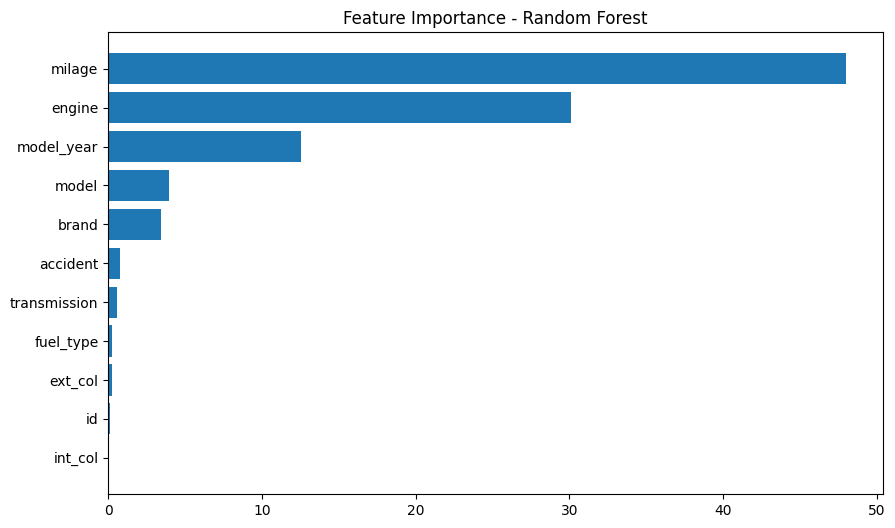

feature  importance
4         milage   48.014749
6         engine   30.073060
3     model_year   12.547943
2          model    3.959584
1          brand    3.425508
10      accident    0.775011
7   transmission    0.549648
5      fuel_type    0.270970
8        ext_col    0.221074
0             id    0.090852

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_model' is your trained RandomForestRegressor
importances = best_model.feature_importances_
feature_names = X_train.columns  # Make sure X_train is a DataFrame

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.show()

feat_imp_df.head(10)  # Top 10 features


In [146]:
train["accident"].unique()

array([1, 0])

## Evaluate Model on Test Data

In [232]:
# Load X_test data
test_df = pd.read_csv('/kaggle/input/hackathon-qualification/archive/test.csv')
print("Test Data loaded successfully!")

Test Data loaded successfully!


In [233]:
test_df.head()

id brand                 model  model_year  milage fuel_type  \
0  188533  Land        Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land     Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford    Expedition Limited        2022   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport        2016   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  
0            White   Beige  None reported         Yes  
1           Silver   Black  None reported         Yes  
2            White   Ebony  None reported         NaN  
3  Silician Yellow   Black  None reported         NaN  
4             Gray   Black  None reported         Yes

In [234]:
# Save Clean Test Dataframe
test_clean= clean_dataframe(test_df)
# test_clean= filling_missing_values_in_categorical_columns(test_clean)
# test_clean.isnull().sum()

/tmp/ipykernel_10/2699740505.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [235]:
file_path= "/kaggle/working/test_clean.csv"
test_clean.to_csv(file_path, index= False)
print(f"Clean Test dataframe successfully saved to: {file_path}")

Clean Test dataframe successfully saved to: /kaggle/working/test_clean.csv


In [134]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [135]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     125690 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      125690 non-null  object
dtypes: int64(3), object(8)
memory usage: 10.5+ MB


In [236]:
X_test= label_encode(test_clean)

Successfully endcoded: brand
Successfully endcoded: model
Successfully endcoded: fuel_type
Successfully endcoded: engine
Successfully endcoded: transmission
Successfully endcoded: ext_col
Successfully endcoded: int_col
Successfully endcoded: accident


In [237]:
X_test.shape

(125690, 11)

In [238]:
y_test_pred = final_model.predict(X_test)
y_test_pred[0:5]

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([17410.66880821, 79836.56232378, 65205.50925823, 23766.55789072,
       31474.45163666])

In [239]:
submission4=pd.DataFrame({"id":X_test['id'],"Price":y_test_pred})
file_path = "/kaggle/working/submission4.csv"
submission4.to_csv(file_path,index=False)